<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_06_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mathematical optimization

#Examples of minimization problems

* statistics (parameter estimation to minimize some loss function);
* regression (find parameters of the line to minimize sum of errors);
* neural networks (find weights to minimize loss function);

* industry management (how to spend money and resources to maximize profit);
* insurance (find insurance coefficients to minimize risk of the loss);
* gambling (minimize losses of casino);
* physics (find trajectory to minimize action).

In [ ]:
#@title #Optimization problems

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<b>General global optimization</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Continuous functions.
  <li> <b>Oracle:</b> 0-1-2 order black box.
  <li> <b>Desired properties:</b> Convergence to a global minimum.
  <li> <b>Features:</b> Prom theoretical point of view, this game is too short. We always lose it. Interesting in context of NNs.
</ul>
`,
`
<b>Nonlinear optimization</b>
<ul>
  <li> <b>Goals:</b> Find a local minimum.
  <li> <b>Functional class:</b> Differentiable functions.
  <li> <b>Oracle:</b> 1-2 order black box.
  <li> <b>Desired properties:</b> Convergence to a local minimum. Fast convergence.
  <li> <b>Features:</b> Variability of approaches.Widespread software. The goal is not always acceptable and reachable.
</ul>
`,
`
<b>Convex optimization</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Convex sets and functions.
  <li> <b>Oracle:</b> 1-order black box.
  <li> <b>Desired properties:</b> Convergence to a global minimum.
  <li> <b>Features:</b> Very rich and interesting theory. Comprehensive complexity theory. Efficient practical methods. The problem class is sometimes restrictive.
</ul>
`,
`
<b>Interior-point polynomial-time methods</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Convex sets and functions with explicit structure.
  <li> <b>Oracle:</b> 2nd-order non-local oracle.
  <li> <b>Desired properties:</b> Fast convergence to a global minimum.
  <li> <b>Features:</b> Very new and perspective theory. Avoids the black box concept. Rate of convergence depends on the structure of the problem.The problem class is practically the same as in convex optimization.
</ul>
`
  ]
)
</script>

#Calculus preliminaries

Suppose

$$
f: X \rightarrow \mathbb{R},
$$

where $X \subset \mathbb{R}^n$.

Taylor expansion

$$
f(\boldsymbol {x}+ \boldsymbol {h})=f(\boldsymbol {x})+\nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}+o(||{\boldsymbol {h}||}^3).
$$

$\nabla f(\boldsymbol {x})$ is the gradient of the function

$$
\nabla_i f(\boldsymbol {x})=\frac{\partial f}{\partial x_i}.
$$

The gradient of $f$ at a point is a vector pointing in the direction of the steepest slope or grade at that point. The steepness of the slope at that point is given by the magnitude of the gradient vector.
$\boldsymbol {H}_{ij}$ is the Hessian (Матриця Гессе) - a square matrix of second-order partial derivatives

$$
\boldsymbol {H}_{ij} f(\boldsymbol {x})=\frac{\partial^2 f}{\partial x_i \partial x_j}.
$$

$\boldsymbol {H}_{ij}$ is symmetric.

In real application it may be too difficult to calculate Hessian analytically and it's calculated using approximation

$$
\boldsymbol {H}(\boldsymbol {x})\boldsymbol {h}\approx \frac{1}{r}\left(\nabla f(\boldsymbol {x}+r\boldsymbol {h})-\nabla f(\boldsymbol {x})\right).
$$

If function has extremum at point $\boldsymbol {x}_0$

$$
\nabla f(\boldsymbol {x}_0)=0.
$$

Convex functions

$$
\forall  \boldsymbol {x}_1,\boldsymbol {x}_2 \in X, \quad \forall t\in [0,1] :\quad f\underbrace{\left(t\boldsymbol {x}_1+(1-t)\boldsymbol {x}_2\right)}_{x}\leq \underbrace{tf(\boldsymbol {x}_1)+(1-t)f(\boldsymbol {x}_2)}_{l(x)} .
$$


In [ ]:
#@title ##Concave/convex functions (опукла/увігнута)

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/concave_convex_neither_function.svg' width=800>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/concave_function.svg' width=800>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/convex_function.svg' width=800>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/neither_function.svg' width=800>
  </img>
 `
  ]
)
</script>

Any local minimum of a convex function is also a global minimum. A strictly convex function will have at most one global minimum.

Convex (Опукла множина) set or a convex region is a subset of a Euclidean space, or more generally an affine space over the reals, that intersects every line into a line segment (possibly empty).



In [ ]:
#@title Convex/nonconvex sets
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/convex_nonconvex_sets.svg'>
</img>

Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing convex functions over convex sets. **Convex problems are the ones we know how to solve efficiently.**

In real application we have to deal with nonconvex functions as well. In the last decades methods were developed (SGD) that work well with non-convex problems as well.

In [ ]:
#@title Epigraph and hypograph
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/epigraph_and_hypograph.svg'>
</img>

**Small properties list of convex sets:**
* Level set $Q = \{\mathbf{x} \in \mathbb{R}^n | f(\mathbf{x}) \leq 0\}$ of a convex function $f(\mathbf{x})$ is convex ($0 \geq f(\mathbf{x}), 0 \geq f(\mathbf{y}) \Rightarrow 0 \geq \theta f(\mathbf{x}) + (1 - \theta) f(\mathbf{y}) \geq f(\theta \mathbf{x} + (1 - \theta)\mathbf{y}) \Rightarrow \theta \mathbf{x} + (1 - \theta)\mathbf{y} \in Q$ )
* For $Q_1$ and $Q_2$ being convex, $Q_1 \cap Q_2$ is convex as well.
* For $Q_1$ and $Q_2$ being convex, $Q_1 + Q_2 = \{\mathbf{x} + \mathbf{y} | \mathbf{x} \in Q_1, \mathbf{y} \in Q_2\}$ is convex as well.
* For $Q_1$ and $Q_2$ being convex, $Q_1 \times Q_2$ is convex as well.
* For $Q$ being convex, its *conic hull* $K(Q) = \{\beta \mathbf{x} | \mathbf{x} \in Q, \beta \geq 0\}$ is convex.
* For $Q_1$ and $Q_2$ being convex, their *convex hull* $Conv(Q_1;Q_2) = \{\alpha \mathbf{x} + (1 - \alpha) \mathbf{y} | \mathbf{x} \in Q_1, \mathbf{y} \in Q_2, 1 \geq \alpha \geq 0\}$ is (unexpectedly) convex.
* For $Q$ being convex, its affine transformation and inverse affine transformation are convex.

#Standard form of convex optimization problem

* In general, optimization problems are unsolvable.
* It is often the case to choose between a precise model that cannot be certainly solved in a reasonable amount of time and rough model that can be.
* We know certain classes of models that are sovable (e.g. linear models, convex models).
* Convex problems are the ones we know how to solve efficiently.

Optimization of the function may be subjected to additional constraints or not.
Optimization could be:
*   Constrained
*   Unconstrained

Standard form of convex optimization problem with constraint reads as

$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned}
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& h_j(\boldsymbol{x}) = 0 \qquad j=1\cdots p \\
\end{aligned}
\end{aligned}
$$

Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing **convex functions over convex sets**.

where $\boldsymbol{x} \in \mathbb{R}^n$ is the optimization variable, the functions $f,f_1, \cdots,f_m$ are **convex** and the functions $h_1, \cdots, h_p$ are **affine**.
In this notation, the function $f$ is the objective function of the problem, and the functions $g_{i}$ and $h_{i}$ are referred to as the constraint functions.

The function f is called, variously, an **objective function**, a **loss function** or **cost (regret) function** (in economy) or an **energy function** or **energy functional** (in physics).
If we want to find maximum of a function it's usually cold a **utility function** or **fitness function**.

The set of points satisfying the constraints is called the **feasible set** (допустима множина).
If $\boldsymbol{x}$ is feasible and $f_i(\boldsymbol{x})=0$ then we say the inequality constraint $f_i(\boldsymbol{x})\leq 0$ is **active** at $\boldsymbol{x}$.
The **optimal value** $p^*$ of the problem is defined as

$$
p^*=\inf \, \{f(\boldsymbol{x})\,|\,\boldsymbol{x} \text{ satisfies all constraints}\}
$$

$x^*$ is an **optimal point** if $\boldsymbol{x}^*$ is feasible and $f(\boldsymbol{x}^*)=p^*$.



Sometimes the problem is written as
$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned}
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& A\boldsymbol{x} = \mathbf{b} \\
\end{aligned}
\end{aligned}
$$
to underline that **equality constraints are affine**.

**Why are equality constraints affine?**


For problem to be convex we shoud have two properties:
* objective function should be convex
* feasible set should be convex

Now feasible set is the problem.
Everything is ok with inequality constraints, because their level sets are convex (see proof earlier).
Their intersection is convex as well.
But equality constraints (even if all $h_i$ are convex) may not define a convex set (note that circle without its interior is not convex).
For an equality constraint $h(\mathbf{x}) = 0$ to define a convex set it should be $h(\mathbf{x}) = 0 \wedge h(\mathbf{y}) = 0 \rightarrow h(\theta\mathbf{x} + (1 - \theta)\mathbf{y}) = 0$, thus $h(\theta\mathbf{x} + (1 - \theta)\mathbf{y}) = \theta h(\mathbf{x}) + (1 - \theta)h(\mathbf{y})$ that is an alternative definition of affine mapping.
Thus $h$ is affine on its own feasibility set.
Now it can be affine everywhere that justifies the problem statement, or be replaced with inequality constraint involving convex function.

Now the answer is:
* We want feasible set to be convex.
* We want every constraint to define a convex set so that their intersection (feasible set) will be convex.
* Equality constrains define a convex set only if they are affine on this set.
* Convex $h$ may not lead to convex set ($x^2 + y^2 = 1$ -- circle without interior, not convex).

**Why do we love convex problems?**

Classic ML problems (linear regression, SVM, etc) can be often described as **convex problems**.
The following are useful properties of convex optimization problems:
* every local minimum is a global minimum;
* the feasible set is convex;
* if the objective function is strictly convex, then the problem has at most one optimal point.


A hierarchy of convex optimization problems. (LP: linear program, QP: quadratic program, SOCP second-order cone program, SDP: semidefinite program, CP: cone program, GFP: graph form program.)

In [ ]:
#@title #A hierarchy of convex optimization problems

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/all_optimization_problems.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/linear_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/quadratic_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/second_order_cone_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/semidefinite_programming.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/cone_programming.svg'>
  </img>
`
  ]
)
</script>

**Note A:** inclusion QP$\subset$SOCP is non-trivial and may seem counter-intuitive, see [this lecture on YouTube](https://www.youtube.com/watch?v=sVbcJx4g-LQ) for more details.

**Note B:** [Wikipedia](https://en.wikipedia.org/wiki/Semidefinite_programming) uses equivalent formulation of SDP through matrix of scalar products
$$
\begin{aligned}
& \text{minimize}_{\mathbf{x}^1, \ldots, \mathbf{x}^n \in \mathbb{R}^n} \, \displaystyle \sum_{i,j \in [n]} c_{i,j} (\mathbf{x}^i \cdot \mathbf{x}^j) \\
& \text{subject to } \qquad
\begin{aligned}
& {\displaystyle \sum_{i,j \in [n]} a_{i,j,k} (\mathbf{x}^i \cdot \mathbf{x}^j) \leq b_k} \text{  for all }k \\
\end{aligned}
\end{aligned}
$$

**Example 1:** unconstrained problem
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
\end{aligned}
$$
obviously $x^* = 0$ and $p^* = 1$.

**Example 2:** inactive constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& x^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
obviously $x^* = 0$ and $p^* = 1$.

**Example 3:** active constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
obviously $x^* = 1$ and $p^* = 2$.


#KKT Conditions

Many problems can be classified as **convex**. They have nice properties that allow us efficiently solve them.


Consider a minimization problem wih one constraint
$$
\begin{aligned}
 \text{minimize}_\boldsymbol{x} \, & f(\boldsymbol{x}) \\
\text{subject to }
& f_1(\boldsymbol{x}) \leq 0\\
\end{aligned}
$$
and think about it as a particle seeking for the minimum of the potential field $f$, while being enclosed in a shell $f_1(\boldsymbol{x}) = 0$. See demo below for intuition.

In [ ]:
#@title Constraints from physics
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_constraints_from_physics.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

You can see that particle stops moving when $\nabla f$ and $\nabla f_1$ are coliner and have opposite directions (active constraint) of $\nabla f = 0$ (inactive constraint, particle finds global minimum). This means that at the desired minimum $\boldsymbol{x}$ gradients are proportional $\nabla f \propto \nabla f_1$ and there exists such positive scaling factor $\lambda \geq 0$ that
$$
\nabla f(\boldsymbol{x}) = - \lambda \nabla f_1(\boldsymbol{x}).
$$
For inactive constraints $\lambda = 0$, thus $\nabla f = 0$. In an obvious way we can generalize this to many constraints and state that there exist such **positive** $\lambda_i$ that
$$
\nabla f(\boldsymbol{x}) + \sum_i{\lambda_i \nabla f_i(\boldsymbol{x})} = 0, \quad \lambda_i \geq 0.
$$
You can imagine similar situation for equality constraints $h_i(\boldsymbol{x}) = 0$, but in this case there is no such thing as "inactive" constraint -- particle never leaves $h_i(\boldsymbol{x}) = 0$, thus proportionality coefficient can be negative
$$
\nabla f(\boldsymbol{x}) + \sum_i{\lambda_i \nabla f_i(\boldsymbol{x})} + \sum_i{\mu_i \nabla h_i(\boldsymbol{x})} = 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$$
In case of non-differentiable functions gradient can be generalized to [sub-gradient](https://en.wikipedia.org/wiki/Subderivative)(subderivative), i.e.


In [ ]:
#@title ##Support lines
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/subderivatives.svg'>
</img>

$$
\partial f(\boldsymbol{x}) + \sum_i{\lambda_i \partial f_i(\boldsymbol{x})} + \sum_i{\mu_i \partial h_i(\boldsymbol{x})} \ni 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$$
The last equality together with demand for the point $x$ to be feasible constitute **Karush–Kuhn–Tucker conditions**
* **Stationarity (стаціонарності):** $
\partial f(\boldsymbol{x}) + \sum_i{\lambda_i \partial f_i(\boldsymbol{x})} + \sum_i{\mu_i \partial h_i(\boldsymbol{x})} \ni 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$
* **Primal feasibility:** $f_i(\boldsymbol{x}) \leq 0$ and $h_i(\boldsymbol{x}) = 0$
* **Dual feasibility (невід'ємності):** $\lambda_i \geq 0$
* **Complementary slackness (доповнюючої нежорсткості):** $\lambda_i f_i(\boldsymbol{x}) = 0$

Under appropriate **constraint qualifications (умови регулярності)** the KKT conditions are **necessary** for point $\boldsymbol{x}$ to be optimum, but they are **not sufficient**.

If we want to be sure that solving for KKT is meaningful, i.e. optimal point exists and satisfies KKT, additional statements should be implied.
The last peace of the jigsaw are **Regularity conditions (or constraint qualifications)**.
Despite their complicated name, they only mean that the problem is not too ill-formed, i.e. we don't demand $x < 3$ and $x > 5$ at the same time or something like that.


There are many types of regularity conditions and they may apply together with KKT not only to convex problems.
But at the moment we are interested in convex problems only.
A well-known **Slater's condition** for convex problems reads:
* we presume that the set of all such $\boldsymbol{x}$ that all $f_i(\boldsymbol{x}) < 0$ (strict inequality!) has non-empty interior, i.e. our particle has some space to move around

**If constraint qualifications hold, we can be sure that the solution exists and satisfies KKT.**


**Note for utterly confused**
* if $\boldsymbol{x}$ is the solution we search for **and** strong duality holds (see next section) $\Rightarrow$ KKT holds at $\boldsymbol{x}$
* Constraint qualification hold $\Rightarrow$ KKT is necessary **and** sufficient for $\boldsymbol{x}$ to be the solution.

In [ ]:
#@title ##Examples

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<b>Example 1:</b> unconstrained problem
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
\\end{aligned}
$$
Basically KKT reduces to plain old
$$
\\nabla f(x) = 0 \\Rightarrow \\nabla (x^2 + 1) = 0
\\Rightarrow 2x = 0 \\Rightarrow x^* = 0.
$$
obviously \\(p^* = 1\\).
`,
`
<b>Example 2:</b> inactive constraint
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& x^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
KKT reads
$$
\\left\\{
\\begin{aligned}
&\\nabla(x^2 + 1) + \\lambda \\nabla(x^2 - 1) = 0\\\\
&x^2 - 1 \\leq 0\\\\
&\\lambda \\geq 0\\\\
&\\lambda (x^2 - 1) = 0
\\end{aligned}
\\right.
$$
Stationarity yields \\(2x + 2\\lambda x = 0\\), thus \\(\\lambda = -1\\) or \\(x = 0\\).
\\(\\lambda = -1\\) not allowed by dual feasibility constraint thus \\(x = 0\\) and (y complementary slackness) \\(\\lambda = 0\\).
Now we may claim \\(x^* = 0\\) and \\(p^* = 1\\).
`,
`
<b>Example 3:</b> active constraint
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
KKT reads
$$
\\left\\{
\\begin{aligned}
&\\nabla(x^2 + 1) + \\lambda \\nabla((x - 2)^2 - 1) = 0\\\\
&(x - 2)^2 - 1 \\leq 0\\\\
&\\lambda \\geq 0\\\\
&\\lambda ((x - 2)^2 - 1) = 0
\\end{aligned}
\\right.
$$
By stationarity \\(2 x + 2 \\lambda (x - 2) = 0\\) and by complementary slackness either \\(\\lambda = 0\\) or \\((x-2)^2 = 1\\).
Thus \\(x \\in \\{0;1;3\\}\\), but \\(x = 0\\) does not pass primal feasibility constraint and
for \\(x = 3\\) (by stationarity) \\(\\lambda = -3\\) and dual feasibility fails.
Case \\(x = 1\\) and \\(\\lambda = 1\\) passes all tests, thus \\(x^* = 1\\) and \\(p^* = 2\\).
`,
`
<b>Example 4A:</b> contraint qualifications matter.
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 \\leq 0
\\end{aligned}
\\end{aligned}
$$
By complementary slackness \\(\\lambda(x - 2)^2 = 0\\) thus \\(\\lambda = 0\\) or \\(x = 2\\).
By stationarity
$$
\\nabla (x^2 + 1) + \\lambda \\nabla (x - 2)^2 = 0
$$
$$
x + \\lambda (x - 2) = 0
$$
and \\(x = 2\\) fails, while \\(\\lambda = 0\\) leads to \\(x = 0\\) and primal feasibility fails.
<br>
Obviously \\(x^* = 2\\) and \\(p^* = 5\\), but stationarity reads at this point
$$
2 + \\lambda 0 = 0
$$
$$
2 = 0 \\leftarrow \\text{broken}
$$
<br>
Thus in this case of broken constraint qualifications
<ul>
  <li>We can't find minimum with KKT</li>
  <li>Minimum exists and fails KKT</li>
</ul>
`,
`
<b>Example 4B:</b> contraint qualifications matter.
<br>
We perturb the previous example by a small quantity \\(\\varepsilon > 0\\) (give a very small room for particle)
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 - \\varepsilon^2 \\leq 0
\\end{aligned}
\\end{aligned}
$$
By complementary slackness \\(\\lambda ((x - 2)^2 - \\varepsilon^2) = 0\\) thus either \\(\\lambda = 0\\) or \\(x = 2 \\pm \\varepsilon\\).
By stationarity
$$
\\nabla (x^2 + 1) + \\lambda \\nabla ((x - 2)^2 - \\varepsilon^2) = 0
$$
$$
x + \\lambda (x - 2) = 0
$$
\\(\\lambda = 0\\) leads to \\(x = 0\\) and primal feasibility fails.
For \\(x = 2 \\pm \\varepsilon\\) we have \\(\\lambda = \\mp 2/\\varepsilon - 1\\).
Dual feasibility holds for \\(x = 2 - \\varepsilon\\) and \\(\\lambda = 2/\\varepsilon - 1\\) and this is the solution (as expected).
`,
`
<b>Example 5:</b> convexity matters.
$$
\\begin{aligned}
& \\text{minimize}_{x,y} \\, x^2 + \\frac{1}{2} y^2 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& 1 - x^2 - y^2 \\leq 0 \\quad \\text{concave!}
\\end{aligned}
\\end{aligned}
$$
KKT yields
$$
\\left\\{
\\begin{aligned}
&\\nabla \\left(x^2 + \\frac{1}{2} y^2\\right) + \\lambda \\nabla(1 - x^2 - y^2) = 0\\\\
&1 - x^2 - y^2 \\leq 0\\\\
&\\lambda \\geq 0\\\\
&\\lambda (1 - x^2 - y^2) = 0
\\end{aligned}
\\right.
$$
Writing stationarity condition as
$$
\\left\\{
\\begin{aligned}
x (1 - \\lambda) & = 0\\\\
y (1 - 2\\lambda) & = 0\\\\
\\end{aligned}
\\right.
$$
we can show that KKT have two solutions:
$$
\\begin{aligned}
x = 1; \\quad y &= 0\\quad \\lambda = 1;\\\\
&\\text{or}\\\\
x = 0; \\quad y &= 1\\quad \\lambda = 1/2;\\\\
\\end{aligned}
$$
<b>BUT</b> the true minima are \\(x = 0\\) and \\(y = \\pm 1\\)
`
  ]
)
</script>

#Lagrangian dual problem

Write stationarity another way
$$
\nabla
  \underbrace{
    \left(
      f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})}
    \right)
  }_{L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})} = 0
$$
Function
$$
L(\boldsymbol{x},\boldsymbol{\lambda}) = f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})}
$$
is called **Lagrangian** and $\lambda_i, \mu_i$ are called **Lagrange multipliers** or **dual variables**.



Supremum over Lagrangian gives back encoding of objective and constraints

$$
\sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0}L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})=\sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0} \left(f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})} \right)=
\left\{
 \begin{align}
   &f(\boldsymbol{x}), \text{when $f_i(\boldsymbol{x}) \leq 0$} \text{ for all } i \\
   &\infty, \text{otherwise}
 \end{align}
\right.
$$

Original optimization problem in **primal form**

$$
p^*=\inf_\boldsymbol{x} \sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0} L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})
$$

Get the **Lagrangian dual problem** be "swapping the inf and the sup"

$$
d^*=\sup_{\boldsymbol{\mu},\boldsymbol{\boldsymbol{\lambda}} \geq 0} \inf_\boldsymbol{x}  L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})
$$

It turns out (**weak duality**) that for any optimization problem
$$
p^* \geq d^*
$$
The difference $p^*-d^*$ is called **duality gap**.
If it happens that
$$
p^* = d^*,
$$
it is called **strong duality**.
For a convex optimization problems we usually have strong duality but not always.
The additional conditions needed are called **constraint qualifications**.
Examples of sufficient conditions:
* Slater's conditions
* all inequality constraints are affine
* and more (some constraints are too compicated to be considered here)

Let's write **Lagrange dual problem** in more traditional form

$$
\begin{aligned}
 \text{maximize}_{\boldsymbol{\lambda},\boldsymbol{\mu}} \, & g(\boldsymbol{\lambda},\boldsymbol{\mu})=\inf_\boldsymbol{x} L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu}) \\
\text{subject to }
& \lambda_i \geq 0 \qquad i=1\cdots m \\
\end{aligned}
$$

Why do we love the dual problem?
* It is often easier to solve (simpler constraints).
* It is **always** concave no matter is the primal problem convex or not (think why).
* If $f$ if quadratic convex, duality gap is always zero (provided feasible set is non-empty)
* Any linear optimization problem has zero duality gap
* Even without strong duality we are at least able to give the lower bound for $p^*$

In [ ]:
#@title ##Examples

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<b>Example 1:</b>
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = (x^2 + 1) + \\lambda ((x - 2)^2 - 1)
$$
let's suppose \\(\\lambda\\) is fixed and find minimum.
It is reached at \\(x = 2\\lambda/(1+\\lambda)\\)
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = 5 - \\lambda - \\frac{4}{1+\\lambda}.
$$
Note the function is <b>concave</b> as expected.
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, 5 - \\lambda - \\frac{4}{1+\\lambda} \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Solving this problem as we would do in calculus \\(\\lambda = 1\\) and \\(d^* = 2\\).
<br>
Comparing with result we obtained in previous paragraph we see that \\(p^* = d^*\\) thus <b>strong duality</b>.
`,
`
<b>Example 2:</b> KKT fails but strong duality holds
$$
\\begin{aligned}
& \\text{minimize}_{x,y} \\, x^2 + \\frac{1}{2} y^2 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& 1 - x^2 - y^2 \\leq 0 \\quad \\text{concave!}
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = \\left(x^2 + \\frac{1}{2} y^2\\right) + \\lambda (1 - x^2 - y^2)
$$
let's suppose \\(\\lambda\\) is fixed and find minimum.
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = \\left\\{
\\begin{aligned}
\\lambda, \\quad \\lambda \\leq 1/2\\\\
-\\infty, \\quad \\lambda > 1/2\\\\
\\end{aligned}
\\right.
$$
Note the function is <b>concave</b> as expected (affine functions are both convex and concave).
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, \\left\\{
\\begin{aligned}
\\lambda, \\quad \\lambda \\leq 1/2\\\\
-\\infty, \\quad \\lambda > 1/2\\\\
\\end{aligned}
\\right. \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Solving this problem we get \\(\\lambda = 1/2\\) and \\(d^* = 1/2\\).
<br>
Obviously \\(p^* = d^*\\) thus <b>strong duality</b> holds <b>BUT</b> the KKT approach does not work.
`,
`
<b>Example 3:</b> Slater fails but function is quadratic convex
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^2 + 1 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& (x - 2)^2 \\leq 0
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = (x^2 + 1) + \\lambda (x - 2)^2
$$
let's suppose \\(\\lambda\\) is fixed and find minimum.
It is reached at \\(x = 2\\lambda/(1+\\lambda)\\) and is equal
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = 5 - \\frac{4}{1+\\lambda}
$$
Note the function is <b>concave</b> as expected (affine functions are both convex and concave).
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, 5 - \\frac{4}{1+\\lambda} \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Obviously \\(d^* = 5 = p^*\\).
`,
`
<b>Example 4:</b> Duality gap
$$
\\begin{aligned}
& \\text{minimize}_x \\, x^3 \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& x^2 - 1 \\leq 0
\\end{aligned}
\\end{aligned}
$$
Lagrangian
$$
L(x,\\lambda) = x^3 + \\lambda (x^2 - 1)
$$
let's suppose \\(\\lambda\\) is fixed and find minimum
$$
g(\\lambda) = \\inf_x L(x,\\lambda) = -\\infty
$$
Now the <b>dual problem</b> is
$$
\\begin{aligned}
& \\text{maximize}_\\lambda \\, -\\infty \\\\
& \\text{subject to } \\qquad
\\begin{aligned}
& \\lambda \\geq 0
\\end{aligned}
\\end{aligned}
$$
Obviously \\(d^* = -\\infty\\) while \\(p^* = -1\\) that leads to an enormous duality gap.
`
  ]
)
</script>

#Test functions

The first function all the methods are tested on is the simplest convex function with the minimum - quadratic function:

$$
f(\boldsymbol{x})=\boldsymbol{x}^{\top} \boldsymbol{H} \boldsymbol{x},
$$

where $\boldsymbol{H}$ is a positive definite matrix (all eigenvalues are positive).
If you want to know how your algorithm handles problems plug in  $\boldsymbol{H}$ that is negative-definite (all eigenvalues are negative), indefinite (some eigenvalues are positive some are negative) or semi-definite (some eigenvalues are zero).

Over time mathematicians collected a number of pathological functions ([here](https://en.wikipedia.org/wiki/Test_functions_for_optimization) is a handful of them) to test their minimization algorithms on.



One the famous examples is the **Rosenbrock function** -  non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as **Rosenbrock's valley** or **Rosenbrock's banana function**. The function is defined as

$$
f(x,y)=(a-x)^2+b(y-x^2)^2 \qquad \qquad a=1;\,\, b=100.
$$

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.


# Function pathologies

In [ ]:
#@title ##Function pathologies
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_function_pathologies.html"
        width="1200" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Iterative methods

Most methods for minimization are iterative: you begin with a point and update it in order to get $\text{argmin}$ at the end.

$$
\boldsymbol{x}_{n} \rightsquigarrow \boldsymbol{x}_{n+1}.
$$

On the way you may want to calculate function at some point $f(\cdot)$, its gradient $\nabla f(\cdot)$ or Hessian $H_f(\cdot)$.

In [ ]:
#@title ##Optimization methods
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/optimization_methods.svg'>
</img>

The more information you retrieve from the function the faster the method converges. Unfortunately that demands more memory and computational resources.

##Choose direction -> choose step -> repeat

Almost all methods we will consider follow the common scheme.
At each iteration

*   `choose the direction of the step`
*   `choose the stepsize (along the direction)`
*   `proceed`

Basically all the methods differ by the method the directions and stepsizes are chosen. For example in vanilla Gradien Descent stepsizes are constant, while in other methods first-order or second order derivatives of the function can be used to make a more informative choise.



In [ ]:
#@title ##Direction -> Step -> Repeat

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/choose_direction.svg'>
  </img>
`
,
`
  <img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/choose_step.svg'>
  </img>
`
  ]
)
</script>

#Nelder-Mead method (Simplex method)
*Not to be confused with Dantzig's simplex algorithm for the problem of linear optimization.*

There are many variations of the Nelder-Mead method.
The following algorithm approximates the original approach of Nelder and Mead.

In [28]:
#@title ##Algorithm
%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
<script>
load_slides_from(
[
`
<h2>Setup</h2>
We are trying to minimize the function \\(f(\\mathbf x)\\), where \\(\\mathbf x \\in \\mathbb{R}^n\\).
Our current test points are \\(\\mathbf x_1, \\ldots, \\mathbf x_{n+1}\\) (simplex).
<br><br>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_setup.svg'
style="float:left"></img>
<ul>
<li>Order according to the values at the vertices:
\\(f(\\mathbf x_1) \\leq f(\\mathbf x_2) \\leq \\cdots \\leq f(\\mathbf x_{n+1}).\\)
Check whether method should stop.
See "Termination".</li>
<li>Calculate \\(\\mathbf x_o\\), the centroid of all points except \\(\\mathbf x_{n+1}\\).</li>
</ul>
`,`
<h2>Reflection</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_reflection.svg'
style="float:left; padding:30px"></img>
<ul>
<li>Compute reflected point \\(\\mathbf x_r = \\mathbf x_o + \\alpha (\\mathbf x_o - \\mathbf x_{n+1})\\) with \\(\\alpha > 0\\).
If the reflected point is better than the second worst,
but not better than the best,
i.e. \\(f(\\mathbf x_1) \\leq f(\\mathbf x_r) < f(\\mathbf x_n)\\),
then obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\)
with the reflected point \\(\\mathbf x_r\\), and go to step "Setup".</li>
</ul>
`,`
<h2>Expansion</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_expansion.svg'
style="float:left; padding:30px"></img>
<ul>
<li>If the reflected point is the best point so far, \\(f(\\mathbf x_r) < f(\\mathbf x_1)\\),
then compute the expanded point \\(\\mathbf x_e = \\mathbf x_o + \\gamma (\\mathbf x_r - \\mathbf x_o)\\) with \\(\\gamma > 1\\).</li>
<li>If the expanded point is better than the reflected point, \\(f(\\mathbf x_e) < f(\\mathbf x_r)\\),
then obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\) with the expanded point \\(\\mathbf x_e\\) and go to step "Setup";
else obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\) with the reflected point \\(\\mathbf x_r\\) and go to step "Setup".</li>
</ul>
`,`
<h2>Contraction</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_contraction.svg'
style="float:left; padding:30px"></img>
Here it is certain that \\(f(\\mathbf x_r) \\geq f(\\mathbf x_n)\\).
(Note that \\(\\mathbf x_n\\) is second or "next" to highest.)
<ul>
<li>Compute contracted point \\(\\mathbf x_c = \\mathbf x_o + \\rho(\\mathbf x_{n+1} - \\mathbf x_o)\\) with \\(0 < \\rho \\leq 0.5\\).</li>
<li>If the contracted point is better than the worst point,
i.e. \\(f(\\mathbf x_c) < f(\\mathbf x_{n+1})\\),
then obtain a new simplex by replacing the worst point \\(\\mathbf x_{n+1}\\)
with the contracted point \\(\\mathbf x_c\\) and go to step "Setup";
`,`
<h2>Shrink</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_shrink.svg'
style="float:left; padding:30px"></img>
<ul>
<li>Replace all points except the best (\\(\\mathbf x_1\\)) with
\\(\\mathbf x_i = \\mathbf x_1 + \\sigma(\\mathbf x_i - \\mathbf x_1)\\) and go to step "Setup".</li>
</ul>
`,`
<h2>Termination</h2>
Criteria are needed to break the iterative cycle.
Nelder and Mead used the sample standard deviation of the function values of the current simplex.
If these fall below some tolerance,
then the cycle is stopped and the lowest point in the simplex returned as a proposed optimum.
Note that a very "flat" function may have almost equal function values over a large domain,
so that the solution will be sensitive to the tolerance.
Nash adds the test for shrinkage as another termination criterion.
Note that programs terminate, while iterations may converge.

<h2>Note</h2>
<table>
<tr><th>coefficient</th><th>step</th><th>standart values</th></tr>
<tr><td>\\(\\alpha\\)</td><td>reflection</td><td>\\(\\alpha = 1\\)</td></tr>
<tr><td>\\(\\gamma\\)</td><td>expansion</td><td>\\(\\gamma = 2\\)</td></tr>
<tr><td>\\(\\rho\\)</td><td>contraction</td><td>\\(\\rho = 1/2\\)</td></tr>
<tr><td>\\(\\sigma\\)</td><td>shrink</td><td>\\(\\sigma = 1/2\\)</td></tr>
</table>
`,`
<h2>Full Algorithm</h2>
<img src='https://fbeilstein.github.io/machine_learning/lecture_06_optimization/nelder_mead_full_algorithm.svg'
style="float:left; padding:30px"></img>
`
  ]
)
</script>

In [ ]:
#@title #Exploring Nelder-Mead
%%html

<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_nelder_mead.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Gradient descent (GD) and its modifications

Gradient methods are first order methods that **don't require as much memory** as second order methods. That's why **they are used in neural networks**.

**Standard gradient descent**

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f(\boldsymbol{x}_{n}).
$$

where $\alpha$ is called learning rate. The problem with gradient descent is that it's not adaptive: $\alpha$ is chosen once and for all direction of movement $\nabla f(\boldsymbol{x}_{n})$ doesn't take into account the history.
The problem with $\alpha$ is essentially following

$$
\begin{aligned}
& \alpha \text{ too small} \rightarrow \text{slow convergence}, \\
& \alpha \text{ too big}\,\,\,\,\,\, \rightarrow \text{divergence or slow convergence due to overshoots/oscillations}. \\
\end{aligned}
$$

**Modifications of simple gradient descent**

| Optimizer | Year | Learning rate $\alpha$ | Gradient $\nabla f$
|----|---|---|---
Standard  GD|1847 | ||
Momentum|1964| |               $\checkmark$ |
AdaGrad |2011| $\checkmark$ |               |
RMSprop |2011| $\checkmark$ |               |
Adadelta|2012| $\checkmark$ |               |
Nesterov|2013| |               $\checkmark$ |
Adam    |2014| $\checkmark$ | $\checkmark$|
AdaMax  |2015| $\checkmark$ | $\checkmark$|
Nadam   |2015| $\checkmark$ | $\checkmark$|
AMSGrad |2018| $\checkmark$ | $\checkmark$|

Here is a glossary
$$
\begin{aligned}
\text{AdaGrad} &= \text{adaptive gradient} \\
\text{RMSProp} &= \text{root mean square propagation} \\
\text{Adam} &= \text{adaptive movement} \\
\text{Nadam} &= \text{Nesterov + adam} \\
\text{Adadelta} &= \text{adaptive delta} \\
\end{aligned}
$$

**Momentum**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n}, \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla f(\boldsymbol{x}_{n}).
\end{aligned}
$$

Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the current gradient with $V$ (which stands for velocity), the **exponential moving average** of current and past gradients.

[Here](https://distill.pub/2017/momentum/) is a nice interactive article that explains why momentum method was a major breakthrough.

In [ ]:
#@title #Gradient with momentum
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_gradient_with_momentum.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

**Nesterov**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n}, \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla f(\boldsymbol{x}^*), \\
\boldsymbol{x}^*&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n-1}.
\end{aligned}
$$

The last term in the second equation is a *projected gradient*. This value can be obtained by going ‘one step ahead’ using the previous velocity. This means that for this step $n$, we have to carry out another forward propagation before we can finally execute the backpropagation.

**Adagrad**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
S_n&=S_{n-1}+\left(\nabla f(\boldsymbol{x}_{n})\right)^2.
\end{aligned}
$$

Adaptive gradient works on the learning rate component by dividing the learning rate by the square root of $S$, which is the cumulative sum of current and past squared gradients.

**RMSprop**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla f(\boldsymbol{x}_{n}) \right)^2.
\end{aligned}
$$

**Adadelta**

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\sqrt{D_{n-1}+\epsilon}}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
D_n&=\beta \, D_{n-1}+(1-\beta)(\Delta \boldsymbol{x}_n )^2, \\
\Delta \boldsymbol{x}_n &= \boldsymbol{x}_n- \boldsymbol{x}_{n-1},\\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla f(\boldsymbol{x}_{n}) \right)^2.
\end{aligned}
$$

Adadelta removes the use of the learning rate parameter completely by replacing it with $D$, the exponential moving average of squared deltas.

**Adam**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\cdot\hat{V}_n, \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1}, \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2}, \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}
$$

It acts upon
* the gradient component by using $V$, the exponential moving average of gradients (like in momentum) and
* the learning rate component by dividing the learning rate $\alpha$ by square root of $S$, the exponential moving average of squared gradients (like in RMSprop).

**AdaMax**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{S_n} \hat{V}_n \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1} \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}) \\
S_n &= \max\left({\beta_2 S_{n-1},|\nabla f(\boldsymbol{x}_{n})|}\right)
\end{aligned}

$V$ is the exponential moving average of gradients, and $S$ is the exponential moving average of past $p$-norm of gradients, approximated to the max function as seen below

**Nadam**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\left(\beta_1 \hat{V}_{n-1}+\frac{1-\beta_1}{1-\beta^n_1} \nabla f(\boldsymbol{x}_{n})\right), \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1}, \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2}, \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}

Nadam makes use of Nesterov to update the gradient one step ahead by replacing the previous $\hat{V}$ in the above equation to the current $\hat{V}$.

**AMSGrad**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}}+\epsilon}\cdot V_{n}, \\
\hat{S}_n&= \max(\hat{S}_{n-1}, S_n) \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}
$$

This variant revisits the adaptive learning rate component in Adam and changes it to ensure that the current $S$ is always larger than the previous time step.




In [ ]:
#@title #First order methods and challenging function ("Хто в ліс, хто по дрова...")

import numpy as np
import tensorflow as tf


x_ini = -2.5
y_ini = -2.5
iters = 30
theta = 0.4
func_to_minimize = lambda varx, vary: (varx**2 + vary**2) / 2.0 + tf.sin(4*varx)**2
x_min = -3.0
x_max = 3.0
y_min = -3.0
y_max = 3.0
num_samples = 50

opt_adam = tf.keras.optimizers.Adam(learning_rate=theta)
opt_sgd = tf.keras.optimizers.SGD(learning_rate=theta)
opt_adadelta = tf.keras.optimizers.Adadelta(learning_rate=theta)
opt_adagrad = tf.keras.optimizers.Adagrad(learning_rate=theta)
opt_adamax = tf.keras.optimizers.Adamax(learning_rate=theta)
opt_ftrl = tf.keras.optimizers.Ftrl(learning_rate=theta)
opt_nadam = tf.keras.optimizers.Nadam(learning_rate=theta)
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=theta)

result = {'traces': []}

for opt, color, name in [[opt_adam, 'red', 'Adam'],
                         [opt_sgd, 'green', 'SGD'],
                         [opt_adadelta, 'blue', 'Adadelta'],
                         [opt_adagrad, 'yellow', 'Adagrad'],
                         [opt_adamax, 'orange', 'Adamax'],
                         [opt_ftrl, 'violet', 'FTRL'],
                         [opt_nadam, 'navy', 'Nadam'],
                         [opt_rmsprop, 'maroon', 'RMSprop']]:
  varx = tf.Variable(x_ini)
  vary = tf.Variable(y_ini)
  varz = func_to_minimize(varx, vary)
  trace = [[varx.numpy(), vary.numpy(), varz.numpy()]]

  for step in range(iters):
    with tf.GradientTape() as tape:
      loss = func_to_minimize(varx, vary)
      gradients = tape.gradient(loss, [varx, vary])
      opt.apply_gradients(zip(gradients, [varx, vary]))
      varz = func_to_minimize(varx, vary)
      trace.append([varx.numpy(), vary.numpy(), varz.numpy()])

  trace = np.array(trace)
  result['traces'].append({'name': name,
                           'color': color,
                           'x': trace[:,0].tolist(),
                           'y': trace[:,1].tolist(),
                           'z': trace[:,2].tolist()})
  x_min = min(x_min, np.min(trace[:,0]))
  x_max = max(x_max, np.max(trace[:,0]))
  y_min = min(y_min, np.min(trace[:,1]))
  y_max = max(y_max, np.max(trace[:,1]))


x = np.linspace(x_min, x_max, num_samples)
y = np.linspace(y_min, y_max, num_samples)
X, Y = np.meshgrid(x, y)
Z = func_to_minimize(X, Y)

result['plot'] = {'x': x.tolist(),
                  'y': y.tolist(),
                  'z': Z.numpy().tolist(),
                  'x_min': x_min,
                  'x_max': x_max,
                  'y_min': y_min,
                  'y_max': y_max}


import json
insert = json.dumps(result)

import requests
url = 'https://fbeilstein.github.io/machine_learning/lecture_06_optimization/keras_demo.html'
response = requests.get(url)
html_content = response.text

import re
str_output = re.sub(r'<INSERT HERE>', insert, html_content)

import IPython
from google.colab import output
display(IPython.display.HTML(str_output))

# Stochastic gradient descent (SGD)

We've seen simple gradient descent by now

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f(\boldsymbol{x}_{n}).
$$

But often loss function is a sum
$$f(\boldsymbol{x})=\sum_{i=1}^N{f_i(\boldsymbol{x})}$$

Each summand function $f_i(\boldsymbol{x})$ is typically associated with the $i$-th observation in the data set.

In this case it may be profitable not to use the "full" gradient $\nabla f(\boldsymbol{x})=\sum{\nabla f_i(\boldsymbol{x})}$ but truncated gradient instead $\nabla_{trunc} f(\boldsymbol{x})=\nabla f_i(\boldsymbol{x})$.

Thus in **stochastic gradient descent** we have iteration step

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f_i(\boldsymbol{x}_{n}).
$$

In **batch stochastic gradient descent** instead of full gradient you take the average of $n$ truncated gradients

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \frac{\sum_{j=i}^n \nabla f_j(\boldsymbol{x}_{n})}{n}.
$$.

At each step you take different $i$. You can circle $i$ through $\{1,2,3 \cdots N\}$ or choose $i$ at random or assume other strategy.
The main problem with stochastic gradient descent is that  learning rate is arbitrary and may cause trouble. Thus nodifications to stochastic gradient descent are made that are similar to what we've seen in gradient descent.
Similar logic can be used to come up with second-order algorithms (stochastic Newton–Raphson).

Pros of SGD:
- no need to feed ALL datapoints at once
- fast performance

In [ ]:
#@title ##Dataflow in GD, SGD and batch SGD
%%html

<div id="slide_1" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924" x1="140.3" x2="228.23" y1="99.352" y2="97.679" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <g>
   <text x="15.652633" y="103.81685" fill="#000000" font-family="sans-serif" font-size="10.583px" stroke-width=".265" style="line-height:1.25" xml:space="preserve"><tspan x="15.652633" y="103.81685" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-weight="bold" stroke-width=".265">Gradient descent</tspan></text>
   <path d="m228.1 33.33-2e-5 128.35c-20.784-28.357-27.189-60.237-92.031-62.277 64.78-3.5617 67.876-18.979 92.031-66.078z" fill="url(#linearGradient924)"/>
   <path d="m140.3 99.352c7e-3 -0.34292 0.0781-2.1259 2.5932-3.8917-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47043 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
   <text x="220.37071" y="24.510101" fill="#000000" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
  </g>
 </g>
</svg>

</div>

<div id="slide_2" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924-8-5" x1="140.3" x2="228.23" y1="99.352" y2="97.679" gradientTransform="translate(4.6812e-6 -2.0128e-5)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <text x="220.37071" y="24.510101" fill="#000000" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
  <text x="16.228331" y="97.292061" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.228331" y="97.292061">Stochastic</tspan><tspan x="16.228331" y="110.6046">gradient descent</tspan></text>
  <path d="m228.1 54.723v10.696c-17.95 24.56-27.189 36.029-92.031 33.989 64.78-3.5617 71.089-12.895 92.031-44.685z" fill="url(#linearGradient924-8-5)"/>
  <path d="m140.3 99.352c7e-3 -0.34292 0.0781-2.1259 2.5932-3.8917-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47043 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
 </g>
</svg>

</div>

<div id="slide_3" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924-8-6" x1="140.3" x2="228.1" y1="99.352" y2="108.2" gradientTransform="translate(.092111 2.0728)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <g fill="#000000">
   <text x="220.37071" y="24.510101" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
   <text x="16.228331" y="97.292061" fill-opacity=".8" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.228331" y="97.292061">Batch stochastic</tspan><tspan x="16.228331" y="110.6046">gradient descent</tspan></text>
   <text x="16.279287" y="97.337059" font-family="sans-serif" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.279287" y="97.337059" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-weight="bold" stroke-width=".26458"/></text>
  </g>
  <path d="m228.19 67.492v32.089c-18.517 3.3932-27.189 3.9408-92.031 1.9002 64.78-3.5617 65.23-10.325 92.031-33.989z" fill="url(#linearGradient924-8-6)"/>
  <path d="m140.39 101.42c7e-3 -0.34291 0.0781-2.1259 2.5932-3.8916-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47044 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
 </g>
</svg>


</div>

<div style="position:absolute; top:50px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

##Example:


Let

$$f(\boldsymbol{x})=\underbrace{(1-\, x_1-x_2)^2}_{f_1(\boldsymbol x)}+\underbrace{(4-2\, x_1-x_2)^2}_{f_2(\boldsymbol x)}+\underbrace{(5-4\, x_1-x_2)^2}_{f_3(\boldsymbol x)}.
$$



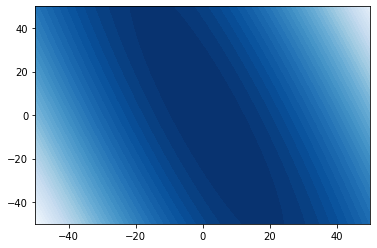

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  return (1-x-y)**2 + (4-2*x-y)**2 + (5-4*x-y)**2

x = np.linspace(-50, 50, num=50)
y = np.linspace(-50, 50, num=50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

cs = plt.contourf(X, Y, -Z, 40, cmap='Blues')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

Then

$$
\begin{aligned}
\nabla f(\boldsymbol{x}) & =
\underbrace{
  \begin{pmatrix}
  & 2 (1-x_1-x_2)(-1) \\
  & 2 (1-x_1-x_2)(-1) \\
  \end{pmatrix}
}_{\nabla f_1(\boldsymbol x)}
+\underbrace{
    \begin{pmatrix}
  & 2 (4-2\, x_1-x_2)(-2) \\
  & 2 (4-2\, x_1-x_2)(-1) \\
  \end{pmatrix}
}_{\nabla f_2(\boldsymbol x)}
+\underbrace{
  \begin{pmatrix}
  & 2 (5-4\, x_1-x_2)(-4) \\
  & 2 (5-4\, x_1-x_2)(-1) \\
  \end{pmatrix}
  }_{\nabla f_3(\boldsymbol x)}=\\
& =
\underbrace{
  \begin{pmatrix}
  & -2+2\, x_1+2\,x_2 \\
  & -2+2\, x_1+2\,x_2 \\
  \end{pmatrix}
}_{\nabla f_1(\boldsymbol x)}
+\underbrace{
    \begin{pmatrix}
  & -16 \,+8\, x_1+4\,x_2 \\
  & -8 \,+4\, x_1+2\,x_2 \\
  \end{pmatrix}
}_{\nabla f_2(\boldsymbol x)}
+\underbrace{
  \begin{pmatrix}
  & -40\,+32\, x_1+8\,x_2 \\
  & -10+8\, x_1+2\,x_2 \\
  \end{pmatrix}
  }_{\nabla f_3(\boldsymbol x)}.
  \end{aligned}
$$
Let $\boldsymbol{x}^0=(1,1)^\top$ and $\alpha=0.01$.
Then

$$
\begin{aligned}
\boldsymbol{x}^1&=\boldsymbol{x}^0-\alpha \cdot \nabla f_1(\boldsymbol{x}^0)=(1,1)^\top-0.01\cdot (2,2)^\top=(0.98,0.98)^\top; \\
\boldsymbol{x}^2&=\boldsymbol{x}^1-\alpha \cdot \nabla f_2(\boldsymbol{x}^1)=\cdots=(1.02,1.00)^\top; \\
\boldsymbol{x}^3&=\boldsymbol{x}^2-\alpha \cdot \nabla f_3(\boldsymbol{x}^2)=\cdots=(1.02,1.00)^\top; \\
\boldsymbol{x}^4&=\boldsymbol{x}^3-\alpha \cdot \nabla f_1(\boldsymbol{x}^3)=\cdots=(0.99,0.98)^\top; \\
&\cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \\
\boldsymbol{x}^{1000}&=\cdots \cdots \cdots \cdots \cdots  = \cdots =(1.\color{red}{1}9,0.\color{red}{6})^\top.
\end{aligned}
$$

The true minimim is at $(1.2143,0.5)$.
SGD needs more iterations then GD.
With the same $\alpha$ and number of iterations GD would give $(1.214\color{red}{2}8, 0.50000\color{red}{3})$ that's much closer to the true answer.
But if you have millions of summands in real world big data SGD becomes computationally viable.

#Coordinate descent

Coordinate descent is based on the idea that the minimization of a multivariable function $f(\boldsymbol{x})$ can be achieved by minimizing it along one direction at a time, i.e., solving univariate (or at least much simpler) optimization problems in a loop. In the simplest case of cyclic coordinate descent, one cyclically iterates through the directions, one at a time, minimizing the objective function with respect to each coordinate direction at a time.

Suppose $\boldsymbol {x}=(x_1, x_2, \cdots, x_n)$.

The algo is following
$$x_i^{k+1}=\text{argmin}_{y\in \mathbb{R}} f(x_1^k, \cdots, y , \cdots, x_n^k).$$
At its step we minimize function of one variable (line search). This could be done with gradient descent, momentum or other methods.

In [ ]:
#@title ##Coordinate descent for function of 2 variables
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="119.8mm" height="108.23mm" version="1.1" viewBox="0 0 210.45 190.71" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker5324" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5314" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5304" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5294" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5284" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5274" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5264" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".45455" fill-rule="evenodd" stroke="#000" stroke-opacity=".45455" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend-0" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".45455" fill-rule="evenodd" stroke="#000" stroke-opacity=".45455" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(.086142 -53.172)">
  <g transform="translate(25.637 1.6124)" fill="#0069ff" fill-rule="evenodd">
   <ellipse transform="matrix(.49642 -.86809 .71054 .70366 0 0)" cx="-36.659" cy="148.03" rx="72.395" ry="35.942" fill-opacity=".07" stroke-width=".82651"/>
   <g fill-opacity=".1">
    <ellipse transform="matrix(.53912 -.84223 .52556 .85076 0 0)" cx="8.0011" cy="171.76" rx="54.813" ry="27.855"/>
    <ellipse transform="matrix(.52651 -.85017 .80321 .59569 0 0)" cx="-58.069" cy="159.43" rx="37.035" ry="17.986"/>
    <ellipse transform="matrix(.53335 -.8459 .82566 .56417 0 0)" cx="-63.428" cy="161.67" rx="24.364" ry="11.979"/>
    <ellipse transform="matrix(.53137 -.84714 .77207 .63554 0 0)" cx="-48.452" cy="164.74" rx="15.202" ry="7.1607"/>
   </g>
  </g>
  <g fill="none">
   <path d="m0.11857 224.67h208.05" fill="#000" fill-opacity=".1" marker-end="url(#Arrow1Mend)" stroke="#000" stroke-opacity=".4" stroke-width=".69929"/>
   <g stroke="#980000" stroke-opacity=".56818">
    <path d="m87.787 214.04-0.22392-34.326" marker-end="url(#marker5264)" stroke-width=".6332"/>
    <path d="m87.691 178.88 16.711-0.2014" marker-end="url(#marker5274)" stroke-width=".71252"/>
    <path d="m105.43 178.68-0.0267-9.358" marker-end="url(#marker5284)" stroke-width=".61193"/>
    <path d="m105.45 168.4 8.4002-0.14947" marker-end="url(#marker5294)" stroke-width=".62828"/>
    <path d="m114.88 168.17-0.15944-6.3153" marker-end="url(#marker5304)" stroke-width=".63071"/>
    <path d="m114.73 160.97 6.5632-0.0388" marker-end="url(#marker5314)" stroke-width=".72603"/>
    <path d="m122.34 160.85-0.16985-5.131" marker-end="url(#marker5324)" stroke-width=".635"/>
   </g>
   <path d="m13.695 243.88v-189.33" fill="#000" fill-opacity=".1" marker-end="url(#Arrow1Mend-0)" stroke="#000" stroke-opacity=".4" stroke-width=".69929"/>
  </g>
  <g transform="matrix(1.4355,0,0,1.4355,29.48,259.68)" ns26:alignment="middle center" ns26:jacobian_sqrt="0.849361" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.4076355951901767" ns26:texconverter="pdflatex" ns26:text="$$x_1 x_1^1 x_1^2 x_1^0 x_1^3 x_2^1 x_2^2 x_2^0 x_2^3$$" ns26:version="1.1.0">
   <g id="id-a93926dd-c2d2-44fb-a8f6-0ced4dd004dc" transform="translate(-260.19,-137.98)">
    <g fill-opacity=".8">
     <g id="id-da855989-bb94-4b4d-a134-91994d10320f" transform="matrix(.88463 0 0 .88463 150.12 -9.3471)">
      <g transform="translate(259.89,146.72)" fill-opacity=".8">
       <path d="m2.4906-2.8885c0.05233-0.20934 0.24859-0.98126 0.82426-0.98126 0.03925 0 0.24859 0 0.41867 0.10467-0.2355 0.05233-0.3925 0.24859-0.3925 0.45792 0 0.13084 0.09158 0.28784 0.314 0.28784 0.18317 0 0.44484-0.14392 0.44484-0.48409 0-0.43176-0.48409-0.54951-0.77193-0.54951-0.48409 0-0.77193 0.44484-0.87659 0.62801-0.20934-0.54951-0.65418-0.62801-0.90276-0.62801-0.86351 0-1.3476 1.0728-1.3476 1.2822 0 0.09158 0.09158 0.09158 0.10467 0.09158 0.06542 0 0.09158-0.02617 0.10467-0.09158 0.28784-0.88968 0.83734-1.099 1.1252-1.099 0.157 0 0.44484 0.0785 0.44484 0.56259 0 0.26167-0.14392 0.81118-0.44484 1.9887-0.13084 0.51026-0.43176 0.86351-0.79809 0.86351-0.05233 0-0.2355 0-0.41867-0.10467 0.20934-0.05233 0.3925-0.22242 0.3925-0.45792 0-0.22242-0.18317-0.28784-0.30092-0.28784-0.26167 0-0.45792 0.20934-0.45792 0.48409 0 0.37942 0.40559 0.54951 0.77193 0.54951 0.56259 0 0.86351-0.58876 0.87659-0.62801 0.10467 0.30092 0.40559 0.62801 0.90276 0.62801 0.86351 0 1.3345-1.0728 1.3345-1.2822 0-0.09158-0.06542-0.09158-0.09158-0.09158-0.0785 0-0.09158 0.03925-0.11775 0.09158-0.27475 0.90276-0.83734 1.099-1.099 1.099-0.32709 0-0.45792-0.26167-0.45792-0.54951 0-0.18317 0.03925-0.36634 0.13084-0.73268z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.88463 0 0 .88463 150.12 -9.3471)">
      <g transform="translate(265.58,148.21)" fill-opacity=".8">
       <path d="m0.72712-4.3221c0-0.157 0-0.157-0.17008-0.157-0.37942 0.36634-0.90276 0.36634-1.1383 0.36634v0.20934c0.13084 0 0.52334 0 0.83734-0.157v2.97c0 0.19625 0 0.27475-0.57567 0.27475h-0.22242v0.20934c0.10467 0 0.82426-0.02617 1.0336-0.02617 0.18317 0 0.91585 0.02617 1.0467 0.02617v-0.20934h-0.22242c-0.58876 0-0.58876-0.0785-0.58876-0.27475z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 115.13 25.354)">
      <g transform="translate(270.05,146.72)" fill-opacity=".8">
       <path d="m30.638 0.78545c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5313 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-5e548f3c-dbe5-4da9-9c01-fdda0794648f" transform="matrix(.64906 0 0 .64906 115.13 25.354)">
      <g transform="translate(275.75,142.61)" fill-opacity=".8">
       <path d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 115.13 25.354)">
      <g transform="translate(275.75,149.18)" fill-opacity=".8">
       <path id="id-a1d749e2-363b-48e6-b792-ad32ab6a126f" d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 116.56 25.595)">
      <g transform="translate(280.22,146.72)" fill-opacity=".8">
       <path d="m30.638 0.78545c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5313 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 116.56 25.595)">
      <g transform="translate(285.91,142.61)" fill-opacity=".8">
       <path d="m30.826 2.5354h-0.23438c-0.01563 0.15625-0.09375 0.5625-0.1875 0.625-0.04687 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2813c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39063 0.375 0.39063 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.04687-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.07813 0.0625-0.07813 0.078125-0.07813 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 116.56 25.595)">
      <g transform="translate(285.91,149.18)" fill-opacity=".8">
       <path d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 102.52 39.546)">
      <g transform="translate(290.38,146.72)" fill-opacity=".8">
       <path id="id-62a7020c-84f5-4e65-845f-d619f369a7af" d="m11.434-21.642c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92187-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.04687-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-2e797095-085b-4844-97ce-188f19ec97bb" transform="matrix(.64906 0 0 .64906 102.52 39.546)">
      <g transform="translate(296.07,142.61)" fill-opacity=".8">
       <path d="m11.699-20.845c0-0.76562-0.09375-1.3281-0.40625-1.8125-0.21875-0.3125-0.65625-0.59375-1.2031-0.59375-1.625 0-1.625 1.9062-1.625 2.4062s0 2.3594 1.625 2.3594c1.6094 0 1.6094-1.8594 1.6094-2.3594zm-1.6094 2.1562c-0.32812 0-0.75-0.1875-0.89062-0.75-0.09375-0.40625-0.09375-0.98438-0.09375-1.5s0-1.0469 0.09375-1.4219c0.15625-0.54688 0.59375-0.70312 0.89062-0.70312 0.375 0 0.73438 0.23438 0.85938 0.64062 0.10938 0.375 0.125 0.875 0.125 1.4844 0 0.51562 0 1.0312-0.09375 1.4688-0.14062 0.64062-0.60938 0.78125-0.89062 0.78125z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 102.52 39.546)">
      <g transform="translate(296.07,149.18)" fill-opacity=".8">
       <path d="m10.434-23.064c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-6a3ef2cc-40cf-40db-b71a-d17ad6cb3d0e" transform="matrix(.68825 0 0 .68825 25.542 -16.044)">
      <g transform="translate(310.71,146.72)" fill-opacity=".8">
       <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 25.542 -16.044)">
      <g transform="translate(316.4,142.61)" fill-opacity=".8">
       <path id="id-9aff0c0e-5eab-46fc-8eee-23a62a48ccac" d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 25.542 -16.044)">
      <g transform="translate(316.4,149.18)" fill-opacity=".8">
       <path d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 19.02 -24.463)">
      <g transform="translate(320.87,146.72)" fill-opacity=".8">
       <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-6110a62f-cb15-4ed1-be9a-313357240ffb" transform="matrix(.68825 0 0 .68825 19.02 -24.463)">
      <g transform="translate(326.56,142.61)" fill-opacity=".8">
       <path id="id-11a73f17-91e0-41fb-8da2-37cfaaec699f" d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 19.02 -24.463)">
      <g transform="translate(326.56,149.18)" fill-opacity=".8">
       <path id="id-3b5bf4b5-91f2-4a8a-b939-20827e39ffae" d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-a74c4fd6-1f31-4105-a933-a2075fee92ce" transform="matrix(.68825 0 0 .68825 11.579 6.5774)">
      <g transform="translate(331.03,146.72)" fill-opacity=".8">
       <path d="m2.9684-1.7597c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-23b70c5b-837d-48b4-833e-cf33c40f10bd" transform="matrix(.68825 0 0 .68825 11.579 6.5774)">
      <g transform="translate(336.73,142.61)" fill-opacity=".8">
       <path d="m3.2341-0.9629c0-0.76562-0.09375-1.3281-0.40625-1.8125-0.21875-0.3125-0.65625-0.59375-1.2031-0.59375-1.625 0-1.625 1.9062-1.625 2.4062s0 2.3594 1.625 2.3594c1.6094 0 1.6094-1.8594 1.6094-2.3594zm-1.6094 2.1562c-0.32812 0-0.75-0.1875-0.89062-0.75-0.09375-0.40625-0.09375-0.98438-0.09375-1.5s0-1.0469 0.09375-1.4219c0.15625-0.54688 0.59375-0.70312 0.89062-0.70312 0.375 0 0.73438 0.23438 0.85938 0.64062 0.10938 0.375 0.125 0.875 0.125 1.4844 0 0.51562 0 1.0312-0.09375 1.4688-0.14062 0.64062-0.60938 0.78125-0.89062 0.78125z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-9e4de5f7-4e4f-4f50-adfb-b5bc7a7d563f" transform="matrix(.68825 0 0 .68825 11.579 6.5774)">
      <g transform="translate(336.73,149.18)" fill-opacity=".8">
       <path d="m3.1559-0.009697h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 4.9692 -32.94)">
      <g transform="translate(341.2,146.72)" fill-opacity=".8">
       <path id="id-95fa966b-dc4d-410f-a1ec-c3c1790c21de" d="m3.3689-2.526c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 4.9692 -32.94)">
      <g transform="translate(346.89,142.61)" fill-opacity=".8">
       <path id="id-ab8b3564-d24e-4543-acf1-6ab1ca08508a" d="m1.947-1.8385c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 4.9692 -32.94)">
      <g transform="translate(346.89,149.18)" fill-opacity=".8">
       <path id="id-28879c6c-4de5-4e5a-b5ae-075589834aec" d="m3.5564-0.77601h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 84.058 25.672)">
      <g transform="translate(341.2,146.72)" fill-opacity=".8">
       <path d="m30.638 0.78545c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5313 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 84.058 25.672)">
      <g transform="translate(346.89,142.61)" fill-opacity=".8">
       <path d="m29.216 1.4729c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76563 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14063-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82813-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.01563 0-0.07813 0.015625-0.07813 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 123.75 25.801)">
      <g transform="translate(285.91,149.18)" fill-opacity=".8">
       <path d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.83734 0 0 .83734 -28.91 -123.91)">
      <g transform="translate(320.87,146.72)" fill-opacity=".8">
       <path d="m2.9784-3.1761c0.055289-0.22116 0.26262-1.0367 0.8708-1.0367 0.041467 0 0.26262 0 0.44231 0.11058-0.2488 0.055289-0.41467 0.26262-0.41467 0.48378 0 0.13822 0.096756 0.30409 0.33173 0.30409 0.19351 0 0.46996-0.15205 0.46996-0.51142 0-0.45614-0.51142-0.58054-0.81551-0.58054-0.51142 0-0.81551 0.46996-0.92609 0.66347-0.22116-0.58054-0.69111-0.66347-0.95374-0.66347-0.91227 0-1.4237 1.1334-1.4237 1.3546 0 0.096755 0.096756 0.096755 0.11058 0.096755 0.069111 0 0.096756-0.027644 0.11058-0.096755 0.30409-0.93991 0.88463-1.1611 1.1887-1.1611 0.16587 0 0.46996 0.082933 0.46996 0.59436 0 0.27645-0.15204 0.85698-0.46996 2.101-0.13822 0.53907-0.45614 0.91227-0.84316 0.91227-0.055289 0-0.2488 0-0.44231-0.11058 0.22116-0.055289 0.41467-0.23498 0.41467-0.48378 0-0.23498-0.19351-0.30409-0.31791-0.30409-0.27645 0-0.48378 0.22116-0.48378 0.51142 0 0.40085 0.42849 0.58054 0.81551 0.58054 0.59436 0 0.91227-0.622 0.92609-0.66347 0.11058 0.31791 0.42849 0.66347 0.95374 0.66347 0.91227 0 1.4099-1.1334 1.4099-1.3546 0-0.096755-0.069111-0.096755-0.096756-0.096755-0.082933 0-0.096756 0.041466-0.1244 0.096755-0.29027 0.95374-0.88463 1.1611-1.1611 1.1611-0.34556 0-0.48378-0.27645-0.48378-0.58054 0-0.19351 0.041467-0.38702 0.13822-0.77405z" fill-opacity=".8"/>
      </g>
     </g>
     <g transform="matrix(.83734 0 0 .83734 -28.91 -123.91)">
      <g transform="translate(326.56,149.18)" fill-opacity=".8">
       <path d="m2.4873-1.9121h-0.20733c-0.013822 0.13822-0.082933 0.4976-0.16587 0.55289-0.041467 0.041467-0.51142 0.041467-0.60818 0.041467h-1.1334c0.64965-0.56671 0.8708-0.7464 1.2302-1.0367 0.45614-0.35938 0.88463-0.7464 0.88463-1.3269 0-0.7464-0.64965-1.2025-1.4375-1.2025-0.76023 0-1.2855 0.53907-1.2855 1.1058 0 0.30409 0.26262 0.34556 0.33173 0.34556 0.13822 0 0.31791-0.11058 0.31791-0.33173 0-0.11058-0.041467-0.33173-0.35938-0.33173 0.19351-0.42849 0.60818-0.56671 0.89845-0.56671 0.622 0 0.93991 0.48378 0.93991 0.98138 0 0.53907-0.38702 0.95374-0.58054 1.1749l-1.479 1.479c-0.069111 0.055289-0.069111 0.069111-0.069111 0.23498h2.5433z" fill-opacity=".8"/>
      </g>
     </g>
    </g>
    <path d="m247.2 106.18 3.2855-9.2e-4" fill="none" stroke="#980000" stroke-opacity=".68182" stroke-width=".31186"/>
    <path d="m247.3 81.68 3.2855-9.2e-4" fill="none" stroke="#980000" stroke-opacity=".68182" stroke-width=".31186"/>
   </g>
  </g>
  <g transform="translate(25.637 1.6124)" fill="none" stroke="#850000" stroke-opacity=".2" stroke-width=".51282">
   <path d="m62.149 213v9.175" fill="#980000" fill-opacity=".6"/>
   <path d="m79.79 177.26v45.063" fill="#000" fill-opacity=".1"/>
   <path d="m89.244 166.56v55.603"/>
   <path d="m96.7 159.23v62.834"/>
  </g>
  <circle cx="87.774" cy="214.11" r="1.2778" fill="#980000" fill-opacity=".6" fill-rule="evenodd"/>
  <g fill="none" stroke="#980000" stroke-opacity=".68182" stroke-width=".44768">
   <path d="m87.787 228.51-0.0013-4.7165"/>
   <path d="m105.46 228.63-1e-3 -4.7165"/>
   <path d="m114.89 228.47-1e-3 -4.7165"/>
   <path d="m122.36 228.36-1e-3 -4.7165"/>
   <path d="m11.057 168.42 4.7165-1e-3"/>
   <path d="m11.107 160.98 4.7165-1e-3"/>
  </g>
  <ellipse transform="matrix(-.5597 -.8287 .83526 -.54986 0 0)" cx="-193.89" cy="22.292" rx="1.1947" ry="1.2309" fill="#0069ff" fill-opacity=".56061" fill-rule="evenodd"/>
  <ellipse transform="matrix(.50481 -.86323 .82602 .56364 0 0)" cx="-51.582" cy="181.95" rx="30.095" ry="14.828" fill="#0069ff" fill-opacity=".1" fill-rule="evenodd"/>
 </g>
 <ellipse transform="matrix(.54522 -.83829 .77753 .62884 0 0)" cx="7.1291" cy="158.29" rx="19.411" ry="9.3634" fill="#0069ff" fill-opacity=".1" fill-rule="evenodd" stroke-width=".63819"/>
 <g fill="#980000" fill-opacity=".6" stroke="#980000" stroke-opacity=".2">
  <path d="m87.873 160.86h-72.234" stroke-width=".4662px"/>
  <path d="m87.777 125.71h-71.992" stroke-width=".46542px"/>
  <path d="m105.53 115.23h-89.674" stroke-width=".47304"/>
  <path d="m114.82 107.8h-98.9" stroke-width=".45244"/>
 </g>
</svg>





##Example
As before
$$
\begin{aligned}
f(\boldsymbol{x})&=(1-\, x_1-x_2)^2+(4-2\, x_1-x_2)^2+(5-4\, x_1-x_2)^2=\\
&=42-58\, x+21\, x^2-20\, y+14\, xy+3 \, y^2.
\end{aligned}
$$
and $\boldsymbol{x}^0=(1,1)^\top$.
$$
\begin{aligned}
x_1^1 &=\text{argmin}_{y}f((y,1)^\top)=25-44\, y + 21 y^2=1.05;\\
x_1^2 &=\text{argmin}_{y}f((1.05,y)^\top)=\cdots=0.89; \\
x_2^1 &=\cdots=\cdots=1.08; \\
& \cdots \cdots \cdots \cdots \cdots \cdots \\
x_1^{1000}&=1.21429;\\
x_2^{1000}&=0.5.
\end{aligned}
$$

#Conjugate gradient method

`1. Calculate`
$$
\Delta x_n = -\nabla f(x_n)
$$
`2. Compute` $\beta_n$ `according to one of the formulas below`

* Fletcher-Reeves:
$$
\beta^{FR}_n=\frac{\Delta x_n^\top \Delta x_n}{\Delta x^{\top}_{n-1} \Delta x_{n-1}}
$$
* Polak–Ribière:
$$
\beta^{PR}_n=\frac{\Delta x_n^\top (\Delta x_n-\Delta x_{n-1})}{\Delta x^{\top}_{n-1} \Delta x_{n-1}}
$$
* Hestenes-Stiefel:
$$
\beta^{HS}_n=\frac{\Delta x_n^\top (\Delta x_n-\Delta x_{n-1})}{-s^{\top}_{n-1}(\Delta x_n-\Delta x_{n-1})}
$$
* Dai–Yuan:
$$
\beta^{DY}_n=\frac{\Delta x_n^\top \Delta x_n}{-s^{\top}_{n-1}(\Delta x_n-\Delta x_{n-1})}
$$

`3.Update the conjugate direction` $s_n=\Delta x_n+\beta_n s_{n-1}$.

`4.Perform a line search: optimize` $\alpha_n=\text{argmin}_\alpha f(x_n+\alpha \, s_n)$.

`5. Update the position` $x_{n+1}=x_n+\alpha_n s_n$.

In [ ]:
#@title #Exploring Newton CG


from IPython.display import display
import ipywidgets as widgets


class Memory:
  def __init__(self):
    self.x_ini = 0.0
    self.y_ini = 0.0
    self.iters = 2
    self.theta = 0.5

current_memory = Memory()

button = widgets.Button(description="Recalculate")
iters = widgets.IntSlider(min=2, max=50,
                          value=current_memory.iters,
                          description='Max Iterations:')

fnc = widgets.Text(value='(x/2)**2+(y)**2',
                   #placeholder='function',
                   description='Function:',
                   disabled=False)
theta_widget = widgets.FloatSlider(min=0.0, max=1.0,
                                   value=current_memory.theta,
                                   description='Theta')
def iter_assign(val):
  current_memory.iters = val.new
def theta_assign(val):
  current_memory.theta = val.new
iters.observe(iter_assign, names='value')
theta_widget.observe(theta_assign, names='value')

display(widgets.HBox([button, fnc]))

def on_button_clicked(b):
  function = fnc.value
  from IPython.display import clear_output
  clear_output()
  display(widgets.HBox([button, fnc]))
  print('Doing Science...')

  x_ini = current_memory.x_ini
  y_ini = current_memory.y_ini
  max_iter = current_memory.iters


  from plotly.subplots import make_subplots
  import plotly.graph_objects as go
  import numpy as np
  from scipy.optimize import minimize

  from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
  transformations = (standard_transformations + (implicit_multiplication_application,))
  f = parse_expr(function, transformations=transformations)

  from sympy import diff
  from sympy import lambdify
  g_x = lambdify(['x', 'y'], diff(f, 'x'), "numpy")
  g_y = lambdify(['x', 'y'], diff(f, 'y'), "numpy")
  jacobian = lambda x,y: np.array([g_x(x, y), g_y(x, y)], dtype=float)
  func_to_minimize = lambdify(['x', 'y'], f, "numpy")
  g_xx = lambdify(['x', 'y'], diff(diff(f, 'x'), 'x'), "numpy")
  g_xy = lambdify(['x', 'y'], diff(diff(f, 'x'), 'y'), "numpy")
  g_yy = lambdify(['x', 'y'], diff(diff(f, 'y'), 'y'), "numpy")
  H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]

  history = [np.array([x_ini, y_ini])]
  def remember(x):
     history.append(x)

  from scipy import optimize
  f = lambda x: func_to_minimize(x[0], x[1]) #(x[0]/2)**2 + x[1]**2 #
  j = lambda x: jacobian(x[0], x[1]) #np.array([x[0]/2, 2*x[1]]) #
  h = lambda x: H(x[0], x[1])
  global res
  res = optimize.fmin_ncg(f, np.array([x_ini, y_ini]), fprime=j,
                          fhess=h, callback=remember)
  history.append(res)




  crashed = False

  _h = np.array(history)
  _x = _h.T[0]
  _y = _h.T[1]
  _z = np.array([f(x) for x in history], dtype=float)

  x_min = min(-10.0, np.min(_x))
  x_max = max(10.0, np.max(_x))
  y_min = min(-10.0, np.min(_y))
  y_max = max(10.0, np.max(_y))

  x_ = np.linspace(x_min, x_max, num=50)
  y_ = np.linspace(y_min, y_max, num=50)
  z_ = np.array([[f([x,y]) for x in x_] for y in y_], dtype=float)


  import matplotlib.pyplot as plt
  import base64
  import io
  fig = plt.figure(figsize=(20,20))
  ax = fig.gca()
  ax.axis('off')
  if np.max(z_) - np.min(z_) > 100:
    ax.contourf(x_, y_, np.sign(z_)*np.log(np.abs(z_) + 1.0), alpha=0.3)
  else:
    ax.contourf(x_, y_, z_, alpha=0.3)
  plt.close(fig)
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = u'data:image/  png;base64,' + base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()


  fig = dict(
      layout = dict(
          width=1200, height=600, autosize=False,
          showlegend = False,
          scene = {'domain': { 'x': [0.0, 0.44], 'y': [0, 1] } },
          xaxis1 = {'domain': [0.55, 1], 'range': [x_min, x_max], 'fixedrange': True},
          yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max], 'fixedrange': True},
          title  = 'Minimization',
          margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
          updatemenus = [{'buttons': [{'args': [[k for k in range(len(_h))],
                                                {'frame': {'duration': 500.0, 'redraw': True},
                                                'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                      'label': 'Play',
                                      'method': 'animate'},
                                      {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                        'mode': 'immediate',
                                                        'transition': {'duration': 0}}
                                                ],
                                      'label': 'Pause',
                                      'method': 'animate'
                                      }
                                      ],
                          'direction': 'left',
                          'pad': {'r': 10, 't': 85},
                          'showactive': True,
                          'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
          sliders = [{'yanchor': 'top',
                      'xanchor': 'left',
                      'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': True, 'xanchor': 'right'},
                      'transition': {'duration': 0.0},
                      'pad': {'b': 10, 't': 50},
                      'len': 0.9,
                      'x': 0.1,
                      'y': 0,
                      'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                                'transition': {'duration': 0, 'easing': 'linear'}}
                                          ],
                                'label': k,
                                'method': 'animate'} for k in range(len(_h))
                      ]}],
          images = [{'source' : image_base64,
                    'xref': 'x', 'yref': 'y',
                    'sizing': 'stretch',
                    'sizex': x_max - x_min, 'sizey': y_max - y_min,
                    'layer': 'below', 'opacity':1.0,
                    'x': x_min, 'y': y_max}]
      ),
      data = [
          {'type': 'scatter3d', 'name': 's3', 'x': _x, 'y': _y, 'z': _z,
           'line': {'color': 'red', 'width': 2},
           'marker': {'size': 4, 'colorscale': 'Viridis'}},
          {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
          #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
          {'type': 'scatter', 'name': 's2', 'x': _x, 'y': _y,
          'line': {'color': 'red', 'width': 2}
          },
      ],
      frames=[
          {'name': str(k),
          'data': [
            {'type': 'scatter3d', 'name': 's3', 'x': _x[:k], 'y': _y[:k], 'z': _z[:k], 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
            {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
            #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
            {'type': 'scatter', 'name': 's2', 'x': _x[:k], 'y': _y[:k],
            'line': {'color': 'red', 'width': 2}
            },
          ]} for k in range(len(_h)) ]
  )
  #plot(fig, auto_open=False)
  clear_output()
  if (crashed):
      print("Cannot find inverse matrix, Method compromised")
      print("Current gradient value: ")
      print(h)
      print("Current point: ", history[-1])

  display(widgets.HBox([button, fnc]))
  f = go.Figure(fig)
  f.show()

  def save_pos(pos):
    global current_memory
    current_memory.x_ini = (x_max - x_min) * pos[0] + x_min
    current_memory.y_ini = (y_max - y_min) * (1.0 - pos[1]) + y_min

  main_str = '''
  <canvas id="paint_here"
          onmousedown="mdown_handle(event)"
          onmousemove="mmove_handle(event)"
          onmouseup="mup_handle(event)"></canvas>
  <script>

  var el = document.getElementsByClassName("layer-subplot")[0];
  var rect = el.getBoundingClientRect();

  var canvas = document.getElementById("paint_here");
  canvas.style.cssText = "position:absolute; top:" + rect.top
                      + "px; left: " + rect.left
                      + "px; width:" + rect.width
                      + "px; height:" + rect.height
                      + "px; z-index:1000;";
  canvas.width = rect.width;
  canvas.height = rect.height;
  var ctx = canvas.getContext('2d');
  ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
  //ctx.fillStyle="#00FF00";
  //ctx.fillRect(0, 0, canvas.width, canvas.height); // field
  ''' + 'var x_ini = ' + str((current_memory.x_ini - x_min)/(x_max - x_min)) + ';' + 'var y_ini = ' + str(1.0 - (current_memory.y_ini - y_min)/(y_max - y_min)) + ';' + '''
  var active_pt = [canvas.width * x_ini, canvas.height * y_ini];

  function draw() {
      ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
      //ctx.fillText("drawing", 20, 20);

      ctx.beginPath();
      ctx.arc(active_pt[0], active_pt[1], 10, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = "rgba(210, 0, 0, 0.75)";
      ctx.fill();
  }

  var do_move = false;

  function is_close(pt1, pt2) {
    return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
          +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
          <= 10*10;
  }

  function mdown_handle(evt) {
    x = evt.offsetX;
    y = evt.offsetY;
    do_move = is_close(active_pt, [x, y]);
  }

  function mmove_handle(evt) {
    if (!do_move)
        return;
    active_pt[0] = evt.offsetX;
    active_pt[1] = evt.offsetY;
  }

  function mup_handle(evt) {
    do_move = false;
    remember();
  }

  var w = canvas.width;
  var h = canvas.height;

  async function remember() {
    var x = active_pt[0] / w;
    var y = active_pt[1] / h;
    const result = await google.colab.kernel.invokeFunction('notebook.rememberPos', [[x, y]], {});
  }

  var timer = setInterval(draw, 10);

  </script>
  '''

  import IPython
  from google.colab import output
  display(IPython.display.HTML(main_str))
  output.register_callback('notebook.rememberPos', save_pos)
  print(res)


button.on_click(on_button_clicked)

[0.00000000e+00 8.67361738e-19]


#Optimized gradient descent (ft. Hessian)

In the methods above we adjusted $\alpha$ using first order information from the function (gradient). We could do better if we use second-order information (hessian).
Suppose we substitute function $f$ with quadratic approximation

$$
f(\boldsymbol {x}+ \alpha \boldsymbol {h}) \approx f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h},
$$

where $h$ is a arbitrary direction and $\alpha$ is a variable. Let me denote it by

$$
\bar{f}(\alpha)=f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

In [ ]:
#@title #Geometric interpretation
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_optimized_grad_desc_approx.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

Differentiate it by $\alpha$ and set the derivative to $0$ to get extremum

$$
\frac{d\bar{f}}{d\alpha}=0 \quad \Longrightarrow \quad \alpha_*=-\frac{\nabla f(\boldsymbol {x}) \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

Now in the method of gradient descent we can choose

$$
\boldsymbol {h}=\nabla f(\boldsymbol {x}), \\
\alpha =-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

All in all we have

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}} \cdot \boldsymbol {h}.
$$

where $\boldsymbol {h}=\nabla f(\boldsymbol{x}_{n})$.

In [ ]:
#@title #Exploring gradient+hessian descent
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_optimized_grad_desc.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Newton's method (Newton-Raphson method / метод дотичних)

This is another second order method that makes use of hessian

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

This is a generalization of a $1D$ Newton method to find zeros of the function $f$

$$
x_{n+1}=x_n-\frac{f(x_n)}{f^{'}(x_n)}.
$$

In [ ]:
#@title ##Newton-Raphson method
%%html

<div id="slide_1" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g fill-opacity=".73864">
    <g transform="translate(300.16 146.72)">
     <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
     <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    </g>
    <g transform="translate(156.32 15.951)">
     <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <circle cx="360.35" cy="130.49" r="2.0682" fill="#1077e6" fill-opacity=".6" fill-rule="evenodd"/>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)"></g>
  </g>
 </g>
 <g transform="matrix(1.354 0 0 1.354 -31.27 -26.71)">
  <g transform="matrix(.35335 0 0 .35335 -27.728 30.094)">
   <g transform="translate(261.53,149.97)">
    <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(285.5,149.97)">
    <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
   </g>
   <g transform="translate(296.02,149.97)">
    <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(309.35,149.97)">
    <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
   </g>
   <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
    <g transform="translate(322.11,143.23)">
     <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
   </g>
   <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
    <g transform="translate(328.06,143.23)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
   </g>
   <g transform="translate(331.93,143.23)">
    <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(343.05,143.23)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
   <path transform="matrix(1,0,0,-1,320.51,147.48)" d="m0.0017188 0.0015312h28.008" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".398"/>
   <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
    <g transform="translate(320.51,156.81)">
     <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
   </g>
   <g transform="translate(326.46,151.94)">
    <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
   </g>
   <g transform="translate(329.65,156.81)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
   <g transform="translate(333.53,156.81)">
    <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(344.64,156.81)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
  </g>
  <g transform="matrix(.18767 0 0 .18767 66.627 82.763)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$n+1 n$$" ns0:version="1.1.0">
   <g transform="translate(-291.36,-140.08)">
    <g transform="translate(291.06,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g id="id-156f5c1d-d5a9-4c2e-9c14-3b932545719c">
     <g transform="translate(299.26,146.72)">
      <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(309.22,146.72)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="translate(314.2,146.72)">
     <path d="m43.805-2.2365c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.04687-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.07813-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.04687-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
  <path d="m91.974 81.182c-0.0059 0.02932-0.01759 0.07331-0.01759 0.0821 0 0.03226 0.02639 0.04985 0.05571 0.04985 0.02346 0 0.05572-0.01466 0.07038-0.05278 0-0.0029 0.02346-0.0909 0.03519-0.13782l0.04105-0.16714c0.0088-0.04398 0.02053-0.08504 0.03225-0.12609 0.0059-0.03226 0.02053-0.08797 0.02346-0.09383 0.02639-0.05865 0.12609-0.22872 0.30496-0.22872 0.08504 0 0.0997 0.07038 0.0997 0.13196 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.01759 0.04398-0.02053 0.06744-0.02053 0.08797 0 0.08797 0.06744 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.01466-0.02053-0.02053-0.02053-0.02053 0-0.02053 0.0059-0.02932 0.03519-0.03812 0.12609-0.0997 0.23165-0.1906 0.23165-0.03226 0-0.04398-0.01759-0.04398-0.06158 0-0.04692 0.01466-0.0909 0.03225-0.13196 0.03519-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.07917-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29323 0.16421-0.0088-0.10556-0.08504-0.16421-0.17301-0.16421-0.08504 0-0.12023 0.07331-0.13782 0.10556-0.03226 0.06451-0.05571 0.17594-0.05571 0.1818 0 0.02053 0.01759 0.02053 0.02053 0.02053 0.02053 0 0.02053-0.0029 0.03225-0.04398 0.03226-0.13195 0.07038-0.22286 0.13782-0.22286 0.03519 0 0.05571 0.02346 0.05571 0.08504 0 0.04105-0.0059 0.06158-0.02932 0.15834z"/>
  <path d="m92.497 85.891c-6e-3 0.02932-0.0176 0.07331-0.0176 0.0821 0 0.03226 0.0264 0.04985 0.0557 0.04985 0.0235 0 0.0557-0.01466 0.0704-0.05278 0-0.0029 0.0234-0.0909 0.0352-0.13782l0.0411-0.16714c9e-3 -0.04399 0.0205-0.08504 0.0322-0.12609 6e-3 -0.03226 0.0205-0.08797 0.0235-0.09383 0.0264-0.05865 0.12609-0.22872 0.30496-0.22872 0.085 0 0.0997 0.07037 0.0997 0.13195 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.0176 0.04398-0.0205 0.06744-0.0205 0.08797 0 0.08797 0.0674 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.0147-0.02053-0.0205-0.02053-0.0205 0-0.0205 0.0059-0.0293 0.03519-0.0381 0.12609-0.0997 0.23165-0.19061 0.23165-0.0323 0-0.044-0.01759-0.044-0.06158 0-0.04692 0.0147-0.0909 0.0323-0.13196 0.0352-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.0792-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29324 0.16421-9e-3 -0.10556-0.085-0.16421-0.173-0.16421-0.085 0-0.12023 0.07331-0.13782 0.10556-0.0323 0.06451-0.0557 0.17594-0.0557 0.1818 0 0.02053 0.0176 0.02053 0.0205 0.02053 0.0205 0 0.0205-0.0029 0.0323-0.04399 0.0323-0.13195 0.0704-0.22286 0.13782-0.22286 0.0352 0 0.0557 0.02346 0.0557 0.08504 0 0.04105-6e-3 0.06158-0.0293 0.15834z"/>
 </g>
</svg>

</div>

<div id="slide_2" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker10076" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill="#b10000" fill-opacity=".5" fill-rule="evenodd" stroke="#b10000" stroke-opacity=".5" stroke-width="1pt"/>
  </marker>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g fill-opacity=".73864">
    <g transform="translate(300.16 146.72)">
     <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
     <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
     <path d="m-38.458-97.476-24.773 35.248" fill-opacity=".8" stroke="#000" stroke-opacity=".8" stroke-width=".7023"/>
     <path d="m-38.458-97.476v35.399" fill-opacity=".2" stroke="#000" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".6" stroke-width=".55771"/>
    </g>
    <g transform="translate(156.32 15.951)">
     <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g fill-rule="evenodd">
    <circle cx="360.35" cy="130.49" r="2.0682" fill="#1077e6" fill-opacity=".6"/>
    <circle cx="315.37" cy="130.49" r="2.0682" fill="#1077e6" fill-opacity=".6"/>
    <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053"/>
   </g>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".8"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".8"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".8"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".8"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <circle cx="70.426" cy="24.604" r=".33723" fill-opacity=".8" fill-rule="evenodd"/>
 <g transform="matrix(.47845 0 0 .47845 -68.807 14.03)">
  <g transform="translate(261.53,149.97)">
   <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(285.5,149.97)">
   <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
  </g>
  <g transform="translate(296.02,149.97)">
   <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(309.35,149.97)">
   <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
  </g>
  <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
  </g>
  <g transform="translate(331.93,143.23)">
   <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(343.05,143.23)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
  <path transform="matrix(1,0,0,-1,320.51,147.48)" d="m0.0017188 0.0015312h28.008" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".398"/>
  <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g transform="translate(326.46,151.94)">
   <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
  </g>
  <g transform="translate(329.65,156.81)">
   <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
  </g>
  <g transform="translate(333.53,156.81)">
   <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(344.64,156.81)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <g transform="matrix(.25411 0 0 .25411 58.954 85.346)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$n+1 n$$" ns0:version="1.1.0">
  <g transform="translate(-291.36,-140.08)">
   <g id="id-156f5c1d-d5a9-4c2e-9c14-3b932545719c"></g>
  </g>
 </g>
 <g transform="matrix(.19009 0 0 .19009 59.047 85.206)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$2 1$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-301.14 -140.08)">
   <g id="id-26e60f2e-7ea3-4461-b9f9-3bd1eeed79bc">
    <g transform="matrix(1.2107 0 0 1.2107 301.1 148.26)">
     <path id="id-ce89c267-fcee-4f06-896d-87c468770e9c" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
    <g transform="matrix(1.1475 0 0 1.1475 387.75 147.84)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(1.1475 0 0 1.1475 478.25 130.56)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(1.1475 0 0 1.1475 482.11 164.94)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
   </g>
  </g>
 </g>
 <path d="m83.047 6.5889-48.536 68.967" fill="none" stroke="#000" stroke-opacity=".2" stroke-width=".44635"/>
 <path d="m71.435 8.1277c5.6762-2.5784 8.2969 0.32793 8.9188 0.70007" fill="none" marker-end="url(#marker10076)" stroke="#b10000" stroke-opacity=".66288" stroke-width=".28492"/>
 <text x="59.128693" y="9.1069784" fill="#a60000" fill-opacity=".74621" font-family="sans-serif" font-size="9.01px" stroke-width=".22525" style="line-height:1.25" xml:space="preserve"><tspan x="59.128693" y="9.1069784" fill="#a60000" fill-opacity=".74621" font-family="'Times New Roman'" font-size="3.9044px" stroke-width=".22525">tangent</tspan></text>
</svg>

</div>

<div id="slide_3" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g transform="translate(300.16 146.72)" fill-opacity=".73864">
    <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
    <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    <g fill-opacity=".2" stroke="#000">
     <path d="m-38.458-97.476-24.773 35.248" stroke-opacity=".2" stroke-width=".7023"/>
     <path d="m-63.231-62.227v-16.751" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".6" stroke-width=".55771"/>
     <path d="m-38.458-97.476v35.399" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".2" stroke-width=".55771"/>
    </g>
   </g>
   <g transform="translate(156.32 15.951)" fill-opacity=".73864">
    <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
   </g>
   <g transform="matrix(.55171 0 0 .55171 252.87 132.82)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_{n+1}=x_n-\\frac{f(x_n)}{f^{'}(x_n)}$$" ns0:version="1.1.0"></g>
  </g>
 </g>
 <path d="m54.575 36.378-41.969 10.811" fill-opacity=".2" stroke="#000" stroke-opacity=".8" stroke-width=".44979"/>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".8"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="360.35" cy="130.49" r="2.0682" fill-opacity=".2"/>
    <circle cx="315.37" cy="130.49" r="2.0682" fill-opacity=".6"/>
    <circle cx="196.45" cy="130.82" r="2.0682" fill-opacity=".6"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".8"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".8"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723" fill-opacity=".2"/>
  <circle cx="54.565" cy="36.368" r=".33723" fill-opacity=".8"/>
 </g>
 <g transform="matrix(.47845 0 0 .47845 -68.812 13.981)">
  <g transform="translate(261.53,149.97)">
   <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(285.5,149.97)">
   <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
  </g>
  <g transform="translate(296.02,149.97)">
   <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(309.35,149.97)">
   <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
  </g>
  <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
  </g>
  <g transform="translate(331.93,143.23)">
   <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(343.05,143.23)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <path d="m84.536 84.541h13.4" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".19042"/>
 <g transform="matrix(.47845 0 0 .47845 -68.812 13.981)">
  <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g transform="translate(326.46,151.94)">
   <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
  </g>
  <g transform="translate(329.65,156.81)">
   <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
  </g>
  <g transform="translate(333.53,156.81)">
   <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(344.64,156.81)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <g>
  <path d="m75.799 86.514 0.24452-0.23733c0.35599-0.31644 0.49263-0.4387 0.49263-0.66883 0-0.2625-0.20496-0.44589-0.48544-0.44589-0.2589 0-0.42791 0.21216-0.42791 0.41712 0 0.12586 0.11507 0.12586 0.12226 0.12586 0.03955 0 0.11866-0.02517 0.11866-0.12226 0-0.05753-0.04315-0.11866-0.12226-0.11866-0.01798 0-0.02157 0-0.02877 0.0036 0.05034-0.15103 0.1762-0.23373 0.30924-0.23373 0.20856 0 0.30565 0.18698 0.30565 0.37397 0 0.18339-0.11147 0.36318-0.24092 0.50702l-0.4387 0.48904c-0.02517 0.02517-0.02517 0.03236-0.02517 0.0863h0.85222l0.06113-0.39914h-0.05394c-0.01438 0.06832-0.02877 0.16901-0.05394 0.20496-0.01438 0.01798-0.16541 0.01798-0.21575 0.01798z"/>
  <path d="m93.109 83.223 0.24452-0.23733c0.35599-0.31644 0.49264-0.4387 0.49264-0.66883 0-0.2625-0.20496-0.44589-0.48544-0.44589-0.2589 0-0.42791 0.21216-0.42791 0.41712 0 0.12586 0.11507 0.12586 0.12226 0.12586 0.03955 0 0.11866-0.02517 0.11866-0.12226 0-0.05753-0.04315-0.11866-0.12226-0.11866-0.01798 0-0.02157 0-0.02877 0.0036 0.05034-0.15103 0.1762-0.23373 0.30924-0.23373 0.20856 0 0.30565 0.18698 0.30565 0.37397 0 0.18339-0.11147 0.36318-0.24092 0.50702l-0.4387 0.48904c-0.02517 0.02517-0.02517 0.03236-0.02517 0.0863h0.85222l0.06113-0.39914h-0.05394c-0.01438 0.06832-0.02877 0.16901-0.05394 0.20496-0.01438 0.01798-0.16541 0.01798-0.21575 0.01798z"/>
  <path d="m93.767 89.735 0.24452-0.23733c0.35599-0.31644 0.49263-0.4387 0.49263-0.66883 0-0.2625-0.20496-0.44589-0.48544-0.44589-0.2589 0-0.42791 0.21216-0.42791 0.41712 0 0.12586 0.11507 0.12586 0.12226 0.12586 0.03955 0 0.11866-0.02517 0.11866-0.12226 0-0.05753-0.04315-0.11866-0.12226-0.11866-0.01798 0-0.02157 0-0.02877 0.0036 0.05034-0.15103 0.1762-0.23373 0.30924-0.23373 0.20856 0 0.30565 0.18698 0.30565 0.37397 0 0.18339-0.11147 0.36318-0.24092 0.50702l-0.4387 0.48904c-0.02517 0.02517-0.02517 0.03236-0.02517 0.0863h0.85222l0.06113-0.39914h-0.05394c-0.01438 0.06832-0.02877 0.16901-0.05394 0.20496-0.01438 0.01798-0.16541 0.01798-0.21575 0.01798z"/>
 </g>
 <g transform="matrix(.22585 0 0 .22585 59.149 85.191)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$3$$" ns0:version="1.1.0">
  <defs id="id-f4878715-7c80-405f-b683-199a55bf82de"></defs>
  <g id="id-a473e66b-e140-4ac8-a20c-b0240c151a4e" transform="translate(-303.56 -140.08)">
   <g>
    <g transform="translate(303.13 146.72)">
     <path id="id-be52d05e-2bc3-4fa4-812e-52edfdd86cfa" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<div id="slide_4" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g fill-opacity=".73864">
    <g transform="translate(300.16 146.72)">
     <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
     <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
     <g fill-opacity=".2" stroke="#000">
      <path d="m-38.458-97.476-24.773 35.248" stroke-opacity=".2" stroke-width=".7023"/>
      <g stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771">
       <path d="m-63.231-62.227v-16.751" stroke-opacity=".2"/>
       <path d="m-128.76-62.099v52.372" stroke-opacity=".6"/>
       <path d="m-38.458-97.476v35.399" stroke-opacity=".2"/>
      </g>
     </g>
    </g>
    <g transform="translate(156.32 15.951)">
     <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
    </g>
   </g>
  </g>
 </g>
 <path d="m54.575 36.378-41.969 10.811" fill-opacity=".2" stroke="#000" stroke-opacity=".2" stroke-width=".44979"/>
 <path d="m12.606 80.731 10.98-33.557" fill-opacity=".2" stroke="#000" stroke-opacity=".8" stroke-width=".44979"/>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(310.71 146.72)">
     <path d="m3.9461-2.8096c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(316.4 148.21)">
     <path d="m4.3054-0.93465v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57812 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="360.35" cy="130.49" r="2.0682" fill-opacity=".2"/>
    <circle cx="315.37" cy="130.49" r="2.0682" fill-opacity=".2"/>
    <circle cx="196.45" cy="130.82" r="2.0682" fill-opacity=".6"/>
    <circle cx="227.44" cy="130.82" r="2.0682" fill-opacity=".6"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6b64fad1-dbfe-4e38-a96b-65b6367ce43e" transform="translate(-225.62 170.91)">
     <g transform="translate(293.69 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-6970f070-b189-4256-95cc-e9bac5c81d0e" transform="translate(-225.62 170.91)">
     <g transform="translate(299.64 146.72)">
      <path d="m2.1655 2.5903c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".8"/>
     </g>
    </g>
    <g transform="translate(-225.62 170.91)">
     <g transform="translate(303.52 146.72)">
      <path id="id-09e16ed7-b374-40cb-b26a-fd081230a09a" d="m2.1968-2.816c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0312-0.95313 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-b56b796b-8a8b-4e99-9528-054eb8a2b63b" transform="translate(-225.62 170.91)">
     <g transform="translate(309.21 148.21)">
      <path id="id-0df9a1d8-4a97-43e0-9c44-85b17dcecb5b" d="m0.77492-2.1285c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4063-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76563 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-b6c8eab1-df0a-442d-b88b-8c9c80c7c45d" transform="translate(-225.62 170.91)">
     <g transform="translate(313.68 146.72)">
      <path d="m0.87854-2.3447c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4688-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".8"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723" fill-opacity=".2"/>
  <circle cx="54.565" cy="36.368" r=".33723" fill-opacity=".2"/>
  <circle cx="12.618" cy="80.629" r=".33723" fill-opacity=".8"/>
 </g>
 <g transform="matrix(.47845 0 0 .47845 -68.81 14.022)">
  <g transform="translate(261.53,149.97)">
   <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(285.5,149.97)">
   <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
  </g>
  <g transform="translate(296.02,149.97)">
   <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(309.35,149.97)">
   <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
  </g>
  <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
  </g>
  <g transform="translate(331.93,143.23)">
   <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(343.05,143.23)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <path d="m84.538 84.583h13.4" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".19042"/>
 <g transform="matrix(.47845 0 0 .47845 -68.81 14.022)">
  <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g transform="translate(326.46,151.94)">
   <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
  </g>
  <g transform="translate(329.65,156.81)">
   <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
  </g>
  <g transform="translate(333.53,156.81)">
   <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(344.64,156.81)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <g transform="matrix(.22585 0 0 .22585 59.151 85.232)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$3$$" ns0:version="1.1.0">
  <defs id="id-f4878715-7c80-405f-b683-199a55bf82de"></defs>
  <g id="id-a473e66b-e140-4ac8-a20c-b0240c151a4e" transform="translate(-303.56 -140.08)">
   <g></g>
  </g>
 </g>
 <g>
  <path d="m76.13 85.861c0.1835-0.05999 0.31407-0.21526 0.31407-0.39524 0-0.1835-0.19762-0.31054-0.41288-0.31054-0.22585 0-0.39876 0.1341-0.39876 0.30701 0 0.07411 0.04941 0.11645 0.11645 0.11645 0.06705 0 0.11292-0.0494 0.11292-0.11645 0-0.1094-0.10587-0.1094-0.13763-0.1094 0.06705-0.11292 0.21526-0.14116 0.29643-0.14116 0.09528 0 0.21879 0.04941 0.21879 0.25055 0 0.02823-0.0071 0.1588-0.06352 0.25761-0.06705 0.1094-0.14468 0.11645-0.20115 0.11645-0.01764 0.0035-0.07058 0.0071-0.08822 0.0071-0.01764 0.0035-0.03176 0.0071-0.03176 0.02823 0 0.0247 0.01412 0.0247 0.05293 0.0247h0.09881c0.1835 0 0.2682 0.15174 0.2682 0.37406 0 0.30701-0.15527 0.37053-0.25408 0.37053-0.09881 0-0.2682-0.03882-0.34583-0.16939 0.07764 0.01059 0.14821-0.03882 0.14821-0.12351 0-0.08116-0.05999-0.12704-0.12351-0.12704-0.05646 0-0.12704 0.03176-0.12704 0.13057 0 0.20468 0.2082 0.35289 0.45523 0.35289 0.27525 0 0.47993-0.20468 0.47993-0.43405 0-0.1835-0.14468-0.35995-0.37759-0.40935z"/>
  <path d="m94.136 89.213c0.1835-0.05999 0.31407-0.21526 0.31407-0.39524 0-0.1835-0.19762-0.31054-0.41288-0.31054-0.22585 0-0.39876 0.1341-0.39876 0.30701 0 0.07411 0.0494 0.11645 0.11645 0.11645 0.06705 0 0.11292-0.0494 0.11292-0.11645 0-0.1094-0.10587-0.1094-0.13763-0.1094 0.06705-0.11292 0.21526-0.14116 0.29643-0.14116 0.09528 0 0.21879 0.0494 0.21879 0.25055 0 0.02823-0.0071 0.1588-0.06352 0.25761-0.06705 0.1094-0.14468 0.11645-0.20115 0.11645-0.01764 0.0035-0.07058 0.0071-0.08822 0.0071-0.01765 0.0035-0.03176 0.0071-0.03176 0.02823 0 0.0247 0.01412 0.0247 0.05293 0.0247h0.09881c0.1835 0 0.2682 0.15174 0.2682 0.37406 0 0.30701-0.15527 0.37053-0.25408 0.37053-0.09881 0-0.2682-0.03882-0.34583-0.16939 0.07764 0.01059 0.14821-0.03882 0.14821-0.12351 0-0.08116-0.05999-0.12704-0.12351-0.12704-0.05646 0-0.12704 0.03176-0.12704 0.13057 0 0.20468 0.2082 0.35289 0.45523 0.35289 0.27525 0 0.47993-0.20468 0.47993-0.43405 0-0.1835-0.14468-0.35995-0.37759-0.40935z"/>
  <path d="m93.478 82.651c0.1835-0.05999 0.31407-0.21526 0.31407-0.39524 0-0.1835-0.19762-0.31054-0.41288-0.31054-0.22585 0-0.39876 0.1341-0.39876 0.30701 0 0.07411 0.0494 0.11645 0.11645 0.11645 0.06705 0 0.11292-0.0494 0.11292-0.11645 0-0.1094-0.10587-0.1094-0.13763-0.1094 0.06705-0.11292 0.21526-0.14116 0.29643-0.14116 0.09528 0 0.21879 0.0494 0.21879 0.25055 0 0.02823-0.0071 0.1588-0.06352 0.25761-0.06705 0.1094-0.14468 0.11645-0.20115 0.11645-0.01765 0.0035-0.07058 0.0071-0.08822 0.0071-0.01764 0.0035-0.03176 0.0071-0.03176 0.02823 0 0.0247 0.01412 0.0247 0.05293 0.0247h0.09881c0.1835 0 0.2682 0.15174 0.2682 0.37406 0 0.30701-0.15527 0.37053-0.25408 0.37053-0.09881 0-0.2682-0.03882-0.34583-0.16939 0.07764 0.01059 0.14821-0.03882 0.14821-0.12351 0-0.08116-0.05999-0.12704-0.12351-0.12704-0.05646 0-0.12704 0.03176-0.12704 0.13057 0 0.20468 0.2082 0.35289 0.45523 0.35289 0.27525 0 0.47993-0.20468 0.47993-0.43405 0-0.1835-0.14468-0.35995-0.37759-0.40935z"/>
 </g>
 <g transform="matrix(.22723 0 0 .22723 58.938 85.145)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-303.41 -139.97)">
   <g>
    <g transform="translate(303.13 146.72)">
     <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<div id="slide_5" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g transform="translate(300.16 146.72)" fill-opacity=".73864">
    <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
    <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    <g stroke="#000">
     <g fill-opacity=".2" stroke-opacity=".2">
      <path d="m-38.458-97.476-24.773 35.248" stroke-width=".7023"/>
      <path d="m-63.231-62.227v-16.751" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
      <path d="m-128.76-62.099v52.372" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
     </g>
     <path d="m-111.62-46.307 11.959-15.856" fill-opacity="1" stroke-opacity=".79545" stroke-width=".7023"/>
     <path d="m-38.458-97.476v35.399" fill-opacity=".2" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".2" stroke-width=".55771"/>
    </g>
   </g>
   <g transform="translate(156.32 15.951)" fill-opacity=".73864">
    <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
   </g>
   <g transform="matrix(.55171 0 0 .55171 252.87 132.82)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_{n+1}=x_n-\\frac{f(x_n)}{f^{'}(x_n)}$$" ns0:version="1.1.0">
    <g transform="matrix(1.354 0 0 1.354 -378.12 -181.24)">
     <g transform="translate(261.53,149.97)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(285.5,149.97)">
      <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
     <g transform="translate(296.02,149.97)">
      <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(309.35,149.97)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
     <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
      <g transform="translate(322.11,143.23)">
       <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
      </g>
     </g>
     <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
      <g transform="translate(328.06,143.23)">
       <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
      </g>
     </g>
     <g transform="translate(331.93,143.23)">
      <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(343.05,143.23)">
      <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <path d="m55.87 18.451h37.924" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".53891"/>
    <g transform="matrix(1.354 0 0 1.354 -378.12 -181.24)">
     <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
      <g transform="translate(320.51,156.81)">
       <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
      </g>
     </g>
     <g transform="translate(326.46,151.94)">
      <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
     </g>
     <g transform="translate(329.65,156.81)">
      <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
     <g transform="translate(333.53,156.81)">
      <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(344.64,156.81)">
      <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 -16.58 20.043)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g></g>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 29.711 20.042)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g>
       <g transform="translate(303.13 146.72)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 80.811 29.45)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g>
       <g transform="translate(303.13 146.72)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 78.628 11.011)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g>
       <g transform="translate(303.13 146.72)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g stroke="#000">
  <path d="m54.575 36.378-41.969 10.811" fill-opacity=".2" stroke-opacity=".2" stroke-width=".44979"/>
  <path d="m23.587 57.303v-10.129" fill-opacity=".5" stroke-dasharray="2.14313, 0.35718800000000001" stroke-opacity=".6" stroke-width=".35719"/>
  <path d="m12.606 80.731 10.98-33.557" fill-opacity=".2" stroke-opacity=".2" stroke-width=".44979"/>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(310.71 146.72)">
     <path d="m3.9461-2.8096c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(316.4 148.21)">
     <path d="m4.3054-0.93465v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57812 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z"/>
    </g>
   </g>
   <g id="id-00c2fd87-c6b1-44cb-88df-083cb6bb323d" transform="translate(-77.369 -18.527)">
    <g transform="translate(320.87 146.72)">
     <path d="m3.3281-4.6635c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".79924"/>
    </g>
   </g>
   <g id="id-79d863fa-2bb0-4411-ad69-04b950c3a3ed" transform="translate(-77.369 -18.527)">
    <g transform="translate(326.56 148.21)">
     <path id="id-229f1c3c-b4da-4343-867e-01a3e76ddedd" d="m1.0781-5.5385c0.35938 0.09375 0.5625 0.09375 0.67188 0.09375 0.92188 0 1.4688-0.625 1.4688-0.73438 0-0.078125-0.046875-0.09375-0.078125-0.09375-0.015625 0-0.03125 0-0.0625 0.015625-0.17188 0.0625-0.53125 0.20312-1.0469 0.20312-0.20312 0-0.5625-0.015625-1.0156-0.1875-0.078125-0.03125-0.09375-0.03125-0.09375-0.03125-0.09375 0-0.09375 0.078125-0.09375 0.1875v2.0469c0 0.125 0 0.20312 0.10938 0.20312 0.0625 0 0.078125 0 0.14062-0.09375 0.29688-0.375 0.73438-0.4375 0.96875-0.4375 0.42188 0 0.60938 0.32812 0.64062 0.39062 0.125 0.23438 0.17188 0.5 0.17188 0.90625 0 0.20312 0 0.60938-0.21875 0.92188-0.17188 0.25-0.46875 0.42188-0.8125 0.42188-0.45312 0-0.92188-0.25-1.0938-0.71875 0.26562 0.015625 0.40625-0.15625 0.40625-0.34375 0-0.29688-0.26562-0.34375-0.35938-0.34375 0 0-0.34375 0-0.34375 0.375 0 0.625 0.57812 1.25 1.4062 1.25 0.89062 0 1.6719-0.65625 1.6719-1.5469 0-0.78125-0.59375-1.5-1.4531-1.5-0.3125 0-0.67188 0.0625-0.98438 0.32812z" fill-opacity=".79924"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="248.93" cy="130.49" r="2.0682" fill-opacity=".6"/>
    <g fill-opacity=".2">
     <circle cx="360.35" cy="130.49" r="2.0682"/>
     <circle cx="315.37" cy="130.49" r="2.0682"/>
     <circle cx="196.45" cy="130.82" r="2.0682"/>
    </g>
    <circle cx="227.44" cy="130.82" r="2.0682" fill-opacity=".6"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6b64fad1-dbfe-4e38-a96b-65b6367ce43e" transform="translate(-225.62 170.91)">
     <g transform="translate(293.69 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6970f070-b189-4256-95cc-e9bac5c81d0e" transform="translate(-225.62 170.91)">
     <g transform="translate(299.64 146.72)">
      <path d="m2.1655 2.5903c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-225.62 170.91)">
     <g transform="translate(303.52 146.72)">
      <path id="id-09e16ed7-b374-40cb-b26a-fd081230a09a" d="m2.1968-2.816c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0312-0.95313 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b56b796b-8a8b-4e99-9528-054eb8a2b63b" transform="translate(-225.62 170.91)">
     <g transform="translate(309.21 148.21)">
      <path id="id-0df9a1d8-4a97-43e0-9c44-85b17dcecb5b" d="m0.77492-2.1285c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4063-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76563 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b6c8eab1-df0a-442d-b88b-8c9c80c7c45d" transform="translate(-225.62 170.91)">
     <g transform="translate(313.68 146.72)">
      <path d="m0.87854-2.3447c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4688-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6ccbec0c-f25f-4f70-a513-45274c4d1dca" transform="translate(-217.09 103.4)">
     <g transform="translate(317.56 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".79924"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(323.5 146.72)">
      <path id="id-801500e0-eed8-4bda-94ae-bb65f8b30a3c" d="m2.1212 2.435c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".79924"/>
     </g>
    </g>
    <g id="id-a2b9f3f9-a84d-4464-999e-454aa8e0199c" transform="translate(-217.09 103.4)">
     <g transform="translate(327.38 146.72)">
      <path id="id-edb077e8-e105-4e47-8f27-d06675ccdeab" d="m2.1524-2.9713c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0313-0.95313 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".79924"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(333.07 148.21)">
      <path d="m2.5118-1.0963v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57813 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z" fill-opacity=".79924"/>
     </g>
    </g>
    <g id="id-9b63de74-cd2b-4834-9900-51140f83a28a" transform="translate(-217.09 103.4)">
     <g transform="translate(337.54 146.72)">
      <path d="m0.82091-2.4713c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".79924"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-opacity=".2" fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723"/>
  <circle cx="54.565" cy="36.368" r=".33723"/>
  <circle cx="12.618" cy="80.629" r=".33723"/>
 </g>
 <g fill-opacity=".79924">
  <circle cx="23.633" cy="57.249" r=".33723" fill-rule="evenodd"/>
  <path d="m59.329 85.383c0.11669 0.03044 0.18265 0.03044 0.21816 0.03044 0.29934 0 0.4769-0.20294 0.4769-0.23845 0-0.02537-0.01522-0.03044-0.02537-0.03044-0.0051 0-0.01014 0-0.0203 0.0051-0.0558 0.0203-0.17249 0.06596-0.33992 0.06596-0.06596 0-0.18265-0.0051-0.32977-0.06088-0.02537-0.01014-0.03044-0.01014-0.03044-0.01014-0.03044 0-0.03044 0.02537-0.03044 0.06088v0.66462c0 0.04059 0 0.06596 0.03551 0.06596 0.02029 0 0.02537 0 0.04566-0.03044 0.0964-0.12176 0.23845-0.14206 0.31455-0.14206 0.13698 0 0.19786 0.10655 0.20801 0.12683 0.04059 0.0761 0.0558 0.16235 0.0558 0.29426 0 0.06596 0 0.19786-0.07103 0.29934-0.0558 0.08117-0.1522 0.13698-0.26382 0.13698-0.14713 0-0.29934-0.08117-0.35514-0.23338 0.08625 0.0051 0.13191-0.05073 0.13191-0.11162 0-0.09639-0.08625-0.11162-0.11669-0.11162 0 0-0.11162 0-0.11162 0.12176 0 0.20294 0.18772 0.40587 0.45661 0.40587 0.28918 0 0.54286-0.21308 0.54286-0.50227 0-0.25368-0.19279-0.48705-0.47183-0.48705-0.10147 0-0.21816 0.02029-0.31963 0.10655z" fill-opacity="1" stroke-width=".92041"/>
 </g>
</svg>

</div>

<div id="slide_6" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g transform="translate(300.16 146.72)" fill-opacity=".73864">
    <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
    <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    <g stroke="#000" stroke-opacity=".2">
     <g fill-opacity=".2">
      <path d="m-38.458-97.476-24.773 35.248" stroke-width=".7023"/>
      <path d="m-63.231-62.227v-16.751" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
      <path d="m-128.76-62.099v52.372" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
     </g>
     <path d="m-111.62-46.307 11.959-15.856" fill-opacity="1" stroke="#000" stroke-width=".7023"/>
     <path d="m-38.458-97.476v35.399" fill-opacity=".2" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
    </g>
   </g>
   <g transform="translate(156.32 15.951)" fill-opacity=".73864">
    <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
   </g>
   <g transform="matrix(.55171 0 0 .55171 252.87 132.82)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_{n+1}=x_n-\\frac{f(x_n)}{f^{'}(x_n)}$$" ns0:version="1.1.0">
    <g transform="translate(-261.83 -135.75)">
     <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e"></g>
     <g id="id-9544b882-0449-44e2-9307-614cfff968cf"></g>
     <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d"></g>
    </g>
   </g>
  </g>
 </g>
 <g fill-opacity=".2" stroke="#000" stroke-opacity=".2">
  <path d="m54.575 36.378-41.969 10.811" stroke-width=".44979"/>
  <path d="m23.587 57.303v-10.129" stroke="#000" stroke-dasharray="2.14313, 0.35718800000000001" stroke-width=".35719"/>
  <path d="m12.606 80.731 10.98-33.557" stroke-width=".44979"/>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(310.71 146.72)">
     <path d="m3.9461-2.8096c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(316.4 148.21)">
     <path d="m4.3054-0.93465v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57812 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-00c2fd87-c6b1-44cb-88df-083cb6bb323d" transform="translate(-77.369 -18.527)">
    <g transform="translate(320.87 146.72)">
     <path d="m3.3281-4.6635c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-79d863fa-2bb0-4411-ad69-04b950c3a3ed" transform="translate(-77.369 -18.527)">
    <g transform="translate(326.56 148.21)">
     <path id="id-229f1c3c-b4da-4343-867e-01a3e76ddedd" d="m1.0781-5.5385c0.35938 0.09375 0.5625 0.09375 0.67188 0.09375 0.92188 0 1.4688-0.625 1.4688-0.73438 0-0.078125-0.046875-0.09375-0.078125-0.09375-0.015625 0-0.03125 0-0.0625 0.015625-0.17188 0.0625-0.53125 0.20312-1.0469 0.20312-0.20312 0-0.5625-0.015625-1.0156-0.1875-0.078125-0.03125-0.09375-0.03125-0.09375-0.03125-0.09375 0-0.09375 0.078125-0.09375 0.1875v2.0469c0 0.125 0 0.20312 0.10938 0.20312 0.0625 0 0.078125 0 0.14062-0.09375 0.29688-0.375 0.73438-0.4375 0.96875-0.4375 0.42188 0 0.60938 0.32812 0.64062 0.39062 0.125 0.23438 0.17188 0.5 0.17188 0.90625 0 0.20312 0 0.60938-0.21875 0.92188-0.17188 0.25-0.46875 0.42188-0.8125 0.42188-0.45312 0-0.92188-0.25-1.0938-0.71875 0.26562 0.015625 0.40625-0.15625 0.40625-0.34375 0-0.29688-0.26562-0.34375-0.35938-0.34375 0 0-0.34375 0-0.34375 0.375 0 0.625 0.57812 1.25 1.4062 1.25 0.89062 0 1.6719-0.65625 1.6719-1.5469 0-0.78125-0.59375-1.5-1.4531-1.5-0.3125 0-0.67188 0.0625-0.98438 0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="248.93" cy="130.49" r="2.0682" fill="#0057ff" fill-opacity=".7"/>
    <g fill-opacity=".2">
     <circle cx="360.35" cy="130.49" r="2.0682"/>
     <circle cx="315.37" cy="130.49" r="2.0682"/>
     <circle cx="196.45" cy="130.82" r="2.0682"/>
    </g>
    <circle cx="227.44" cy="130.82" r="2.0682" fill="#0051a4" fill-opacity=".2"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6b64fad1-dbfe-4e38-a96b-65b6367ce43e" transform="translate(-225.62 170.91)">
     <g transform="translate(293.69 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6970f070-b189-4256-95cc-e9bac5c81d0e" transform="translate(-225.62 170.91)">
     <g transform="translate(299.64 146.72)">
      <path d="m2.1655 2.5903c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-225.62 170.91)">
     <g transform="translate(303.52 146.72)">
      <path id="id-09e16ed7-b374-40cb-b26a-fd081230a09a" d="m2.1968-2.816c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0312-0.95313 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b56b796b-8a8b-4e99-9528-054eb8a2b63b" transform="translate(-225.62 170.91)">
     <g transform="translate(309.21 148.21)">
      <path id="id-0df9a1d8-4a97-43e0-9c44-85b17dcecb5b" d="m0.77492-2.1285c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4063-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76563 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b6c8eab1-df0a-442d-b88b-8c9c80c7c45d" transform="translate(-225.62 170.91)">
     <g transform="translate(313.68 146.72)">
      <path d="m0.87854-2.3447c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4688-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6ccbec0c-f25f-4f70-a513-45274c4d1dca" transform="translate(-217.09 103.4)">
     <g transform="translate(317.56 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(323.5 146.72)">
      <path id="id-801500e0-eed8-4bda-94ae-bb65f8b30a3c" d="m2.1212 2.435c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-a2b9f3f9-a84d-4464-999e-454aa8e0199c" transform="translate(-217.09 103.4)">
     <g transform="translate(327.38 146.72)">
      <path id="id-edb077e8-e105-4e47-8f27-d06675ccdeab" d="m2.1524-2.9713c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0313-0.95313 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(333.07 148.21)">
      <path d="m2.5118-1.0963v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57813 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-9b63de74-cd2b-4834-9900-51140f83a28a" transform="translate(-217.09 103.4)">
     <g transform="translate(337.54 146.72)">
      <path d="m0.82091-2.4713c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-opacity=".2" fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723"/>
  <circle cx="54.565" cy="36.368" r=".33723"/>
  <circle cx="12.618" cy="80.629" r=".33723"/>
 </g>
 <g fill-opacity=".79924">
  <circle cx="23.633" cy="57.249" r=".33723" fill-opacity=".2" fill-rule="evenodd"/>
 </g>
 <g transform="matrix(1.354 0 0 1.354 -31.259 -26.704)">
  <g transform="matrix(.35335 0 0 .35335 -27.728 30.094)">
   <g transform="translate(261.53,149.97)">
    <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(285.5,149.97)">
    <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
   </g>
   <g transform="translate(296.02,149.97)">
    <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(309.35,149.97)">
    <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
   </g>
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
   <g transform="translate(331.93,143.23)">
    <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(343.05,143.23)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
   <path transform="matrix(1,0,0,-1,320.51,147.48)" d="m0.0017188 0.0015312h28.008" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".398"/>
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
   <g transform="translate(326.46,151.94)">
    <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
   </g>
   <g transform="translate(329.65,156.81)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
   <g transform="translate(333.53,156.81)">
    <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(344.64,156.81)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
  </g>
  <g transform="matrix(.18767 0 0 .18767 66.627 82.763)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$n+1 n$$" ns0:version="1.1.0">
   <g transform="translate(-291.36,-140.08)">
    <g transform="translate(291.06,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g id="id-156f5c1d-d5a9-4c2e-9c14-3b932545719c">
     <g transform="translate(299.26,146.72)">
      <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(309.22,146.72)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="translate(314.2,146.72)">
     <path d="m43.805-2.2365c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.04687-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.07813-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.04687-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
  <path d="m91.974 81.182c-0.0059 0.02932-0.01759 0.07331-0.01759 0.0821 0 0.03226 0.02639 0.04985 0.05571 0.04985 0.02346 0 0.05572-0.01466 0.07038-0.05278 0-0.0029 0.02346-0.0909 0.03519-0.13782l0.04105-0.16714c0.0088-0.04398 0.02053-0.08504 0.03225-0.12609 0.0059-0.03226 0.02053-0.08797 0.02346-0.09383 0.02639-0.05865 0.12609-0.22872 0.30496-0.22872 0.08504 0 0.0997 0.07038 0.0997 0.13196 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.01759 0.04398-0.02053 0.06744-0.02053 0.08797 0 0.08797 0.06744 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.01466-0.02053-0.02053-0.02053-0.02053 0-0.02053 0.0059-0.02932 0.03519-0.03812 0.12609-0.0997 0.23165-0.1906 0.23165-0.03226 0-0.04398-0.01759-0.04398-0.06158 0-0.04692 0.01466-0.0909 0.03225-0.13196 0.03519-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.07917-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29323 0.16421-0.0088-0.10556-0.08504-0.16421-0.17301-0.16421-0.08504 0-0.12023 0.07331-0.13782 0.10556-0.03226 0.06451-0.05571 0.17594-0.05571 0.1818 0 0.02053 0.01759 0.02053 0.02053 0.02053 0.02053 0 0.02053-0.0029 0.03225-0.04398 0.03226-0.13195 0.07038-0.22286 0.13782-0.22286 0.03519 0 0.05571 0.02346 0.05571 0.08504 0 0.04105-0.0059 0.06158-0.02932 0.15834z"/>
  <path d="m92.497 85.891c-6e-3 0.02932-0.0176 0.07331-0.0176 0.0821 0 0.03226 0.0264 0.04985 0.0557 0.04985 0.0235 0 0.0557-0.01466 0.0704-0.05278 0-0.0029 0.0234-0.0909 0.0352-0.13782l0.0411-0.16714c9e-3 -0.04399 0.0205-0.08504 0.0322-0.12609 6e-3 -0.03226 0.0205-0.08797 0.0235-0.09383 0.0264-0.05865 0.12609-0.22872 0.30496-0.22872 0.085 0 0.0997 0.07037 0.0997 0.13195 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.0176 0.04398-0.0205 0.06744-0.0205 0.08797 0 0.08797 0.0674 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.0147-0.02053-0.0205-0.02053-0.0205 0-0.0205 0.0059-0.0293 0.03519-0.0381 0.12609-0.0997 0.23165-0.19061 0.23165-0.0323 0-0.044-0.01759-0.044-0.06158 0-0.04692 0.0147-0.0909 0.0323-0.13196 0.0352-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.0792-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29324 0.16421-9e-3 -0.10556-0.085-0.16421-0.173-0.16421-0.085 0-0.12023 0.07331-0.13782 0.10556-0.0323 0.06451-0.0557 0.17594-0.0557 0.1818 0 0.02053 0.0176 0.02053 0.0205 0.02053 0.0205 0 0.0205-0.0029 0.0323-0.04399 0.0323-0.13195 0.0704-0.22286 0.13782-0.22286 0.0352 0 0.0557 0.02346 0.0557 0.08504 0 0.04105-6e-3 0.06158-0.0293 0.15834z"/>
 </g>
</svg>

</div>

<div style="position:absolute; top:50px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4", "slide_5", "slide_6"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

To find minimum we need to apply this formula to the $f^{'}(x)$.

$$
x_{n+1}=x_n-\frac{f^{'}(x_n)}{f^{''}(x_n)}.
$$

Newton's method may have complex behavior: watch basins of attraction for the equation

$$
z^3=1
$$

solved with Newton's method.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_06_optimization/julia_fractal.png)

Geometrically we substitute a surface with a paraboloid that has the save curvature and gradient as the initial surface. We then calculate the minimum of this paraboloid and proceed to the next iteration.

$$
\bar{f}(\boldsymbol {h})=f(\boldsymbol {x})+ \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

We differentiate to get [Matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=\nabla f(\boldsymbol {x})+\boldsymbol {H} \boldsymbol {h},
$$

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=0 \quad \Rightarrow \quad \boldsymbol {h}_* =- \boldsymbol {H}^{-1}\, \nabla f(\boldsymbol {x}).
$$

If we do it on every iteration we get

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

In order to calculate hessian determinant should be non-zero. If function is not convex the Hessian is not positive-definite and Newton method has troubles converging to a minimum. In fact Newton method finds extremum
of quadratic function irregardless whether it's maximum. minimum or inflection point ([here](http://bl.ocks.org/dannyko/raw/0956c361a6ce22362867/) is nice visualization of this).

Inverse hessian may be hard to calculate and it may be easier to solve system of linear equations instead (**implicit Newton method**)

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

When it's hard to calculate hessian we can use approximation of hessian. That's called **quasi-Newton method**.

We can also adjust a step size at every iteration
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha_n \boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

It's called **damped implicit Newton method**.



In [ ]:
#@title #Geometric interpretation
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_newton_method_approx.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

In [ ]:
#@title #Exploring Newton's method
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_newton_method.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Gauss-Newton (GN) and Levenberg–Marquardt (LM) algorithms

A second-order Newton method gave us following iteration

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

The idea of Gauss-Newton method is to approximate Hessian using 1-st order derivatives for a certain class of functions.
Consider following function

$$
f(\boldsymbol{x})=\sum_{i=1}^n f_i^2(\boldsymbol{x})=\|\boldsymbol{f}(\boldsymbol{x})\|^2_2,
$$

where $\boldsymbol{f}(\boldsymbol{x})=(f_1(\boldsymbol{x}), \cdots, f_n(\boldsymbol{x}))^\top$.

For the functions of this type the gradient and the Hessian read as

$$
\begin{aligned}
\nabla_j f(\boldsymbol{x}_{n})&=2\sum_{i=1}^n f_i(\boldsymbol x) \frac{\partial f_i(\boldsymbol x)}{\partial x_j}, \\
H_{jk}&=2\sum_{i=1}^n \left(\frac{\partial f_i}{\partial x_j} \frac{\partial f_i}{\partial x_k}+f_i\frac{\partial^2 f_i}{\partial{x_j} \partial{x_k}}\right).
\end{aligned}
$$

Now let me introduce the Jacobian that we will use

$$
J_{ij}=\frac{\partial f_i}{\partial x_j},
$$

that's in fact a bunch of transposed gradient vectors stacked together.

In [ ]:
#@title ## The Jacobian matrix
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="91.948mm" height="57.512mm" version="1.1" viewBox="0 0 46.914 29.997" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns1="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-42.69 -45.071)">
  <g transform="matrix(.33054 0 0 .33054 42.218 58.779)" fill-opacity=".79546" ns1:alignment="middle center" ns1:jacobian_sqrt="0.849361" ns1:pdfconverter="inkscape" ns1:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns1:scale="2.4076355951901767" ns1:texconverter="pdflatex" ns1:text="$$\\boldsymbol{J}$$" ns1:version="1.1.0">
   <g id="id-5236530c-89bf-4edd-bdd1-557a0ff23b8d" transform="translate(-302.54,-139.88)" fill-opacity=".79546">
    <g id="id-4155b2ca-d4ea-4d6f-8b83-d573c2c8386a" fill-opacity=".79546">
     <g transform="translate(301.98,146.72)" fill-opacity=".79546">
      <path d="m6-6.1875c0.046875-0.14062 0.046875-0.15625 0.125-0.15625 0.10938-0.03125 0.25-0.03125 0.375-0.03125 0.26562 0 0.42188 0 0.42188-0.28125 0-0.015625-0.015625-0.1875-0.21875-0.1875-0.1875 0-0.40625 0.03125-0.625 0.03125h-0.6875c-0.39062 0-1.3438-0.03125-1.7344-0.03125-0.125 0-0.29688 0-0.29688 0.29688 0 0.17188 0.15625 0.17188 0.34375 0.17188h0.34375c0.39062 0 0.40625 0 0.64062 0.03125l-1.2031 4.8438c-0.25 1.0156-0.875 1.3125-1.3281 1.3125-0.09375 0-0.51562-0.015625-0.82812-0.23438 0.54688-0.14062 0.71875-0.60938 0.71875-0.875 0-0.32812-0.26562-0.5625-0.59375-0.5625-0.40625 0-0.89062 0.3125-0.89062 0.9375 0 0.6875 0.6875 1.0938 1.6406 1.0938 1.1094 0 2.3281-0.46875 2.6094-1.625z" fill-opacity=".79546"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(.84936 0 0 .84936 45.178 54.706)" ns1:alignment="middle center" ns1:jacobian_sqrt="0.849361" ns1:pdfconverter="inkscape" ns1:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns1:scale="2.4076355951901767" ns1:texconverter="pdflatex" ns1:text="$$=()$$" ns1:version="1.1.0">
   <g transform="translate(-297.05,-139.24)">
    <rect transform="rotate(90)" x="155.28" y="-346.6" width="4.3389" height="38.603" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".43183"/>
    <g id="id-e4aa3d4a-15b1-449b-9af2-4b063a931abb" transform="matrix(.50743 0 0 .50743 147.44 71.954)" fill-opacity=".79546">
     <g transform="translate(298.03,147.23)" fill-opacity=".79546">
      <path d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z" fill-opacity=".79546"/>
     </g>
    </g>
    <path d="m306.68 162.41c0-0.10801 0-0.16203-0.17539-0.7561-1.2596-4.3206-1.5944-10.855-1.5944-16.148 0-5.9949 0.38265-11.99 1.6422-16.256 0.12755-0.43206 0.12755-0.48605 0.12755-0.5941 0-0.27003-0.0319-0.37807-0.0957-0.37807-0.11161 0-1.0204 2.3763-1.6263 6.7508-0.5102 3.7807-0.63775 7.6149-0.63775 10.477 0 2.7004 0.11161 6.859 0.66964 10.801 0.62181 4.2127 1.4827 6.4809 1.5944 6.4809 0.0638 0 0.0957-0.10802 0.0957-0.37807z" fill-opacity=".7" stroke-width="1.878"/>
    <path d="m350.03 145.53c0-2.7081-0.11161-6.964-0.66964-10.998-0.60586-4.3111-1.4827-6.6322-1.5785-6.6322-0.0638 0-0.11161 0.16581-0.11161 0.38689 0 0.11055 0 0.16581 0.19133 0.82905 1.0045 3.4819 1.5784 9.064 1.5784 16.415 0 6.0797-0.36671 12.27-1.6263 16.691-0.14349 0.44215-0.14349 0.4974-0.14349 0.60796 0 0.22109 0.0478 0.38691 0.11161 0.38691 0.0957 0 1.0204-2.4318 1.6103-6.9085 0.52613-3.869 0.63775-7.7928 0.63775-10.777z" fill-opacity=".7" stroke-width="1.8998"/>
    <g>
     <rect transform="rotate(90)" x="138.99" y="-346.61" width="4.3389" height="38.551" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".43154"/>
     <g transform="matrix(.40979 0 0 .43175 230.91 29.792)" fill-opacity=".8">
      <g id="id-1d800493-a183-4650-80fc-942088364d3e" transform="translate(-68.816 139.65)">
       <g transform="translate(298.98,146.72)" fill-opacity=".8">
        <path d="m1.2275-9.5216c0-0.28125-0.23437-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23437-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="translate(-68.816 139.65)">
       <g transform="translate(303.41,146.72)" fill-opacity=".8">
        <path id="id-9a555ae2-f461-450c-9e1f-fc9f4688a8be" d="m1.2275-9.5216c0-0.28125-0.23437-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23437-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="translate(-68.816 139.65)">
       <g transform="translate(307.84,146.72)" fill-opacity=".8">
        <path id="id-3004f16a-d003-425b-b4c2-f8a7939d4c5b" d="m1.2275-9.5216c0-0.28125-0.23437-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23437-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill-opacity=".8"/>
       </g>
      </g>
      <g id="id-4690c157-9fdc-4100-bbd3-041f8cdde58e" transform="matrix(.82441 0 0 .82441 -41.209 40.033)">
       <g transform="translate(289.64,164.65)" fill-opacity=".8">
        <path d="m44.934 73.155c0.01563-0.03125 0.04687-0.09375 0.04687-0.14062 0-0.0625-0.01563-0.07813-0.23438-0.07813h-6.8906c-0.21875 0-0.23438 0.01563-0.23438 0.07813 0 0.04687 0.03125 0.10938 0.04687 0.14062l3.3594 6.7344c0.07813 0.125 0.10938 0.1875 0.26562 0.1875 0.17188 0 0.20312-0.0625 0.28125-0.1875zm-6.0781 0.5h5.4688l-2.7188 5.4844z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -41.209 40.033)">
       <g transform="translate(297.94,164.65)" fill-opacity=".8">
        <path id="id-13c534b8-6c55-44c5-a4bc-dacc2a1708fd" d="m40.809 75.764h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.04687-0.20312 0.1875-0.90625 0.25-1.0312 0.07813-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.04687 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -41.209 40.033)">
       <g transform="translate(302.82,166.15)" fill-opacity=".8">
        <path id="id-cfb401be-c291-4e63-a41e-53436de5c86d" d="m39.481 75.311c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -21.137 23.692)">
       <g transform="translate(289.64,182.59)" fill-opacity=".8">
        <path d="m20.984 98.004c0.01563-0.03125 0.04687-0.09375 0.04687-0.14062 0-0.0625-0.01563-0.07813-0.23438-0.07813h-6.8906c-0.21875 0-0.23438 0.01563-0.23438 0.07813 0 0.04687 0.03125 0.10938 0.04687 0.14062l3.3594 6.7344c0.07813 0.125 0.10938 0.1875 0.26562 0.1875 0.17188 0 0.20312-0.0625 0.28125-0.1875zm-6.0781 0.5h5.4688l-2.7188 5.4844z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -21.137 23.692)">
       <g transform="translate(297.94,182.59)" fill-opacity=".8">
        <path d="m16.859 100.61h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.04687-0.20312 0.1875-0.90625 0.25-1.0312 0.07813-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.04687 0-0.28125 0-0.48438-0.1875 0.46875-0.0312 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -21.137 23.692)">
       <g transform="translate(302.82,184.08)" fill-opacity=".8">
        <path d="m16.718 103.33h-0.23438c-0.01563 0.15625-0.09375 0.5625-0.1875 0.625-0.04687 0.0469-0.57812 0.0469-0.6875 0.0469h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.04687-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.07813 0.0625-0.07813 0.0781-0.07813 0.26562h2.875z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -9.8937 133.16)">
       <g transform="translate(289.16,200.52)" fill-opacity=".8">
        <path id="id-dde3fc8a-2832-4d0e-88d9-4ffede3d4d1e" d="m7.7812-6.5938c0.015625-0.03125 0.046875-0.09375 0.046875-0.14062 0-0.0625-0.015625-0.078125-0.23438-0.078125h-6.8906c-0.21875 0-0.23438 0.015625-0.23438 0.078125 0 0.046875 0.03125 0.10938 0.046875 0.14062l3.3594 6.7344c0.078125 0.125 0.10938 0.1875 0.26562 0.1875 0.17188 0 0.20312-0.0625 0.28125-0.1875zm-6.0781 0.5h5.4688l-2.7188 5.4844z" fill-opacity=".8"/>
       </g>
      </g>
      <g id="id-371f3981-5e42-49c5-bdf6-d437bf8997fe" transform="matrix(.82441 0 0 .82441 -9.8937 133.16)">
       <g transform="translate(297.47,200.52)" fill-opacity=".8">
        <path id="id-8b50c554-cacb-4975-82ad-4bb402478f3d" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -9.8937 133.16)">
       <g transform="translate(302.34,202.01)" fill-opacity=".8">
        <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z" fill-opacity=".8"/>
       </g>
      </g>
     </g>
     <rect transform="rotate(90)" x="130.68" y="-346.7" width="4.3389" height="38.687" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".4323"/>
     <rect transform="rotate(90)" x="147.26" y="-346.57" width="4.3389" height="38.535" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".43146"/>
    </g>
    <g transform="translate(.18206 -1.7295)" fill="none" stroke="#000" stroke-opacity=".1" stroke-width=".312">
     <g fill="#000" fill-opacity=".24621" stroke="#000" stroke-opacity=".2" stroke-width=".21122">
      <path d="m308.9 134.68h12.781"/>
      <path d="m331.96 134.71h12.963"/>
      <path d="m309.01 142.89h12.781"/>
      <path d="m332.06 142.92h12.963"/>
      <path d="m309.4 159.14h12.781"/>
      <path d="m332.46 159.17h12.963"/>
     </g>
     <g transform="matrix(3.2102 0 0 3.2102 368.68 94.437)" ns1:alignment="middle center" ns1:jacobian_sqrt="3.21017" ns1:pdfconverter="inkscape" ns1:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns1:scale="2.4076355951901767" ns1:texconverter="pdflatex" ns1:text="$$x^{\\top}$$" ns1:version="1.1.0">
      <defs id="id-7ed59b4b-6669-4b90-bac3-dae2194a9c5b"></defs>
      <g transform="translate(-299.71 -137.76)" fill="#000" fill-opacity=".77273">
       <g transform="matrix(.12288 0 0 .12288 249.88 132.57)">
        <g transform="translate(305.11 142.61)" fill="#000" fill-opacity=".77273">
         <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z" fill="#000" fill-opacity=".77273" stroke="none"/>
        </g>
       </g>
       <g transform="matrix(.12288 0 0 .12288 249.9 135.17)">
        <g transform="translate(305.11 142.61)" fill="#000" fill-opacity=".77273">
         <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z" fill="#000" fill-opacity=".77273" stroke="none"/>
        </g>
       </g>
       <g transform="matrix(.12288 0 0 .12288 250.01 140.22)">
        <g transform="translate(305.11 142.61)" fill="#000" fill-opacity=".77273">
         <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z" fill="#000" fill-opacity=".77273" stroke="none"/>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>



If $\left|f_i\frac{\partial^2 f_i}{\partial{x_j} \partial{x_k}}\right| \ll \left|\frac{\partial f_i}{\partial x_j} \frac{\partial f_i}{\partial x_k}\right|$ we can express the Hessian in terms of the Jacobian

$$
\begin{aligned}
\boldsymbol{H} & \approx 2 \sum_{i=1}^n J_{ij} J_{ik} = 2 \sum_{i=1}^n J^\top_{ji} J_{ik} = 2\, \boldsymbol{J}^\top \boldsymbol{J}.
\end{aligned}
$$

Note that we can express gradient in terms of the Jacobian as well

$$
\nabla f = 2\, \boldsymbol{J}^\top \boldsymbol{f}.
$$

Now substitute $\boldsymbol{H}$ and $\nabla$ into the first expression of this section to get

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-(\boldsymbol{J}^\top \boldsymbol{J})^{-1} \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n}).
$$

If taking inverse matrix is hard it may be viable solve a system of linear equations (called *normal equations*) instead

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \cdot \boldsymbol{y}, \\
\boldsymbol{J}^\top \boldsymbol{J} \, \boldsymbol{y} &= \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n}).
\end{aligned}
$$

**Levenberg–Marquardt algorithm** is a further extension of Newton-Gauss method:

$$
\begin{aligned}
& \boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \boldsymbol{y}, \\
& (\boldsymbol{J}^\top \boldsymbol{J} + \color{red}{\lambda \cdot \boldsymbol{I}})\, \boldsymbol{y} = \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n})
\end{aligned}
$$

where $\boldsymbol{I}$ is identity matrix and $\lambda$ is an additional variable that should be determined.
Note that

$$
\begin{aligned}
small \, \lambda \, \, \, \, \, &\rightarrow \, \, \, \, \,  \, Levenberg–Marquardt \, \approx \,  Newton-Gauss,\\
large \, \lambda \, \, \, \, \, \,  &\rightarrow \, \, \, \, \,  \, Levenberg–Marquardt \, \approx \,  Gradient \, \, descend.
\end{aligned}
$$

* The LMA interpolates between the Gauss–Newton algorithm (GNA) and the method of gradient descent.
* The LMA is more robust than the GNA, which means that in many cases it finds a solution even if it starts very far off the final minimum.
* For well-behaved functions and reasonable starting parameters, the LMA tends to be a bit slower than the GNA.


#Trust region methods

Sometimes Newton predicts the point that is too far from the initial guess. This suggests to bound the region of applicability of our quadratic model to a small region and to minimize it only inside this region (this is called **region subproblem**).

A region is usually a Euclidean-metric-ball of radius $\Delta_n$.
Usually the model is quadratic function.

Consider this simple example with only one variable:

In [ ]:
#@title ##Trust regions
%%html

<div id="slide_1" style="display:none">
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:ns0="http://www.iki.fi/pav/software/textext/"
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="180mm"
   height="120mm"
   version="1.1"
   viewBox="0 0 124.48 92.365"
   id="svg197"
   sodipodi:docname="drawing-20.svg"
   inkscape:version="0.92.2 (5c3e80d, 2017-08-06)">
  <metadata
     id="metadata201">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <sodipodi:namedview
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1"
     objecttolerance="10"
     gridtolerance="10"
     guidetolerance="10"
     inkscape:pageopacity="0"
     inkscape:pageshadow="2"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     id="namedview199"
     showgrid="false"
     inkscape:zoom="0.84372685"
     inkscape:cx="-254.10628"
     inkscape:cy="455.26334"
     inkscape:window-x="-8"
     inkscape:window-y="-8"
     inkscape:window-maximized="1"
     inkscape:current-layer="g195" />
  <defs
     id="defs14">
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="marker1347"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path1345"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.50980392;fill:#000000;fill-opacity:0.50980392"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="marker1298"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path1044"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.50980392;fill:#000000;fill-opacity:0.50980392"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       id="b"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-opacity=".70588"
         fill-rule="evenodd"
         stroke="#000"
         stroke-opacity=".70588"
         stroke-width="1pt"
         id="path2" />
    </marker>
    <marker
       id="Arrow1Mend"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-rule="evenodd"
         stroke="#000"
         stroke-width="1pt"
         id="path5" />
    </marker>
    <marker
       id="a"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-opacity=".70588"
         fill-rule="evenodd"
         stroke="#000"
         stroke-opacity=".70588"
         stroke-width="1pt"
         id="path8" />
    </marker>
    <marker
       id="c"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-rule="evenodd"
         stroke="#000"
         stroke-width="1pt"
         id="path11" />
    </marker>
  </defs>
  <g
     transform="translate(-6.1465 -25.316)"
     id="g195">
    <rect
       x="42.597"
       y="31.219"
       width="19.676"
       height="77.642"
       fill="#00f"
       fill-opacity=".091787"
       id="rect16"
       style="fill:#0077ff;fill-opacity:0.091787" />
    <text
       x="167.42221"
       y="111.89294"
       fill="#000000"
       font-family="Verdana"
       font-size="3.5278px"
       letter-spacing="0px"
       stroke-width=".26458"
       word-spacing="0px"
       style="line-height:1.25"
       xml:space="preserve"
       id="text22"><tspan
         x="167.42221"
         y="121.54843"
         style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal"
         id="tspan18" /><tspan
         x="167.42221"
         y="134.7776"
         style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal"
         id="tspan20" /></text>
    <g
       fill="none"
       stroke="#000"
       id="g30">
      <path
         d="m16.036 117.68v-90.369"
         marker-end="url(#Arrow1Mend)"
         stroke-width=".3"
         id="path24"
         style="fill:#000000;fill-opacity:0.50980395;stroke:#000000;stroke-opacity:0.50980395;stroke-width:0.461825;stroke-miterlimit:4;stroke-dasharray:none;marker-end:url(#marker1347)" />
      <path
         d="m107.61 58.44c-8.9863-1.1642-21.44-5.6836-28.673-5.736-7.0289 0.0139-13.247 24.657-21.065 22.724-2.4103-0.82092-10.56-11.97-11.679-13.13-1.7914-1.8573-8.367-13.396-14.931-15.218-3.3815-0.77933-7.8267-10.789-13.346-12.68"
         stroke-width=".865"
         id="path26"
         style="fill:none;fill-opacity:0.091787;stroke:#000000;stroke-opacity:0.74396133;stroke-width:0.70198844;stroke-miterlimit:4;stroke-dasharray:none" />
      <path
         d="m6.1479 109.16h100.87"
         marker-end="url(#c)"
         stroke-width=".31739"
         id="path28"
         style="fill:#000000;fill-opacity:0.50980395;stroke-width:0.461825;stroke-miterlimit:4;stroke-dasharray:none;stroke:#000000;stroke-opacity:0.50980395;marker-end:url(#marker1298)" />
    </g>
    <rect
       x="42.598"
       y="108.86"
       width="19.647"
       height=".8212"
       fill="#0000fb"
       fill-opacity=".26087"
       stroke="#00f"
       stroke-linecap="square"
       stroke-linejoin="bevel"
       stroke-opacity=".38164"
       stroke-width=".31242"
       id="rect32"
       style="stroke:#005cff;stroke-opacity:0.38164002;fill:#0073fb;fill-opacity:0.26087001" />
    <g
       id="content"
       transform="matrix(.53382 0 0 -.53382 -28.899 490.41)"
       fill-rule="evenodd"
       stroke="#000"
       stroke-miterlimit="10.433"
       stroke-width="0"
       ns0:preamble="default_packages.tex"
       ns0:text="$\\boldsymbol{x}_n$\n"
       xml:space="preserve"><path
         d="m154.06 711.11-0.04-0.01-0.03-0.01-0.03-0.02-0.06-0.02-0.03-0.02-0.02-0.02-0.03-0.02-0.02-0.01-0.03-0.02-0.02-0.03-0.08-0.08-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01-0.02v-0.03l-0.01-0.03v-0.02l-0.01-0.03v-0.07c0-0.22 0.17-0.45 0.5-0.45 0.35 0 0.72 0.28 0.72 0.77 0 0.53-0.53 0.87-1.14 0.87-0.57 0-0.94-0.42-1.07-0.6-0.25 0.42-0.81 0.6-1.38 0.6-1.25 0-1.93-1.22-1.93-1.54 0-0.14 0.15-0.14 0.24-0.14 0.12 0 0.19 0 0.23 0.12 0.29 0.91 1.01 1.21 1.41 1.21 0.38 0 0.56-0.18 0.56-0.5 0-0.19-0.14-0.73-0.23-1.09l-0.33-1.36c-0.15-0.61-0.51-0.91-0.85-0.91-0.05 0-0.28 0-0.48 0.15 0.36 0.1 0.54 0.44 0.54 0.69 0 0.22-0.17 0.45-0.5 0.45-0.35 0-0.72-0.28-0.72-0.77 0-0.53 0.53-0.87 1.14-0.87 0.57 0 0.93 0.42 1.06 0.6 0.25-0.42 0.81-0.6 1.38-0.6 1.26 0 1.93 1.22 1.93 1.54 0 0.14-0.14 0.14-0.23 0.14-0.12 0-0.19 0-0.23-0.13-0.29-0.9-1.01-1.2-1.42-1.2-0.38 0-0.56 0.18-0.56 0.5 0 0.21 0.13 0.74 0.22 1.1 0.07 0.26 0.3 1.2 0.35 1.35 0.15 0.6 0.5 0.91 0.85 0.91 0.05 0 0.28 0 0.48-0.15z"
         id="path34"
         style="fill:#000000;fill-opacity:0.78431374" /><path
         d="m156.13 706.07v-0.02l-0.01-0.01v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.03l-0.01-0.02v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.02c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.07 0.09 0.29 0.13 0.44 0.03 0.13 0.11 0.45 0.15 0.62 0.04 0.15 0.08 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.29 0.62s0.53 0.64 1.05 0.64c0.41 0 0.42-0.35 0.42-0.48 0-0.42-0.31-1.19-0.42-1.49-0.07-0.19-0.1-0.25-0.1-0.37 0-0.37 0.3-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.84-0.74-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.03 0.25 0.16 0.56 0.08 0.22 0.37 0.96 0.37 1.35 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.36-1.18-0.63-0.05 0.47-0.46 0.63-0.75 0.63-0.3 0-0.46-0.22-0.55-0.38-0.15-0.25-0.25-0.65-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.09 0 0.1 0.02 0.15 0.21 0.1 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.57-0.05-0.19-0.12-0.48-0.16-0.63z"
         id="path36"
         style="fill:#000000;fill-opacity:0.78431374" /></g>    <ellipse
       cx="51.792"
       cy="109.02"
       rx=".78009"
       ry=".8025"
       id="ellipse39"
       style="fill:#000000;fill-opacity:0.78431374" />
    <g
       fill-rule="evenodd"
       stroke="#000"
       stroke-miterlimit="10.433"
       id="g79">
      <g
         transform="matrix(.53365 0 0 -.53365 -19.097 490.38)"
         stroke-width="0"
         ns0:preamble="default_packages.tex"
         ns0:text="$\\boldsymbol{x}_{n+1}$\n"
         xml:space="preserve"
         id="g51"><path
           d="m154.06 711.11-0.04-0.01-0.03-0.01-0.03-0.02-0.06-0.02-0.03-0.02-0.02-0.02-0.03-0.02-0.02-0.01-0.03-0.02-0.02-0.03-0.08-0.08-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01-0.02v-0.03l-0.01-0.03v-0.02l-0.01-0.03v-0.07c0-0.22 0.17-0.45 0.5-0.45 0.35 0 0.72 0.28 0.72 0.77 0 0.53-0.53 0.87-1.14 0.87-0.57 0-0.94-0.42-1.07-0.6-0.25 0.42-0.81 0.6-1.38 0.6-1.25 0-1.93-1.22-1.93-1.54 0-0.14 0.15-0.14 0.24-0.14 0.12 0 0.19 0 0.23 0.12 0.29 0.91 1.01 1.21 1.41 1.21 0.38 0 0.56-0.18 0.56-0.5 0-0.19-0.14-0.73-0.23-1.09l-0.33-1.36c-0.15-0.61-0.51-0.91-0.85-0.91-0.05 0-0.28 0-0.48 0.15 0.36 0.1 0.54 0.44 0.54 0.69 0 0.22-0.17 0.45-0.5 0.45-0.35 0-0.72-0.28-0.72-0.77 0-0.53 0.53-0.87 1.14-0.87 0.57 0 0.93 0.42 1.06 0.6 0.25-0.42 0.81-0.6 1.38-0.6 1.26 0 1.93 1.22 1.93 1.54 0 0.14-0.14 0.14-0.23 0.14-0.12 0-0.19 0-0.23-0.13-0.29-0.9-1.01-1.2-1.42-1.2-0.38 0-0.56 0.18-0.56 0.5 0 0.21 0.13 0.74 0.22 1.1 0.07 0.26 0.3 1.2 0.35 1.35 0.15 0.6 0.5 0.91 0.85 0.91 0.05 0 0.28 0 0.48-0.15z"
           id="path41"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m156.13 706.07v-0.02l-0.01-0.01v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.03l-0.01-0.02v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.02c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.07 0.09 0.29 0.13 0.44 0.03 0.13 0.11 0.45 0.15 0.62 0.04 0.15 0.08 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.29 0.62s0.53 0.64 1.05 0.64c0.41 0 0.42-0.35 0.42-0.48 0-0.42-0.31-1.19-0.42-1.49-0.07-0.19-0.1-0.25-0.1-0.37 0-0.37 0.3-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.84-0.74-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.03 0.25 0.16 0.56 0.08 0.22 0.37 0.96 0.37 1.35 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.36-1.18-0.63-0.05 0.47-0.46 0.63-0.75 0.63-0.3 0-0.46-0.22-0.55-0.38-0.15-0.25-0.25-0.65-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.09 0 0.1 0.02 0.15 0.21 0.1 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.57-0.05-0.19-0.12-0.48-0.16-0.63z"
           id="path43"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m163.44 707.2h2.14c0.09 0 0.26 0 0.26 0.17s-0.16 0.17-0.26 0.17h-2.14v2.14c0 0.09 0 0.25-0.17 0.25s-0.17-0.15-0.17-0.25v-2.14h-2.15c-0.09 0-0.26 0-0.26-0.16 0-0.18 0.16-0.18 0.26-0.18h2.15v-2.13c0-0.09 0-0.26 0.16-0.26 0.18 0 0.18 0.16 0.18 0.26z"
           id="path45"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m168.66 710.05v0.11l-0.01 0.01v0.03h-0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.04v0.01h-0.11c-0.45-0.44-1.08-0.45-1.37-0.45v-0.25c0.17 0 0.63 0 1.02 0.2v-3.55c0-0.23 0-0.32-0.7-0.32h-0.27v-0.25c0.13 0.01 0.99 0.03 1.25 0.03 0.21 0 1.09-0.02 1.25-0.03v0.25h-0.27c-0.7 0-0.7 0.09-0.7 0.32z"
           id="path47"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m236.63 711.07-0.04-0.01-0.03-0.01-0.03-0.02-0.06-0.02-0.03-0.02-0.02-0.02-0.03-0.02-0.02-0.01-0.03-0.02-0.02-0.03-0.08-0.08-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01-0.02v-0.03l-0.01-0.03v-0.02l-0.01-0.03v-0.07c0-0.22 0.17-0.45 0.5-0.45 0.35 0 0.72 0.28 0.72 0.77 0 0.53-0.53 0.87-1.14 0.87-0.57 0-0.94-0.42-1.07-0.6-0.25 0.42-0.81 0.6-1.38 0.6-1.25 0-1.93-1.22-1.93-1.54 0-0.14 0.15-0.14 0.24-0.14 0.12 0 0.19 0 0.23 0.12 0.29 0.91 1.01 1.21 1.41 1.21 0.38 0 0.56-0.18 0.56-0.5 0-0.19-0.14-0.73-0.23-1.09l-0.33-1.36c-0.15-0.61-0.51-0.91-0.85-0.91-0.05 0-0.28 0-0.48 0.15 0.36 0.1 0.54 0.44 0.54 0.69 0 0.22-0.17 0.45-0.5 0.45-0.35 0-0.72-0.28-0.72-0.77 0-0.53 0.53-0.87 1.14-0.87 0.57 0 0.93 0.42 1.06 0.6 0.25-0.42 0.81-0.6 1.38-0.6 1.26 0 1.93 1.22 1.93 1.54 0 0.14-0.14 0.14-0.23 0.14-0.12 0-0.19 0-0.23-0.13-0.29-0.9-1.01-1.2-1.42-1.2-0.38 0-0.56 0.18-0.56 0.5 0 0.21 0.13 0.74 0.22 1.1 0.07 0.26 0.3 1.2 0.35 1.35 0.15 0.6 0.5 0.91 0.85 0.91 0.05 0 0.28 0 0.48-0.15z"
           stroke-miterlimit="10.433"
           stroke-width="0"
           id="path49"
           style="fill:#000000;fill-opacity:0.78431374" /></g>      <g
         transform="matrix(.33954 -.16278 -.16278 -.33954 171.34 366.98)"
         fill="#f00"
         stroke-width="0"
         ns0:preamble="default_packages.tex"
         ns0:text="$\\text{local model}$\n"
         xml:space="preserve"
         id="g73"><path
           d="m136.47 798.48-1.2414-0.73806 0.13767-0.27776c0.62718 0.31087 0.72995 0.28369 0.94313-0.14639l2.296-4.6322c0.19984-0.4032 0.10124-0.45205-0.49903-0.74958l0.13323-0.26881c0.29124 0.15551 0.75722 0.40881 0.98122 0.51984 0.22399 0.11106 0.6719 0.31071 1.0078 0.46608l-0.13323 0.26879c-0.6003-0.29755-0.69886-0.34641-0.89871 0.0568z"
           id="path53" /><path
           d="m143.69 796.74-0.0622 0.10309-0.0623 0.10307-0.0578 0.0942-0.0712 0.0986-0.0668 0.0897-0.0757 0.0853-0.0847 0.0808-0.1606 0.1438-0.0892 0.0674-0.0982 0.063-0.0848 0.0584-0.0982 0.063-0.0982 0.0406-0.10274 0.0496-0.0983 0.0405-0.1072 0.0361-0.20553 0.0544-0.10728 0.0138-0.11173 0.0228-0.10283 5e-3 -0.11177-4.4e-4 -0.10283 5e-3 -0.10736-9e-3 -0.11629-0.0134-0.10294-0.0174-0.11188-0.0221-0.0985-0.0266-0.10301-0.0398-0.103-0.0398-0.11196-0.0444 0.0887-0.20154c0.39422 0.19539 0.8772 0.18925 1.3011-0.0805 0.42391-0.26981 0.67706-0.78051 0.84581-1.121 0.15989-0.32256 0.39525-0.79743 0.39355-1.2894 3e-3 -0.50089-0.26271-0.95612-0.71071-1.1782-0.38527-0.19097-0.87275-0.19822-1.31 0.0985-0.4194 0.28321-0.68585 0.82079-0.84573 1.1434-0.1732 0.34942-0.40858 0.8243-0.38894 1.3251 0.0377 0.53206 0.35651 0.9245 0.7149 1.1022l-0.0887 0.20154c-1.111-0.55068-1.496-1.9581-0.94535-3.0691 0.56845-1.1468 1.9222-1.5362 2.9615-1.021 1.0841 0.53736 1.5583 1.855 0.99871 2.9839z"
           id="path55" /><path
           d="m145.22 797.54-0.0355 0.0717-0.0622 0.1254-0.0221 0.0671-0.0311 0.0627-0.0221 0.0671-0.0266 0.0538-0.0708 0.2328-9e-3 0.0625-0.031 0.10743-0.0173 0.10293-9e-3 0.10736-0.0126 0.094-4e-3 0.0984 8.5e-4 0.0894 0.0137 0.0849 5e-3 0.0805 0.0137 0.0849 0.0181 0.076 0.0225 0.067 0.0315 0.0715 0.0225 0.067 0.027 0.0581 0.036 0.0625 0.0404 0.0535 0.0315 0.0491 0.0404 0.0535 0.0448 0.0446 0.0359 0.0402 0.0493 0.0355 0.0359 0.0401 0.0493 0.0356 0.0447 0.0222 0.0403 0.0311 0.0447 0.0222c0.0806 0.0399 0.64954 0.3108 1.123 0.14371-0.35403-0.20898-0.27455-0.50441-0.21682-0.62089 0.11549-0.23295 0.36112-0.32325 0.61199-0.1989 0.23296 0.11549 0.34109 0.34765 0.20787 0.61644-0.302 0.60926-1.1561 0.62117-1.846 0.27921-1.111-0.55068-1.4557-1.9269-0.90944-3.029 0.56401-1.1379 1.8863-1.5763 2.9166-1.0656 1.2006 0.59509 0.95883 1.8034 0.91442 1.893-0.0444 0.0896-0.134 0.0452-0.16087 0.0318-0.0806-0.0399-0.0808-0.0847-0.072-0.14733 0.15323-0.96204-0.37591-1.3582-0.70742-1.5226-0.47488-0.23537-1.4453-0.23647-2.1559 1.1971z"
           id="path57" /><path
           d="m151.75 799.2 0.0178-0.0359 0.0223-0.0224 0.0267-0.0315 0.0178-0.0358 0.0267-0.0315 0.0223-0.0225 0.0357-0.027 0.0223-0.0224 0.0357-0.0269 0.0223-0.0224 0.0357-0.027 0.0624-0.036 0.0357-0.0271 0.0312-0.018 0.0402-0.0136 0.0268-9e-3 0.0804-0.0272 0.0268-9e-3 0.0358-4e-3 0.0492-0.01 0.0358-4e-3 0.0314 5e-3 0.0448-4.3e-4 0.0314 5e-3 0.0448-4.3e-4 0.0403 9e-3 0.0359 0.0178 0.0403 9e-3 0.0359 0.0178 0.0447 0.0222c0.18814 0.0932 0.668 0.47621 0.30828 1.202l-0.2487 0.50174-0.22399-0.11106 0.2487-0.50174c0.25758-0.51967 0.0692-0.68002-0.0292-0.72887-0.29567-0.14655-0.53135 0.23887-0.55355 0.28366l-0.88377 1.783c-0.18209 0.36735-0.35528 0.71678-0.84215 0.88841-0.52264 0.17624-1.0417 0.0975-1.4718-0.11528-0.7347-0.36416-1.1352-1.0873-0.84212-1.6786 0.12878-0.25984 0.37451-0.32776 0.60747-0.2123 0.25087 0.12436 0.32777 0.37452 0.2123 0.60748-0.0533 0.10751-0.24464 0.38099-0.66123 0.18565 0.0865 0.43351 0.47665 0.74968 0.76337 0.89178 0.43903 0.21761 1.1229 0.12132 1.5138-0.66714l0.16431-0.3315 0.0932-0.18816 0.43967-0.88701c0.42189-0.85118-0.0722-1.4756-0.4754-1.6754-0.43904-0.21761-0.96183-0.086-1.1839 0.36188-0.24426 0.4928-0.23212 1.414 1.2196 2.2005l-0.0932 0.18816c-0.44362-0.25338-1.0575-0.59113-1.4887-1.1397-0.51203-0.63325-0.50954-1.2012-0.31412-1.5955 0.35972-0.72574 1.3264-0.51443 1.8909-0.23465 0.59135 0.2931 0.8303 0.84682 0.7918 1.3523z"
           id="path59" /><path
           d="m152.08 806.22-1.2324-0.73364 0.13767-0.27773c0.62718 0.31086 0.72995 0.28367 0.94312-0.1464l2.296-4.6322c0.19985-0.40318 0.10125-0.45203-0.49902-0.74959l0.13323-0.26879c0.29123 0.15552 0.75722 0.40881 0.98121 0.51983 0.21504 0.10662 0.66296 0.30628 0.9989 0.46164l-0.13324 0.26879c-0.60029-0.29755-0.69885-0.34639-0.8987 0.0568z"
           id="path61" /><path
           d="m158.48 805.51 1.1813-2.3833c0.19984-0.40319 0.10125-0.45204-0.49903-0.74958l0.13323-0.2688c0.30916 0.16439 0.75722 0.40881 0.99914 0.52871 0.23295 0.1155 0.70774 0.32849 1.0168 0.47052l-0.13324 0.26879c-0.6003-0.29755-0.69885-0.34639-0.89871 0.0568l-0.8127 1.6396c-0.45743 0.92284-0.07 1.7399 0.50345 2.0241 0.55549 0.27534 0.89387-0.15963 1.1426-0.66138l1.0303-2.0787c0.19986-0.40319 0.10126-0.45204-0.49901-0.74959l0.13323-0.2688c0.30914 0.16441 0.75722 0.40881 0.99913 0.52872 0.23295 0.1155 0.70775 0.32847 1.0168 0.47052l-0.13323 0.26879c-0.60031-0.29754-0.69886-0.3464-0.89871 0.0568l-0.81271 1.6396c-0.45743 0.92287-0.07 1.7399 0.50345 2.0242 0.5555 0.27534 0.90284-0.1552 1.1515-0.65695l1.0303-2.0787c0.19984-0.40319 0.0923-0.45648-0.49903-0.74959l0.13323-0.26879c0.30916 0.16439 0.75722 0.40881 0.99017 0.52427 0.23296 0.1155 0.70775 0.32849 1.0168 0.47052l-0.13324 0.26878c-0.4659-0.23092-0.68989-0.34195-0.83209-0.0776l-0.8438 1.7024c-0.37748 0.76158-0.51515 1.0393-0.95278 1.2242-0.20094 0.0901-0.57647 0.12722-1.0961-0.13038-0.75262-0.37305-0.88039-1.106-0.86395-1.522-0.5118 0.71734-1.2237 0.48725-1.6269 0.28742-0.6451-0.31976-0.87526-0.91376-0.85078-1.5936l-0.46631 0.94077-1.2145-0.72474 0.13767-0.27776c0.62719 0.31089 0.72996 0.28369 0.94757-0.15534z"
           id="path63" /><path
           d="m169.72 809.64-0.0533 0.10752-0.0622 0.10308-0.0578 0.0942-0.0712 0.0986-0.2271 0.2559-0.0803 0.0719-0.2676 0.2022-0.0937 0.054-0.0982 0.063-0.0893 0.0451-0.10274 0.0496-0.1072 0.0361-0.0983 0.0405-0.10277 0.0272-0.11172 0.0228-0.0983 0.0182-0.11172 0.0228-0.11179-4.3e-4 -0.10282 5e-3 -0.11178-4.3e-4 -0.21473-0.018-0.10294-0.0174-0.11187-0.0221-0.10744-0.031-0.103-0.0398-0.10299-0.0398-0.10301-0.0398 0.0887-0.20156c0.39424 0.19541 0.8772 0.18925 1.3011-0.0805 0.41495-0.27424 0.66809-0.78495 0.83685-1.1254 0.15988-0.32256 0.39524-0.79742 0.39354-1.2894 0.0118-0.49645-0.25375-0.95169-0.70174-1.1737-0.38527-0.19096-0.87275-0.19821-1.319 0.0941-0.4194 0.2832-0.68586 0.82079-0.84574 1.1433-0.17319 0.34943-0.40857 0.8243-0.38893 1.3251 0.0377 0.53206 0.36546 0.92895 0.72385 1.1066l-0.0887 0.20156c-1.12-0.55514-1.496-1.9581-0.94535-3.0691 0.56845-1.1469 1.9132-1.5406 2.9615-1.021 1.0841 0.53737 1.5493 1.8506 0.98977 2.9795z"
           id="path65" /><path
           d="m174.33 810.16 0.28866-0.58237 1.2593 0.74694-0.13323 0.26879c-0.62717-0.31087-0.72994-0.28368-0.94754 0.15536l-2.6779 5.4027-1.2324-0.73362 0.13767-0.27776c0.62718 0.31087 0.72994 0.28368 0.94312-0.14639l0.95482-1.9263c-0.41971 0.19376-0.92045 0.23576-1.4043-4e-3l0.13356-0.17935c0.31358 0.15543 0.7565 0.20756 1.2341-0.058 0.17406-0.1035 0.18294-0.12139 0.26287-0.28267l0.90153-1.8188c0.0799-0.16127 0.0888-0.17919 0.0657-0.38035-0.0557-0.56331-0.36111-0.96027-0.74638-1.1512-0.40319-0.19985-0.84121-0.12678-1.225 0.10709-0.41503 0.25188-0.69061 0.7403-0.87269 1.1076-0.16432 0.33151-0.40843 0.86902-0.34844 1.401 0.0504 0.37101 0.24441 0.83545 0.72825 1.0753l-0.13356 0.17934c-1.0572-0.52404-1.5628-1.8684-0.99436-3.0152 0.55957-1.1289 1.8728-1.5718 2.8943-1.0655 0.57343 0.28424 0.83007 0.77975 0.91195 1.1775z"
           id="path67" /><path
           d="m176.1 812.99-0.0843 0.1926c-0.60351 1.3527 0.038 1.9497 0.33376 2.0963 0.92285 0.45743 1.6076-0.69876 1.7808-1.0482l-2.1145-1.0481 0.0843-0.1926 2.4908 1.2346c0.19711 0.0978 0.22399 0.11106 0.13073 0.29918-0.43523 0.87806-1.3498 1.5073-2.4698 0.95222-1.0304-0.51072-1.3972-1.8422-0.84656-2.9532 0.59066-1.1916 1.9578-1.5855 2.9792-1.0792 1.0931 0.5418 1.0078 1.7272 0.9234 1.8975-0.0444 0.0896-0.12498 0.072-0.16978 0.0497-0.0806-0.0399-0.0719-0.10265-0.0543-0.18316 0.14379-1.0783-0.66254-1.478-0.75214-1.5224-0.43903-0.21761-0.93066-0.1264-1.301 0.10291-0.48195 0.29684-0.77061 0.87922-0.9305 1.2018z"
           id="path69" /><path
           d="m178.61 819.37-1.2324-0.73363 0.13767-0.27775c0.62719 0.31088 0.72994 0.28368 0.94312-0.14638l2.296-4.6322c0.19983-0.4032 0.10125-0.45204-0.49902-0.74959l0.13323-0.2688c0.29123 0.15552 0.75721 0.40882 0.97225 0.5154 0.22399 0.11106 0.6719 0.31071 1.0079 0.46607l-0.13323 0.26879c-0.60031-0.29755-0.69886-0.3464-0.89871 0.0568z"
           id="path71" /></g>      <g
         transform="matrix(.42483 0 0 -.44265 -116.49 336.89)"
         fill-rule="evenodd"
         stroke="#000"
         stroke-miterlimit="10.433"
         ns0:preamble="default_packages.tex"
         ns0:text="$$f$$\n"
         xml:space="preserve"
         id="g77"><path
           d="m 305.60283,697.97544 h 1.19053 c 0.27687,0 0.41531,0 0.41531,0.27687 0,0.15228 -0.13844,0.15228 -0.37377,0.15228 h -1.14901 l 0.29071,1.5643 c 0.0553,0.29072 0.24918,1.2736 0.33224,1.43972 0.12459,0.26302 0.35993,0.47068 0.65065,0.47068 0.0553,0 0.40145,0 0.66448,-0.24918 -0.59527,-0.0553 -0.7337,-0.5399 -0.7337,-0.74755 0,-0.3184 0.24918,-0.48452 0.51221,-0.48452 0.34608,0 0.74754,0.30456 0.74754,0.8306 0,0.6368 -0.62295,0.94136 -1.19053,0.94136 -0.47068,0 -1.34282,-0.24919 -1.75813,-1.60584 -0.083,-0.29071 -0.12459,-0.42914 -0.45682,-2.15957 h -0.9552 c -0.26303,0 -0.4153,0 -0.4153,-0.26303 0,-0.16612 0.12459,-0.16612 0.38761,-0.16612 h 0.91367 l -1.03826,-5.42662 c -0.24918,-1.32897 -0.48452,-2.58872 -1.20437,-2.58872 -0.0553,0 -0.38762,0 -0.65065,0.24918 0.6368,0.0415 0.76139,0.5399 0.76139,0.74755 0,0.3184 -0.24918,0.47067 -0.5122,0.47067 -0.35993,0 -0.76139,-0.2907 -0.76139,-0.81676 0,-0.62295 0.60911,-0.9552 1.16285,-0.9552 0.76138,0 1.31512,0.81677 1.5643,1.34282 0.44299,0.85829 0.76139,2.5195 0.77523,2.6164 z"
           id="path75"
           style="fill:#000000;fill-opacity:0.78431373;stroke-width:0"
           inkscape:connector-curvature="0" /></g>    </g>
    <path
       d="m51.792 70.645v38.42"
       fill="none"
       stroke="#000"
       stroke-dasharray="1.68,0.28"
       stroke-opacity=".21256"
       stroke-width=".28"
       id="path81" />
    <ellipse
       cx="62.306"
       cy="73.927"
       rx=".64394"
       ry=".66244"
       fill="#f00"
       id="ellipse83" />
    <path
       d="m31.813 34.615c34.517 78.271 62.43 43.518 73.618 19.355"
       fill="none"
       stroke="#ef0000"
       stroke-width=".28072"
       id="path85"
       style="stroke-width:0.52501485;stroke-miterlimit:4;stroke-dasharray:none;stroke:#ef0000;stroke-opacity:0.50980395" />
    <circle
       cx="51.645"
       cy="69.131"
       r=".83626"
       fill="#f00"
       id="circle87" />
    <ellipse
       cx="62.175"
       cy="109.07"
       rx=".78009"
       ry=".8025"
       id="ellipse89"
       style="fill:#000000;fill-opacity:0.78431374" />
    <ellipse
       cx="76.073"
       cy="82.906"
       rx=".68453"
       ry=".7042"
       fill="#f00"
       id="ellipse91" />
    <path
       d="m76.038 83.17v25.725"
       fill="none"
       stroke="#f00"
       stroke-dasharray="1.68, 0.28000000000000003"
       stroke-opacity=".31765"
       stroke-width=".28"
       id="path93" />
    <ellipse
       cx="76.072"
       cy="109.03"
       rx=".78009"
       ry=".8025"
       id="ellipse95"
       style="fill:#000000;fill-opacity:0.78431374" />
    <g
       transform="matrix(.29174 0 0 -.29174 12.506 299.75)"
       fill-rule="evenodd"
       stroke="#000"
       stroke-miterlimit="10.433"
       stroke-opacity=".78431"
       ns0:preamble="default_packages.tex"
       ns0:text="$$\\text{Trust region}$$\n$$\\text{outside trust region (too far away)}$$\n"
       xml:space="preserve"
       id="g193"><g
         fill-opacity=".70588"
         stroke-width="0"
         id="g187"><path
           d="m230.98 686.97v0.13924l-0.0116 0.13923-0.0116 0.12764-0.0232 0.13924-0.0348 0.12763-0.0348 0.12764-0.0348 0.12762-0.0464 0.11604-0.058 0.12763-0.058 0.11603-0.058 0.10442-0.0696 0.11603-0.0696 0.10443-0.0812 0.10442-0.1624 0.1856-0.0928 0.0928-0.1856 0.1624-0.10444 0.0812-0.0928 0.0697-0.11603 0.058-0.10442 0.0696-0.11603 0.0465-0.11603 0.0464-0.11603 0.0465-0.12764 0.0348-0.11602 0.0348-0.12764 0.0232-0.12762 0.0116-0.25527 0.0232-0.0116-0.25526c0.51054 0 0.99786-0.25527 1.2995-0.75419 0.30167-0.48733 0.30167-1.1603 0.30167-1.6012 0-0.4061 0-1.0327-0.25526-1.5432-0.25527-0.52213-0.75419-0.84701-1.3343-0.84701-0.49893 0-1.0095 0.24366-1.3227 0.7658-0.29007 0.51052-0.29007 1.2183-0.29007 1.6244 0 0.45252 0 1.0791 0.27847 1.578 0.31327 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25526c-1.4504 0-2.5759-1.2647-2.5759-2.7035 0-1.4852 1.2067-2.5874 2.5642-2.5874 1.3924 0 2.5643 1.1255 2.5643 2.5874z"
           id="path97" /><path
           d="m235.83 685.41v-1.0327l1.6708 0.12763v0.34809c-0.81222 0-0.90504 0.0812-0.90504 0.64976v4.0958l-1.694-0.12763v-0.3597c0.8006 0 0.89343-0.0812 0.89343-0.64976v-2.0421c0-1.0095-0.54535-1.7868-1.3924-1.7868-0.97465 0-1.0211 0.53373-1.0211 1.1371v3.829l-1.7056-0.12763v-0.3597c0.90503 0 0.90503-0.0348 0.90503-1.0559v-1.7288c0-0.90504 0-1.9493 1.7636-1.9493 0.64976 0 1.1603 0.32488 1.4852 1.0327z"
           id="path99" /><path
           d="m239.74 689.11h1.6476v0.3597h-1.6476v2.1233h-0.29008c-0.0116-0.95145-0.35969-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4852-1.5548 0.82381 0 1.1487 0.8122 1.1487 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.34809-1.2879-0.7774-1.2879-0.76579 0-0.76579 1.0443-0.76579 1.2415z"
           id="path101" /><path
           d="m244.63 686.73h0.058l0.1044-0.0348h0.0464l0.0348-0.0116 0.0465-0.0116 0.0464-0.0232 0.058-0.0116 0.0464-0.0232 0.0465-0.0116 0.058-0.0232 0.0465-0.0232 0.058-0.0348 0.0464-0.0232 0.0464-0.0348 0.058-0.0232 0.0464-0.0348 0.0813-0.0813 0.0464-0.0465 0.0348-0.0465 0.0348-0.0464 0.0348-0.058 0.0232-0.0232 0.0116-0.0232 0.0116-0.0348 0.0116-0.0232 0.0116-0.0348 0.0117-0.0348 0.0116-0.0232 0.0116-0.0348v-0.0348l0.0116-0.0348v-0.0696l0.0116-0.0465v-0.0348c0-0.59174-0.4061-1.0443-1.3111-1.0443-0.97465 0-1.3924 0.64976-1.6128 1.636-0.0348 0.15084-0.0464 0.19725-0.16245 0.19725-0.15084 0-0.15084-0.0812-0.15084-0.29007v-1.52c0-0.19726 0-0.27847 0.12764-0.27847 0.058 0 0.0696 0.0116 0.29007 0.23206 0.0232 0.0232 0.0232 0.0465 0.23206 0.25526 0.51053-0.47572 1.0327-0.48732 1.2763-0.48732 1.3344 0 1.8681 0.76579 1.8681 1.6012 0 0.60336-0.34808 0.95144-0.48732 1.0907-0.3829 0.37129-0.83541 0.46412-1.3227 0.55694-0.64976 0.12764-1.4272 0.27847-1.4272 0.93984 0 0.40611 0.30167 0.88182 1.2995 0.88182 1.2763 0 1.3343-1.0443 1.3576-1.3924 0.0116-0.10443 0.11602-0.10443 0.13923-0.10443 0.15084 0 0.15084 0.058 0.15084 0.27847v1.1603c0 0.19725 0 0.27847-0.12764 0.27847-0.058 0-0.0812 0-0.23206-0.13923-0.0348-0.0465-0.15083-0.15084-0.19724-0.18565-0.44091 0.32488-0.91664 0.32488-1.0907 0.32488-1.4156 0-1.8565-0.7774-1.8565-1.4156 0-0.40611 0.18565-0.73099 0.49894-0.98625 0.37129-0.30169 0.69617-0.3713 1.5316-0.53375z"
           id="path103" /><path
           d="m248.83 689.6-1.6244-0.12763v-0.3597c0.75419 0 0.85862-0.0696 0.85862-0.63816v-3.098c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.34809c0.3713 0.0116 0.99785 0.0348 1.2763 0.0348 0.40611 0 0.81221-0.0232 1.2067-0.0348v0.34809c-0.7658 0-0.81221 0.058-0.81221 0.51053z"
           id="path105" /><path
           d="m248.88 691.61v0.058l-0.0116 0.0348v0.0348l-0.0116 0.0348-0.0116 0.0232v0.0348l-0.0116 0.0232-0.0232 0.0348-0.0348 0.0696-0.0464 0.0464-0.0117 0.0232-0.0464 0.0464-0.0232 0.0116-0.0232 0.0232-0.0696 0.0348-0.0348 0.0232-0.0232 0.0116h-0.0232l-0.0348 0.0116-0.0232 0.0116h-0.0348l-0.0232 0.0116h-0.0928c-0.35969 0-0.61496-0.31329-0.61496-0.60336 0-0.31328 0.25527-0.61495 0.61496-0.61495 0.32488 0 0.61496 0.24366 0.61496 0.61495z"
           id="path107" /><path
           d="m254.39 685.13v-0.75419l1.7056 0.12763v0.34809c-0.81221 0-0.90503 0.0812-0.90503 0.64976v6.9966l-1.6708-0.12764v-0.35968c0.8122 0 0.90503-0.0812 0.90503-0.63817v-2.4946c-0.33649 0.41771-0.83542 0.71939-1.462 0.71939l0.058-0.25527c0.39451 0 0.88183-0.17404 1.2415-0.69617 0.12763-0.19726 0.12763-0.22046 0.12763-0.41771v-2.367c0-0.20886 0-0.23206-0.12763-0.42931-0.34809-0.54534-0.87022-0.8006-1.3575-0.8006-0.52215 0-0.93985 0.29007-1.2183 0.73098-0.30169 0.47572-0.3365 1.1371-0.3365 1.6012 0 0.42932 0.0232 1.1255 0.3597 1.636 0.24366 0.35968 0.68457 0.74258 1.3111 0.74258l-0.058 0.25527c-1.3576 0-2.5759-1.1371-2.5759-2.6223 0-1.462 1.1371-2.5991 2.4482-2.5991 0.74259 0 1.2647 0.3945 1.5548 0.75419z"
           id="path109" /><path
           d="m257.7 687.16 0.0116 0.24366c0.0696 1.7172 1.0443 2.0073 1.4388 2.0073 1.1951 0 1.3111-1.5548 1.3111-2.0073h-2.7499l-0.0116-0.24366h3.2372c0.24366 0 0.29008 0 0.29008 0.24366 0 1.1371-0.62657 2.2626-2.0769 2.2626-1.3459 0-2.4018-1.1951-2.4018-2.6339 0-1.5432 1.2067-2.6571 2.541-2.6571 1.4156 0 1.9377 1.2763 1.9377 1.4968 0 0.11603-0.0928 0.13923-0.15084 0.13923-0.10443 0-0.12764-0.0696-0.15085-0.16243-0.40609-1.1835-1.4504-1.1835-1.5664-1.1835-0.58015 0-1.0443 0.33648-1.3111 0.7658-0.3481 0.55694-0.3481 1.3111-0.3481 1.7288z"
           id="path111" /><path
           d="m267.41 689.11h1.6476v0.3597h-1.6476v2.1233h-0.29007c-0.0116-0.95145-0.3597-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.8122 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.34808-1.2879-0.76579-1.2879-0.7774 0-0.7774 1.0443-0.7774 1.2415z"
           id="path113" /><path
           d="m271.83 688.32v1.2763l-1.6012-0.12763v-0.3597c0.80061 0 0.89343-0.0812 0.89343-0.64976v-3.0864c0-0.52213-0.12763-0.52213-0.89343-0.52213v-0.34809c0.44091 0.0116 0.98625 0.0348 1.3111 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.34809h-0.24366c-0.85862 0-0.88183 0.12763-0.88183 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3692 2.1698 0.0812 0 0.10443 0 0.12763-0.0116-0.0348-0.0116-0.26687-0.15084-0.26687-0.45251 0-0.32488 0.24367-0.48733 0.49893-0.48733 0.20886 0 0.49893 0.12764 0.49893 0.49893 0 0.3713-0.35969 0.70778-0.85862 0.70778-0.84702 0-1.2647-0.7774-1.4272-1.2763z"
           id="path115" /><path
           d="m278.95 685.41v-1.0327l1.6592 0.12763v0.34809c-0.8006 0-0.89343 0.0812-0.89343 0.64976v4.0958l-1.7056-0.12763v-0.3597c0.81222 0 0.90504-0.0812 0.90504-0.64976v-2.0421c0-1.0095-0.55694-1.7868-1.404-1.7868-0.97465 0-1.0211 0.53373-1.0211 1.1371v3.829l-1.694-0.12763v-0.3597c0.90504 0 0.90504-0.0348 0.90504-1.0559v-1.7288c0-0.90504 0-1.9493 1.752-1.9493 0.64977 0 1.1603 0.32488 1.4968 1.0327z"
           id="path117" /><path
           d="m283.26 686.73h0.058l0.0232-0.0116 0.0464-0.0116 0.0348-0.0116h0.0464l0.0348-0.0116 0.0464-0.0116 0.0464-0.0232 0.058-0.0116 0.0465-0.0232 0.0464-0.0116 0.058-0.0232 0.0464-0.0232 0.0464-0.0348 0.058-0.0232 0.0464-0.0348 0.0465-0.0232 0.058-0.0348 0.0348-0.0465 0.0464-0.0348 0.0464-0.0465 0.0348-0.0465 0.0348-0.0464 0.0348-0.058 0.0232-0.0232 0.0116-0.0232 0.0116-0.0348 0.0116-0.0232 0.0232-0.0696 0.0116-0.0232v-0.0348l0.0232-0.0696v-0.1161l0.0116-0.0348c0-0.59174-0.4061-1.0443-1.3111-1.0443-0.97465 0-1.3924 0.64976-1.6128 1.636-0.0348 0.15084-0.0464 0.19725-0.16245 0.19725-0.15084 0-0.15084-0.0812-0.15084-0.29007v-1.52c0-0.19726 0-0.27847 0.12764-0.27847 0.058 0 0.0696 0.0116 0.29007 0.23206 0.0232 0.0232 0.0232 0.0465 0.23206 0.25526 0.51053-0.47572 1.0327-0.48732 1.2763-0.48732 1.3344 0 1.8565 0.76579 1.8565 1.6012 0 0.60336-0.33649 0.95144-0.47572 1.0907-0.3829 0.37129-0.83542 0.46412-1.3227 0.55694-0.64976 0.12764-1.4272 0.27847-1.4272 0.93984 0 0.40611 0.30167 0.88182 1.2995 0.88182 1.2647 0 1.3343-1.0443 1.3459-1.3924 0.0232-0.10443 0.12763-0.10443 0.13924-0.10443 0.15084 0 0.15084 0.058 0.15084 0.27847v1.1603c0 0.19725 0 0.27847-0.11604 0.27847-0.0696 0-0.0812 0-0.24366-0.13923-0.0232-0.0465-0.13923-0.15084-0.18565-0.18565-0.4409 0.32488-0.91662 0.32488-1.0907 0.32488-1.4156 0-1.8565-0.7774-1.8565-1.4156 0-0.40611 0.18565-0.73099 0.49893-0.98625 0.3713-0.30169 0.69618-0.3713 1.5316-0.53375z"
           id="path119" /><path
           d="m287.41 689.11h1.6476v0.3597h-1.6476v2.1233h-0.29009c-0.0116-0.95145-0.35968-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81222 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.33649-1.2879-0.7658-1.2879-0.77739 0-0.77739 1.0443-0.77739 1.2415z"
           id="path121" /><path
           d="m295.7 688.32v1.2763l-1.6128-0.12763v-0.3597c0.81221 0 0.90504-0.0812 0.90504-0.64976v-3.0864c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.34809c0.45252 0.0116 0.99786 0.0348 1.3227 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.34809h-0.24366c-0.85861 0-0.88182 0.12763-0.88182 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3691 2.1698 0.0812 0 0.10444 0 0.12764-0.0116-0.0348-0.0116-0.26686-0.15084-0.26686-0.45251 0-0.32488 0.24366-0.48733 0.49892-0.48733 0.20886 0 0.49893 0.12764 0.49893 0.49893 0 0.3713-0.3597 0.70778-0.85863 0.70778-0.84701 0-1.2647-0.7774-1.4272-1.2763z"
           id="path123" /><path
           d="m299.57 687.16 0.0116 0.24366c0.0697 1.7172 1.0443 2.0073 1.4388 2.0073 1.1951 0 1.3111-1.5548 1.3111-2.0073h-2.7499l-0.0116-0.24366h3.2372c0.25527 0 0.29007 0 0.29007 0.24366 0 1.1371-0.62656 2.2626-2.0769 2.2626-1.3459 0-2.4018-1.1951-2.4018-2.6339 0-1.5432 1.2067-2.6571 2.541-2.6571 1.4156 0 1.9377 1.2763 1.9377 1.4968 0 0.11603-0.0928 0.13923-0.15084 0.13923-0.10442 0-0.12763-0.0696-0.15084-0.16243-0.4061-1.1835-1.4504-1.1835-1.5664-1.1835-0.58014 0-1.0443 0.33648-1.3111 0.7658-0.34809 0.55694-0.34809 1.3111-0.34809 1.7288z"
           id="path125" /><path
           d="m304.66 686.04v0.0696l0.0116 0.0116v0.0696l0.0116 0.0116v0.0348l0.0116 0.0232v0.0232l0.0116 0.0116v0.0232l0.0232 0.0464v0.0232l0.0116 0.0116 0.0232 0.0464 0.0117 0.0232 0.0232 0.0232 0.0232 0.0464 0.0232 0.0232 0.0116 0.0232c0.45251-0.32489 0.92824-0.3597 1.1487-0.3597v0.26687c-1.0095 0-1.0095 1.1487-1.0095 1.4156 0 0.31328 0.0116 0.67297 0.18565 0.96305 0.0928 0.13924 0.35969 0.46412 0.82381 0.46412 1.0095 0 1.0095-1.1487 1.0095-1.4156 0-0.31327-0.0116-0.68457-0.18565-0.97465-0.0928-0.13923-0.3597-0.45251-0.82381-0.45251v-0.26687c1.0791 0 1.8681 0.789 1.8681 1.6824 0 0.41771-0.17404 0.84702-0.46412 1.1139 0.40611 0.39449 0.82382 0.45252 1.0327 0.45252 0.0232 0 0.0812 0 0.11603-0.0116-0.12764-0.0464-0.18565-0.17403-0.18565-0.31327 0-0.19726 0.15084-0.33648 0.33649-0.33648 0.11603 0 0.33648 0.0812 0.33648 0.34808 0 0.19725-0.13924 0.56855-0.59174 0.56855-0.23206 0-0.74259-0.0697-1.2183-0.54535-0.48733 0.38291-0.97465 0.41771-1.2299 0.41771-1.0791 0-1.8797-0.8006-1.8797-1.6824 0-0.51053 0.25527-0.95144 0.54534-1.1951-0.15085-0.16244-0.35969-0.54534-0.35969-0.95145 0-0.35968 0.15083-0.8006 0.51053-1.021-0.69618-0.19726-1.0675-0.69618-1.0675-1.1603 0-0.82382 1.1487-1.462 2.5643-1.462l0.0116 0.26687c-1.1719 0-1.9725 0.59175-1.9725 1.1951 0 0.53373 0.44091 0.96303 0.95144 0.99785h0.68458c0.99785 0 2.2858 0 2.2858-0.99785 0-0.61496-0.82382-1.1951-1.9493-1.1951l-0.0116-0.26687c1.3575 0 2.5642 0.59175 2.5642 1.4852 0 0.4061-0.16244 0.99786-0.75419 1.3111-0.60335 0.32488-1.2763 0.32488-1.9841 0.32488-0.29007 0-0.789 0-0.87021 0.0116-0.3713 0.0464-0.61497 0.40611-0.61497 0.77741z"
           id="path127" /><path
           d="m311.26 689.6-1.6244-0.12763v-0.3597c0.75419 0 0.85863-0.0696 0.85863-0.63816v-3.098c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.34809c0.3713 0.0116 0.99786 0.0348 1.2763 0.0348 0.4061 0 0.81221-0.0232 1.2067-0.0348v0.34809c-0.76579 0-0.8122 0.058-0.8122 0.51053z"
           id="path129" /><path
           d="m311.3 691.61v0.058l-0.0116 0.0348v0.0348l-0.0116 0.0348v0.0232l-0.0116 0.0348-0.0116 0.0232-0.0116 0.0348-0.0232 0.0232-0.0232 0.0464-0.0232 0.0232-0.0116 0.0232-0.0696 0.0696-0.0232 0.0116-0.0232 0.0232-0.0696 0.0348-0.0232 0.0232-0.0348 0.0116h-0.0232l-0.0348 0.0116-0.0232 0.0116h-0.0232l-0.0348 0.0116h-0.0928c-0.35969 0-0.61496-0.31329-0.61496-0.60336 0-0.31328 0.25527-0.61495 0.61496-0.61495 0.32488 0 0.61496 0.24366 0.61496 0.61495z"
           id="path131" /><path
           d="m317.87 686.97v0.13924l-0.0116 0.13923-0.0116 0.12764-0.0232 0.13924-0.0348 0.12763-0.0348 0.12764-0.0348 0.12762-0.0464 0.11604-0.058 0.12763-0.058 0.11603-0.058 0.10442-0.0697 0.11603-0.0696 0.10443-0.0812 0.10442-0.1624 0.1856-0.0928 0.0928-0.1856 0.1624-0.10443 0.0812-0.10443 0.0697-0.10442 0.058-0.10443 0.0696-0.11602 0.0465-0.11604 0.0464-0.11602 0.0465-0.12764 0.0348-0.11603 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25526c0.51053 0 0.99786-0.25527 1.2995-0.75419 0.30168-0.48733 0.30168-1.1603 0.30168-1.6012 0-0.4061 0-1.0327-0.25527-1.5432-0.25526-0.52213-0.75419-0.84701-1.3343-0.84701-0.49893 0-1.0095 0.24366-1.3228 0.7658-0.29007 0.51052-0.29007 1.2183-0.29007 1.6244 0 0.45252 0 1.0791 0.27847 1.578 0.31328 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25526c-1.4504 0-2.5759-1.2647-2.5759-2.7035 0-1.4852 1.2067-2.5874 2.5643-2.5874 1.3924 0 2.5642 1.1255 2.5642 2.5874z"
           id="path133" /><path
           d="m319.47 688.46v-3.0864c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.34809c0.4061 0.0116 0.99785 0.0348 1.3111 0.0348 0.30167 0 0.90503-0.0232 1.2995-0.0348v0.34809c-0.77741 0-0.90504 0-0.90504 0.52213v2.1233c0 1.1951 0.82381 1.8449 1.5664 1.8449 0.71938 0 0.84702-0.62656 0.84702-1.2763v-2.6919c0-0.52213-0.12764-0.52213-0.89343-0.52213v-0.34809c0.4061 0.0116 0.98625 0.0348 1.2995 0.0348 0.30168 0 0.90503-0.0232 1.2995-0.0348v0.34809c-0.60336 0-0.89343 0-0.90503 0.34809v2.2046c0 0.98625 0 1.346-0.35969 1.7636-0.16244 0.19725-0.54534 0.42931-1.2067 0.42931-0.84702 0-1.3924-0.49893-1.7172-1.2067v1.2067l-1.636-0.12763v-0.3597c0.8122 0 0.90503-0.0812 0.90503-0.64976z"
           id="path135" /><path
           d="m239.99 668.5v0.0348h-0.0116v0.0232h-0.0116v0.0116l-0.0232 0.0232v0.0116h-0.0116v0.0116h-0.0116v0.0116l-0.058 0.058h-0.0116v0.0116l-0.0348 0.0348-0.0116 0.0117-0.0116 0.0116c-1.4504 1.4504-1.8217 3.6317-1.8217 5.3954 0 2.0073 0.44091 4.0146 1.8681 5.4534 0.15083 0.13923 0.15083 0.16245 0.15083 0.19726 0 0.0812-0.0464 0.11602-0.11602 0.11602-0.11604 0-1.1603-0.789-1.8449-2.251-0.59174-1.2647-0.73098-2.5526-0.73098-3.5157 0-0.89344 0.13924-2.2974 0.7658-3.5969 0.69617-1.4156 1.694-2.1698 1.8101-2.1698 0.0696 0 0.11602 0.0348 0.11602 0.11604z"
           id="path137" /><path
           d="m242.66 675.88h1.6476v0.35969h-1.6476v2.1233h-0.29007c-0.0116-0.95144-0.35969-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81221 0 1.1371 0.81221 1.1371 1.5548v0.64976h-0.29007v-0.62656c0-0.85862-0.34809-1.2879-0.76579-1.2879-0.77741 0-0.77741 1.0443-0.77741 1.2415z"
           id="path139" /><path
           d="m250.6 673.74v0.13923l-0.0116 0.13924-0.0116 0.12764-0.0232 0.13923-0.0348 0.12764-0.0348 0.12762-0.0348 0.12764-0.0464 0.11602-0.058 0.12764-0.0464 0.11603-0.0697 0.10443-0.0696 0.11602-0.0696 0.10444-0.0697 0.10442-0.0812 0.0928-0.0928 0.0928-0.0812 0.0928-0.0928 0.0812-0.10442 0.0812-0.0928 0.0812-0.10442 0.0696-0.10443 0.058-0.11603 0.0696-0.11603 0.0465-0.11603 0.0464-0.11603 0.0465-0.11603 0.0348-0.12763 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25527c0.51052 0 1.0094-0.25526 1.3111-0.75419 0.30167-0.48733 0.30167-1.1603 0.30167-1.6012 0-0.4061 0-1.0327-0.25526-1.5432-0.25527-0.52214-0.7658-0.84702-1.346-0.84702-0.49893 0-1.0095 0.24367-1.3227 0.7658-0.29007 0.51053-0.29007 1.2183-0.29007 1.6244 0 0.45251 0 1.0791 0.27847 1.578 0.31328 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25527c-1.4504 0-2.5642-1.2647-2.5642-2.7035 0-1.4852 1.1951-2.5875 2.5526-2.5875 1.404 0 2.5643 1.1255 2.5643 2.5875z"
           id="path141" /><path
           d="m256.7 673.74v0.13923l-0.0116 0.13924-0.0116 0.12764-0.0232 0.13923-0.0348 0.12764-0.0348 0.12762-0.0348 0.12764-0.0464 0.11602-0.058 0.12764-0.0465 0.11603-0.0696 0.10443-0.0696 0.11602-0.0696 0.10444-0.0697 0.10442-0.0812 0.0928-0.0928 0.0928-0.0812 0.0928-0.0928 0.0812-0.10443 0.0812-0.0928 0.0812-0.10442 0.0696-0.10443 0.058-0.11603 0.0696-0.11603 0.0465-0.11603 0.0464-0.11603 0.0465-0.11603 0.0348-0.12763 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25527c0.51053 0 1.0095-0.25526 1.3112-0.75419 0.30167-0.48733 0.30167-1.1603 0.30167-1.6012 0-0.4061 0-1.0327-0.25526-1.5432-0.25527-0.52214-0.7658-0.84702-1.346-0.84702-0.49893 0-1.0095 0.24367-1.3227 0.7658-0.29007 0.51053-0.29007 1.2183-0.29007 1.6244 0 0.45251 0 1.0791 0.27847 1.578 0.31328 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25527c-1.4504 0-2.5642-1.2647-2.5642-2.7035 0-1.4852 1.1951-2.5875 2.5526-2.5875 1.404 0 2.5643 1.1255 2.5643 2.5875z"
           id="path143" /><path
           d="m262.91 676.24v1.3343c0 1.0095 0.55694 1.5664 1.0675 1.5664 0.0348 0 0.20885 0 0.3829-0.0812-0.13924-0.0464-0.34809-0.19725-0.34809-0.48732 0-0.25527 0.18564-0.48733 0.49893-0.48733 0.33648 0 0.51053 0.23206 0.51053 0.49893 0 0.42931-0.42931 0.8122-1.0443 0.8122-0.81221 0-1.7985-0.61495-1.7985-1.8333v-1.3227h-0.91664v-0.35969h0.91664v-3.7362c0-0.52213-0.12763-0.52213-0.89343-0.52213v-0.34809c0.44091 0.0116 0.98625 0.0348 1.3111 0.0348 0.46412 0 1.0095 0 1.4736-0.0348v0.34809h-0.24367c-0.85862 0-0.88183 0.12764-0.88183 0.54535v3.7129h1.3228v0.35969z"
           id="path145" /><path
           d="m268.27 672.15 0.0116-0.0464v-0.0348l0.0116-0.0465 0.0116-0.0464 0.0116-0.0348 0.0116-0.0464 0.0116-0.0465 0.0116-0.0348 0.0232-0.0464 0.0116-0.0348 0.0232-0.0465 0.0696-0.1044 0.0348-0.0348 0.0464-0.0696 0.0696-0.0696 0.1392-0.0928 0.0464-0.0232 0.0348-0.0232 0.0464-0.0116 0.0348-0.0116 0.1392-0.0348h0.1044c0.24367 0 0.95145 0.16244 0.95145 1.0907v0.64976h-0.29009v-0.64976c0-0.67298-0.29007-0.74259-0.41769-0.74259-0.38291 0-0.42932 0.52213-0.42932 0.58014v2.309c0 0.48733 0 0.92824-0.41771 1.3576-0.45251 0.45251-1.0327 0.63816-1.5896 0.63816-0.93984 0-1.7404-0.54533-1.7404-1.2995 0-0.34809 0.23206-0.54534 0.53374-0.54534 0.32488 0 0.53373 0.23206 0.53373 0.52214 0 0.13923-0.058 0.52213-0.59175 0.53373 0.31328 0.4061 0.87022 0.53374 1.2415 0.53374 0.56854 0 1.2299-0.45252 1.2299-1.4736v-1.8217c0-1.1023-0.83542-1.4852-1.3576-1.4852-0.55694 0-1.0327 0.39451-1.0327 0.97465 0 0.63817 0.48732 1.5896 2.3902 1.6592v0.24366c-0.59175-0.0348-1.404-0.0696-2.1233-0.41771-0.87023-0.39449-1.1603-0.98625-1.1603-1.4968 0-0.92823 1.1255-1.2183 1.8565-1.2183 0.75419 0 1.2879 0.46412 1.5084 0.99785z"
           id="path147" /><path
           d="m272.13 675.09v1.2763l-1.6128-0.12764v-0.35969c0.81221 0 0.90503-0.0812 0.90503-0.64977v-3.0864c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.34809c0.45251 0.0116 0.99785 0.0348 1.3227 0.0348 0.46411 0 1.0095 0 1.462-0.0348v0.34809h-0.23206c-0.85862 0-0.88183 0.12764-0.88183 0.54535v1.7752c0 1.1487 0.48733 2.1698 1.3576 2.1698 0.0812 0 0.10442 0 0.12762-0.0116-0.0348-0.0116-0.26686-0.15084-0.26686-0.45252 0-0.32489 0.24366-0.48732 0.49892-0.48732 0.20886 0 0.49893 0.12763 0.49893 0.49892s-0.35969 0.70779-0.85861 0.70779c-0.83542 0-1.2531-0.7774-1.4156-1.2763z"
           id="path149" /><path
           d="m282.42 672.15 0.0116-0.0464v-0.0348l0.0116-0.0465 0.0116-0.0464 0.0116-0.0348 0.0116-0.0464 0.0116-0.0465 0.0116-0.0348 0.0232-0.0464 0.0232-0.0348 0.0116-0.0465 0.0696-0.1044 0.0348-0.0348 0.0232-0.0348 0.0348-0.0348 0.0232-0.0348 0.0348-0.0348 0.1392-0.0928 0.0464-0.0232 0.0348-0.0232 0.0464-0.0116 0.0348-0.0116 0.0464-0.0116 0.0465-0.0116 0.0464-0.0116h0.1044c0.24367 0 0.95144 0.16244 0.95144 1.0907v0.64976h-0.29007v-0.64976c0-0.67298-0.29008-0.74259-0.4177-0.74259-0.38291 0-0.42932 0.52213-0.42932 0.58014v2.309c0 0.48733 0 0.92824-0.4177 1.3576-0.45252 0.45251-1.0327 0.63816-1.5896 0.63816-0.93985 0-1.7405-0.54533-1.7405-1.2995 0-0.34809 0.23206-0.54534 0.53375-0.54534 0.32488 0 0.53373 0.23206 0.53373 0.52214 0 0.13923-0.058 0.52213-0.59176 0.53373 0.31329 0.4061 0.88183 0.53374 1.2531 0.53374 0.55694 0 1.2183-0.45252 1.2183-1.4736v-1.8217c0-1.1023-0.83542-1.4852-1.3459-1.4852-0.56855 0-1.0443 0.39451-1.0443 0.97465 0 0.63817 0.48733 1.5896 2.3902 1.6592v0.24366c-0.59175-0.0348-1.3924-0.0696-2.1233-0.41771-0.87023-0.39449-1.1603-0.98625-1.1603-1.4968 0-0.92823 1.1255-1.2183 1.8565-1.2183 0.75419 0 1.2879 0.46412 1.5084 0.99785z"
           id="path151" /><path
           d="m291.19 675.15 0.0116 0.0465 0.0232 0.0464 0.0232 0.058 0.0232 0.0348 0.0232 0.0465 0.0232 0.0464 0.0464 0.0696 0.0348 0.0348 0.0464 0.0696 0.0348 0.0232 0.058 0.058 0.0348 0.0232 0.0232 0.0232 0.0348 0.0116 0.0348 0.0232 0.0232 0.0116 0.0348 0.0232 0.0696 0.0232 0.0348 0.0117 0.0348 0.0116h0.0348l0.0696 0.0232h0.0812l0.0348 0.0116h0.0696v0.35968c-0.25527-0.0232-0.58016-0.0348-0.83542-0.0348-0.33649 0-0.85862 0.0232-1.0791 0.0348v-0.35968c0.41771-0.0116 0.67297-0.22046 0.67297-0.55695 0-0.0696 0-0.0928-0.058-0.23206l-1.0559-2.9588-1.1487 3.214c-0.0465 0.13923-0.058 0.16244-0.058 0.22045 0 0.31329 0.45252 0.31329 0.68458 0.31329v0.35968c-0.33649-0.0116-0.92824-0.0348-1.2067-0.0348-0.34808 0-0.67297 0.0116-1.0211 0.0348v-0.35968c0.4177 0 0.60335-0.0232 0.71939-0.17405 0.0696-0.0696 0.18564-0.41771 0.26686-0.62657l-0.98625-2.7963-1.1023 3.0748c-0.058 0.13923-0.058 0.16244-0.058 0.20885 0 0.31329 0.45252 0.31329 0.68458 0.31329v0.35968c-0.34809-0.0116-0.99785-0.0348-1.2647-0.0348-0.0464 0-0.66137 0.0116-1.0791 0.0348v-0.35968c0.58015 0 0.71938-0.0348 0.85862-0.40611l1.462-4.0726c0.058-0.16244 0.0928-0.25527 0.24366-0.25527 0.15083 0 0.17403 0.0697 0.23206 0.23206l1.1603 3.2604 1.1835-3.272c0.0464-0.12763 0.0812-0.22046 0.23206-0.22046 0.15084 0 0.18565 0.10443 0.23206 0.22046z"
           id="path153" /><path
           d="m295.92 672.15v-0.0464l0.0116-0.0348 0.0116-0.0465 0.0116-0.0464 0.0116-0.0348 0.0116-0.0464 0.0116-0.0465 0.0116-0.0348 0.0232-0.0464 0.0116-0.0348 0.0232-0.0465 0.0928-0.1392 0.0348-0.0348 0.0232-0.0348 0.0696-0.0696 0.174-0.116 0.0464-0.0232 0.0464-0.0116 0.0348-0.0116 0.0465-0.0116 0.0928-0.0232h0.1044c0.24367 0 0.95145 0.16244 0.95145 1.0907v0.64976h-0.29008v-0.64976c0-0.67298-0.29008-0.74259-0.4177-0.74259-0.38291 0-0.42932 0.52213-0.42932 0.58014v2.309c0 0.48733 0 0.92824-0.41771 1.3576-0.45251 0.45251-1.0327 0.63816-1.5896 0.63816-0.93984 0-1.7404-0.54533-1.7404-1.2995 0-0.34809 0.23206-0.54534 0.53374-0.54534 0.32488 0 0.53373 0.23206 0.53373 0.52214 0 0.13923-0.0696 0.52213-0.59175 0.53373 0.31328 0.4061 0.88182 0.53374 1.2415 0.53374 0.56854 0 1.2299-0.45252 1.2299-1.4736v-1.8217c0-1.1023-0.83542-1.4852-1.3576-1.4852-0.55694 0-1.0327 0.39451-1.0327 0.97465 0 0.63817 0.48733 1.5896 2.3902 1.6592v0.24366c-0.59175-0.0348-1.404-0.0696-2.1233-0.41771-0.87023-0.39449-1.1603-0.98625-1.1603-1.4968 0-0.92823 1.1255-1.2183 1.8449-1.2183 0.76579 0 1.2995 0.46412 1.52 0.99785z"
           id="path155" /><path
           d="m302.32 675.15 0.0116 0.0232 0.0232 0.0348 0.0232 0.0696 0.0232 0.0232 0.0117 0.0348 0.0116 0.0232 0.0232 0.0232 0.0348 0.058 0.0348 0.0464 0.0348 0.0348 0.0348 0.0465 0.0348 0.0348 0.0465 0.0348 0.0348 0.0348 0.0465 0.0232 0.0696 0.0464 0.0464 0.0232 0.0348 0.0232 0.0348 0.0116 0.0465 0.0116 0.0348 0.0232h0.0348l0.1044 0.0348h0.0696l0.0348 0.0116h0.1392v0.35968c-0.26687-0.0232-0.60336-0.0348-0.87022-0.0348-0.20886 0-0.7542 0.0232-1.0095 0.0348v-0.35968c0.35969-0.0116 0.54534-0.20886 0.54534-0.49893 0-0.11604-0.0116-0.13924-0.0696-0.27847l-1.1719-2.8311-1.2763 3.098c-0.0464 0.11602-0.0696 0.16243-0.0696 0.20884 0 0.30169 0.4293 0.30169 0.64975 0.30169v0.35968c-0.30167-0.0116-1.0675-0.0348-1.2647-0.0348-0.31327 0-0.77739 0.0116-1.1255 0.0348v-0.35968c0.55695 0 0.77741 0 0.93984-0.40611l1.7404-4.2003c-0.0696-0.15084-0.22046-0.53373-0.29008-0.68458-0.25526-0.63816-0.58014-1.4272-1.3227-1.4272-0.058 0-0.32489 0-0.54534 0.20885 0.35969 0.0464 0.45251 0.30168 0.45251 0.48733 0 0.29007-0.22045 0.47572-0.48732 0.47572-0.23206 0-0.48733-0.15084-0.48733-0.48733 0-0.52213 0.48733-0.93984 1.0675-0.93984 0.73099 0 1.2067 0.66137 1.4736 1.3111z"
           id="path157" /><path
           d="m306.96 674.15v0.3596l-0.0232 0.3945-0.0232 0.22046-0.0232 0.22045-0.0348 0.22045-0.0348 0.23206-0.0464 0.23206-0.058 0.24366-0.058 0.24367-0.0696 0.24366-0.0812 0.24366-0.0928 0.25526-0.0464 0.11604-0.058 0.12763-0.058 0.11603-0.058 0.12763c-0.68458 1.4156-1.6824 2.1698-1.7985 2.1698-0.0697 0-0.11603-0.0465-0.11603-0.11602 0-0.0348 0-0.058 0.22046-0.26687 1.1371-1.1371 1.7868-2.9704 1.7868-5.3838 0-1.9725-0.4293-4.003-1.8565-5.4534-0.15084-0.13923-0.15084-0.16243-0.15084-0.19724 0-0.0697 0.0464-0.11604 0.11603-0.11604 0.11603 0 1.1603 0.789 1.8333 2.251 0.59175 1.2647 0.73098 2.5526 0.73098 3.5157z"
           id="path159" /><g
           fill-rule="evenodd"
           stroke-miterlimit="10.433"
           id="g185"><path
             d="m157.56 688.99h1.6476v0.3597h-1.6476v2.1233h-0.29007c-0.0116-0.95144-0.3597-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81221 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.34808-1.2879-0.76579-1.2879-0.7774 0-0.7774 1.0443-0.7774 1.2415z"
             id="path161" /><path
             d="m161.98 688.2v1.2763l-1.6012-0.12763v-0.3597c0.80061 0 0.89343-0.0812 0.89343-0.64977v-3.0864c0-0.52213-0.12763-0.52213-0.89343-0.52213v-0.3481c0.44091 0.0116 0.98625 0.0348 1.3111 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.3481h-0.24366c-0.85862 0-0.88183 0.12763-0.88183 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3692 2.1698 0.0812 0 0.10443 0 0.12763-0.0116-0.0348-0.0116-0.26687-0.15084-0.26687-0.45252 0-0.32488 0.24367-0.48732 0.49893-0.48732 0.20886 0 0.49893 0.12764 0.49893 0.49893s-0.35969 0.70778-0.85862 0.70778c-0.84702 0-1.2647-0.7774-1.4272-1.2763z"
             id="path163" /><path
             d="m169.11 685.29v-1.0327l1.6592 0.12762v0.3481c-0.8006 0-0.89343 0.0812-0.89343 0.64976v4.0958l-1.7056-0.12763v-0.3597c0.81222 0 0.90504-0.0812 0.90504-0.64977v-2.0421c0-1.0094-0.55694-1.7868-1.404-1.7868-0.97465 0-1.0211 0.53374-1.0211 1.1371v3.829l-1.694-0.12763v-0.3597c0.90503 0 0.90503-0.0348 0.90503-1.0559v-1.7288c0-0.90503 0-1.9493 1.752-1.9493 0.64977 0 1.1603 0.32488 1.4968 1.0327z"
             id="path165" /><path
             d="m173.41 686.61h0.058l0.0232-0.0116 0.0465-0.0116 0.0348-0.0116h0.0464l0.0348-0.0116 0.0464-0.0116 0.0464-0.0232 0.058-0.0116 0.0465-0.0232 0.0464-0.0116 0.058-0.0232 0.0464-0.0232 0.0464-0.0348 0.058-0.0232 0.0465-0.0348 0.0464-0.0232 0.058-0.0348 0.0348-0.0465 0.0464-0.0348 0.0464-0.0465 0.0348-0.0465 0.0348-0.0464 0.0348-0.058 0.0232-0.0232 0.0116-0.0232 0.0116-0.0348 0.0116-0.0232 0.0232-0.0696 0.0116-0.0232v-0.0348l0.0232-0.0696v-0.1161l0.0116-0.0348c0-0.59175-0.4061-1.0443-1.3112-1.0443-0.97465 0-1.3923 0.64976-1.6128 1.636-0.0348 0.15084-0.0464 0.19725-0.16246 0.19725-0.15083 0-0.15083-0.0812-0.15083-0.29007v-1.52c0-0.19725 0-0.27847 0.12764-0.27847 0.058 0 0.0696 0.0116 0.29006 0.23206 0.0232 0.0232 0.0232 0.0465 0.23207 0.25527 0.51053-0.47572 1.0327-0.48733 1.2763-0.48733 1.3344 0 1.8565 0.7658 1.8565 1.6012 0 0.60336-0.33648 0.95144-0.47571 1.0907-0.38293 0.37129-0.83545 0.46412-1.3228 0.55694-0.64976 0.12764-1.4272 0.27847-1.4272 0.93984 0 0.40611 0.30167 0.88182 1.2995 0.88182 1.2647 0 1.3343-1.0443 1.3459-1.3924 0.0232-0.10443 0.12763-0.10443 0.13924-0.10443 0.15084 0 0.15084 0.058 0.15084 0.27847v1.1603c0 0.19725 0 0.27847-0.11604 0.27847-0.0696 0-0.0812 0-0.24366-0.13923-0.0232-0.0464-0.13923-0.15085-0.18565-0.18565-0.4409 0.32488-0.91662 0.32488-1.0907 0.32488-1.4156 0-1.8565-0.7774-1.8565-1.4156 0-0.4061 0.18565-0.73098 0.49893-0.98625 0.3713-0.30168 0.69618-0.3713 1.5316-0.53374z"
             id="path167" /><path
             d="m177.57 688.99h1.6476v0.3597h-1.6476v2.1233h-0.29009c-0.0116-0.95144-0.35968-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81222 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.33649-1.2879-0.7658-1.2879-0.77739 0-0.77739 1.0443-0.77739 1.2415z"
             id="path169" /><path
             d="m185.85 688.2v1.2763l-1.6128-0.12763v-0.3597c0.81221 0 0.90504-0.0812 0.90504-0.64977v-3.0864c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.3481c0.45252 0.0116 0.99786 0.0348 1.3227 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.3481h-0.24366c-0.85861 0-0.88182 0.12763-0.88182 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3692 2.1698 0.0812 0 0.10443 0 0.12763-0.0116-0.0348-0.0116-0.26686-0.15084-0.26686-0.45252 0-0.32488 0.24366-0.48732 0.49892-0.48732 0.20886 0 0.49893 0.12764 0.49893 0.49893s-0.3597 0.70778-0.85862 0.70778c-0.84702 0-1.2647-0.7774-1.4272-1.2763z"
             id="path171" /><path
             d="m189.73 687.04 0.0116 0.24367c0.0697 1.7172 1.0443 2.0073 1.4388 2.0073 1.1951 0 1.3111-1.5548 1.3111-2.0073h-2.7499l-0.0116-0.24367h3.2372c0.25527 0 0.29008 0 0.29008 0.24367 0 1.1371-0.62657 2.2626-2.0769 2.2626-1.3459 0-2.4018-1.1951-2.4018-2.6339 0-1.5432 1.2067-2.6571 2.541-2.6571 1.4156 0 1.9377 1.2763 1.9377 1.4968 0 0.11602-0.0928 0.13923-0.15085 0.13923-0.10442 0-0.12762-0.0696-0.15084-0.16244-0.4061-1.1835-1.4504-1.1835-1.5664-1.1835-0.58015 0-1.0443 0.33648-1.3111 0.76579-0.34809 0.55694-0.34809 1.3111-0.34809 1.7288z"
             id="path173" /><path
             d="m194.81 685.91v0.0696l0.0116 0.0116v0.0696l0.0116 0.0116v0.0348l0.0116 0.0232v0.0232l0.0116 0.0116v0.0232l0.0232 0.0464v0.0232l0.0116 0.0116 0.0232 0.0464 0.0117 0.0232 0.0232 0.0232 0.0232 0.0464 0.0232 0.0232 0.0116 0.0232c0.45251-0.32489 0.92824-0.35969 1.1487-0.35969v0.26686c-1.0095 0-1.0095 1.1487-1.0095 1.4156 0 0.31327 0.0116 0.67297 0.18565 0.96304 0.0928 0.13924 0.35969 0.46412 0.82381 0.46412 1.0095 0 1.0095-1.1487 1.0095-1.4156 0-0.31328-0.0116-0.68458-0.18565-0.97465-0.0928-0.13923-0.3597-0.45252-0.82381-0.45252v-0.26686c1.0791 0 1.8681 0.78899 1.8681 1.6824 0 0.41771-0.17404 0.84702-0.46412 1.1139 0.40611 0.3945 0.82382 0.45252 1.0327 0.45252 0.0232 0 0.0812 0 0.11602-0.0116-0.12764-0.0464-0.18565-0.17404-0.18565-0.31328 0-0.19725 0.15084-0.33648 0.33649-0.33648 0.11603 0 0.33648 0.0812 0.33648 0.34809 0 0.19725-0.13924 0.56855-0.59174 0.56855-0.23206 0-0.74259-0.0697-1.2183-0.54535-0.48733 0.3829-0.97465 0.41771-1.2299 0.41771-1.0791 0-1.8797-0.8006-1.8797-1.6824 0-0.51053 0.25527-0.95144 0.54534-1.1951-0.15084-0.16243-0.35969-0.54533-0.35969-0.95144 0-0.35969 0.15083-0.8006 0.51053-1.0211-0.69618-0.19725-1.0675-0.69618-1.0675-1.1603 0-0.82381 1.1487-1.462 2.5643-1.462l0.0116 0.26687c-1.1719 0-1.9725 0.59174-1.9725 1.1951 0 0.53374 0.44091 0.96304 0.95144 0.99786h0.68458c0.99785 0 2.2858 0 2.2858-0.99786 0-0.61496-0.82382-1.1951-1.9493-1.1951l-0.0116-0.26687c1.3575 0 2.5642 0.59175 2.5642 1.4852 0 0.4061-0.16243 0.99785-0.75419 1.3111-0.60335 0.32488-1.2763 0.32488-1.9841 0.32488-0.29007 0-0.789 0-0.87021 0.0116-0.3713 0.0464-0.61496 0.40611-0.61496 0.77741z"
             id="path175" /><path
             d="m201.41 689.48-1.6244-0.12763v-0.3597c0.7542 0 0.85863-0.0696 0.85863-0.63817v-3.098c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.3481c0.3713 0.0116 0.99786 0.0348 1.2763 0.0348 0.4061 0 0.81221-0.0232 1.2067-0.0348v0.3481c-0.7658 0-0.81221 0.058-0.81221 0.51053z"
             id="path177" /><path
             d="m201.46 691.48v0.058l-0.0116 0.0348v0.0348l-0.0116 0.0348v0.0232l-0.0116 0.0348-0.0116 0.0232-0.0116 0.0348-0.0232 0.0232-0.0232 0.0464-0.0232 0.0232-0.0116 0.0232-0.0696 0.0696-0.0232 0.0116-0.0232 0.0232-0.0696 0.0348-0.0232 0.0232-0.0348 0.0116h-0.0232l-0.0348 0.0116-0.0232 0.0116h-0.0232l-0.0348 0.0116h-0.0928c-0.35969 0-0.61496-0.31329-0.61496-0.60336 0-0.31328 0.25527-0.61495 0.61496-0.61495 0.32488 0 0.61496 0.24366 0.61496 0.61495z"
             id="path179" /><path
             d="m208.02 686.84v0.13924l-0.0116 0.13923-0.0116 0.12764-0.0232 0.13924-0.1044 0.38289-0.0464 0.11604-0.058 0.12762-0.058 0.11604-0.058 0.10442-0.0697 0.11602-0.0696 0.10444-0.0812 0.10442-0.1624 0.1856-0.0928 0.0928-0.1856 0.1624-0.10443 0.0812-0.10442 0.0697-0.10443 0.058-0.10443 0.0696-0.11602 0.0465-0.11604 0.0465-0.11602 0.0465-0.12764 0.0348-0.11603 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25527c0.51053 0 0.99786-0.25526 1.2995-0.75419 0.30168-0.48732 0.30168-1.1603 0.30168-1.6012 0-0.40611 0-1.0327-0.25527-1.5432-0.25526-0.52213-0.75419-0.84701-1.3343-0.84701-0.49893 0-1.0095 0.24366-1.3228 0.76579-0.29006 0.51053-0.29006 1.2183-0.29006 1.6244 0 0.45252 0 1.0791 0.27848 1.578 0.31328 0.53373 0.85862 0.77739 1.3227 0.77739l0.0116 0.25527c-1.4504 0-2.5759-1.2647-2.5759-2.7035 0-1.4852 1.2067-2.5874 2.5643-2.5874 1.3924 0 2.5642 1.1255 2.5642 2.5874z"
             id="path181" /><path
             d="m209.63 688.34v-3.0864c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.3481c0.4061 0.0116 0.99785 0.0348 1.3111 0.0348 0.30167 0 0.90503-0.0232 1.2995-0.0348v0.3481c-0.77741 0-0.90504 0-0.90504 0.52213v2.1233c0 1.1951 0.82381 1.8449 1.5664 1.8449 0.71938 0 0.84702-0.62656 0.84702-1.2763v-2.6919c0-0.52213-0.12764-0.52213-0.89343-0.52213v-0.3481c0.4061 0.0116 0.98625 0.0348 1.2995 0.0348 0.30168 0 0.90503-0.0232 1.2995-0.0348v0.3481c-0.60336 0-0.89343 0-0.90503 0.34808v2.2046c0 0.98625 0 1.3459-0.35969 1.7636-0.16244 0.19726-0.54534 0.42932-1.2067 0.42932-0.84703 0-1.3924-0.49893-1.7172-1.2067v1.2067l-1.636-0.12763v-0.3597c0.8122 0 0.90503-0.0812 0.90503-0.64977z"
             id="path183" /></g></g><path
         d="m233.57 679.51-12.597-20.727"
         fill="none"
         marker-end="url(#b)"
         stroke="#000"
         stroke-miterlimit="10.433"
         stroke-opacity=".65217"
         stroke-width=".90834"
         id="path189" /><path
         d="m159.28 679.85-13.944-22.945"
         fill="none"
         marker-end="url(#a)"
         stroke="#000"
         stroke-miterlimit="10.433"
         stroke-opacity=".65217"
         stroke-width="1.0055"
         id="path191" /></g>  </g>
</svg>



</div>

<div id="slide_2" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:ns0="http://www.iki.fi/pav/software/textext/"
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="180mm"
   height="120mm"
   viewBox="0 0 124.47926 92.365096"
   version="1.1"
   id="svg8"
   inkscape:export-filename="C:\ml\machine_learning\lecture_5_5\trust1.png"
   inkscape:export-xdpi="132.63254"
   inkscape:export-ydpi="132.63254"
   inkscape:version="0.92.2 (5c3e80d, 2017-08-06)"
   sodipodi:docname="drawing-20.svg">
  <sodipodi:namedview
     id="base"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:pageopacity="0.0"
     inkscape:pageshadow="2"
     inkscape:zoom="0.98994949"
     inkscape:cx="384.32121"
     inkscape:cy="177.1251"A
     inkscape:document-units="mm"
     inkscape:current-layer="g30"
     showgrid="false"
     fit-margin-top="0"
     fit-margin-left="0"
     fit-margin-right="0"
     fit-margin-bottom="0"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     inkscape:window-x="1912"
     inkscape:window-y="-8"
     inkscape:window-maximized="1" />
  <defs
     id="defs2">
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="Arrow1Mend"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path1298"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.50980392;fill:#000000;fill-opacity:0.50980392"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mstart"
       orient="auto"
       refY="0"
       refX="0"
       id="marker2855"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path2853"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         transform="matrix(0.4,0,0,0.4,4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker2575"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path2573"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="marker2397"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path2395"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#004fff;stroke-width:1pt;stroke-opacity:0.64251206;fill:#004fff;fill-opacity:0.64251206"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker2225"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend"
       inkscape:collect="always">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path2223"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart"
       refX="0.0"
       refY="0.0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart">
      <path
         transform="scale(0.4) translate(10,0)"
         style="fill-rule:evenodd;stroke:#004fff;stroke-width:1pt;stroke-opacity:0.64251206;fill:#004fff;fill-opacity:0.64251206"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         id="path4805" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker6870"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path6868"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.28502419;fill-rule:evenodd;stroke:#000000;stroke-width:1.00000003pt;stroke-opacity:0.28502419"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker6514"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path6512"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.28502419;fill-rule:evenodd;stroke:#000000;stroke-width:1.00000003pt;stroke-opacity:0.28502419"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Mstart"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Mstart"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4823"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:1"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="scale(0.6)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Lstart"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Lstart"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4817"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:0.64251206"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="matrix(1.1,0,0,1.1,1.1,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Lend"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Lend"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4820"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:1"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="matrix(-1.1,0,0,-1.1,-1.1,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Mstart"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Mstart-9"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4823-9"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:0.57971012"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="scale(0.6)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker6870-0"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path6868-3"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#d60000;fill-opacity:0.14975849;fill-rule:evenodd;stroke:#d60000;stroke-width:1.00000003pt;stroke-opacity:0.14975849"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart-4"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart">
      <path
         transform="matrix(0.4,0,0,0.4,4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path4805-5"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker9980-6"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path9978-7"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart-4-0"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart"
       inkscape:collect="always">
      <path
         transform="matrix(0.4,0,0,0.4,4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path4805-5-9"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker9980-6-5"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path9978-7-9"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart-5"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart">
      <path
         transform="matrix(0.4,0,0,0.4,4,0)"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path4805-8"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker9980-7"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path9978-6"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker2121-3"
       style="overflow:visible"
       inkscape:isstock="true"
       inkscape:collect="always">
      <path
         inkscape:connector-curvature="0"
         id="path2119-9"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.50980392;fill-rule:evenodd;stroke:#000000;stroke-width:1.00000003pt;stroke-opacity:0.50980392"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible;"
       id="marker1347"
       refX="0.0"
       refY="0.0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="scale(0.4) rotate(180) translate(10,0)"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.5098038;fill:#000000;fill-opacity:0.5098038"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         id="path1345" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible;"
       id="marker1298"
       refX="0.0"
       refY="0.0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="scale(0.4) rotate(180) translate(10,0)"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.5098038;fill:#000000;fill-opacity:0.5098038"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         id="path1044" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="b">
      <path
         id="path2"
         stroke-width="1pt"
         stroke-opacity=".70588"
         stroke="#000"
         fill-rule="evenodd"
         fill-opacity=".70588"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="Arrow1Mend-3">
      <path
         id="path5"
         stroke-width="1pt"
         stroke="#000"
         fill-rule="evenodd"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="a">
      <path
         id="path8"
         stroke-width="1pt"
         stroke-opacity=".70588"
         stroke="#000"
         fill-rule="evenodd"
         fill-opacity=".70588"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="c">
      <path
         id="path11"
         stroke-width="1pt"
         stroke="#000"
         fill-rule="evenodd"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
  </defs>
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     transform="translate(-6.1465454,-25.315649)"
     id="layer1"
     inkscape:groupmode="layer"
     inkscape:label="Layer 1">
    <rect
       y="31.219053"
       x="42.597496"
       height="77.641884"
       width="19.675646"
       id="rect9707"
       style="fill:#0077ff;fill-opacity:0.09019608;stroke:none;stroke-width:0.39275414;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <text
       id="text4638-2-6-3-5"
       y="111.89294"
       x="167.42221"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:10.58333302px;line-height:1.25;font-family:Verdana;-inkscape-font-specification:Verdana;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       xml:space="preserve"><tspan
         id="tspan4699-0"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:3.52777767px;font-family:Verdana;-inkscape-font-specification:'Verdana, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal;text-align:start;writing-mode:lr-tb;text-anchor:start;stroke-width:0.26458332"
         y="121.54843"
         x="167.42221"
         sodipodi:role="line" /><tspan
         id="tspan4676-0-9"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:3.52777767px;font-family:Verdana;-inkscape-font-specification:'Verdana, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal;text-align:start;writing-mode:lr-tb;text-anchor:start;stroke-width:0.26458332"
         y="134.7776"
         x="167.42221"
         sodipodi:role="line" /></text>
    <path
       sodipodi:nodetypes="ccsssc"
       inkscape:connector-curvature="0"
       id="path5440"
       d="m 96.495592,69.499833 c -4.19841,7.266605 -9.168368,18.342135 -20.299915,18.261433 -7.028874,0.0139 -16.397539,-2.03786 -20.445438,-9.523721 -2.994924,-5.538573 -9.167721,-18.152153 -14.722584,-21.016456 -2.887324,-1.488817 -7.318954,-9.576374 -9.766924,-10.14055 -3.3815,-0.779327 -7.82668,-10.789145 -13.34551,-12.680125"
       style="fill:none;stroke:#000000;stroke-width:0.70197473;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.74509805" />
    <rect
       y="108.86094"
       x="42.5975"
       height="0.82120186"
       width="19.647154"
       id="rect5568"
       style="fill:#0073fb;fill-opacity:0.26086959;stroke:#005cff;stroke-width:0.31242409;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:0.38164255" />
    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$\\boldsymbol{x}_n$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(0.53382112,0,0,-0.53382112,-28.898528,490.41259)"
       id="content"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"><path
         id="path5588"
         d="m 154.06,711.11 -0.04,-0.01 -0.03,-0.01 -0.03,-0.02 -0.03,-0.01 -0.03,-0.01 -0.03,-0.02 -0.02,-0.02 -0.03,-0.02 -0.02,-0.01 -0.03,-0.02 -0.02,-0.03 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 v -0.03 l -0.01,-0.03 v -0.02 l -0.01,-0.03 v -0.02 -0.02 -0.03 c 0,-0.22 0.17,-0.45 0.5,-0.45 0.35,0 0.72,0.28 0.72,0.77 0,0.53 -0.53,0.87 -1.14,0.87 -0.57,0 -0.94,-0.42 -1.07,-0.6 -0.25,0.42 -0.81,0.6 -1.38,0.6 -1.25,0 -1.93,-1.22 -1.93,-1.54 0,-0.14 0.15,-0.14 0.24,-0.14 0.12,0 0.19,0 0.23,0.12 0.29,0.91 1.01,1.21 1.41,1.21 0.38,0 0.56,-0.18 0.56,-0.5 0,-0.19 -0.14,-0.73 -0.23,-1.09 l -0.33,-1.36 c -0.15,-0.61 -0.51,-0.91 -0.85,-0.91 -0.05,0 -0.28,0 -0.48,0.15 0.36,0.1 0.54,0.44 0.54,0.69 0,0.22 -0.17,0.45 -0.5,0.45 -0.35,0 -0.72,-0.28 -0.72,-0.77 0,-0.53 0.53,-0.87 1.14,-0.87 0.57,0 0.93,0.42 1.06,0.6 0.25,-0.42 0.81,-0.6 1.38,-0.6 1.26,0 1.93,1.22 1.93,1.54 0,0.14 -0.14,0.14 -0.23,0.14 -0.12,0 -0.19,0 -0.23,-0.13 -0.29,-0.9 -1.01,-1.2 -1.42,-1.2 -0.38,0 -0.56,0.18 -0.56,0.5 0,0.21 0.13,0.74 0.22,1.1 0.07,0.26 0.3,1.2 0.35,1.35 0.15,0.6 0.5,0.91 0.85,0.91 0.05,0 0.28,0 0.48,-0.15 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374" /><path
         id="path5590"
         d="m 156.13,706.07 v -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 l -0.01,-0.01 V 706 705.99 l -0.01,-0.02 v -0.03 l -0.01,-0.02 v -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 -0.01 0 -0.01 l -0.01,-0.01 v 0 -0.01 0 0 0 0 -0.01 c 0,-0.15 0.13,-0.22 0.24,-0.22 0.13,0 0.24,0.09 0.27,0.15 0.04,0.07 0.09,0.29 0.13,0.44 0.03,0.13 0.11,0.45 0.15,0.62 0.04,0.15 0.08,0.31 0.12,0.47 0.08,0.28 0.09,0.34 0.29,0.62 0.2,0.28 0.53,0.64 1.05,0.64 0.41,0 0.42,-0.35 0.42,-0.48 0,-0.42 -0.31,-1.19 -0.42,-1.49 -0.07,-0.19 -0.1,-0.25 -0.1,-0.37 0,-0.37 0.3,-0.6 0.66,-0.6 0.7,0 1.01,0.96 1.01,1.07 0,0.09 -0.09,0.09 -0.11,0.09 -0.1,0 -0.11,-0.05 -0.14,-0.12 -0.16,-0.56 -0.46,-0.84 -0.74,-0.84 -0.14,0 -0.17,0.09 -0.17,0.24 0,0.16 0.03,0.25 0.16,0.56 0.08,0.22 0.37,0.96 0.37,1.35 0,0.67 -0.54,0.79 -0.91,0.79 -0.58,0 -0.97,-0.36 -1.18,-0.63 -0.05,0.47 -0.46,0.63 -0.75,0.63 -0.3,0 -0.46,-0.22 -0.55,-0.38 -0.15,-0.25 -0.25,-0.65 -0.25,-0.69 0,-0.09 0.1,-0.09 0.12,-0.09 0.09,0 0.1,0.02 0.15,0.21 0.1,0.41 0.24,0.75 0.51,0.75 0.18,0 0.23,-0.15 0.23,-0.34 0,-0.13 -0.06,-0.39 -0.11,-0.57 -0.05,-0.19 -0.12,-0.48 -0.16,-0.63 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374" /><path
         id="path5588-3"
         d="m 254.92079,710.90323 -0.04,-0.01 -0.03,-0.01 -0.03,-0.02 -0.03,-0.01 -0.03,-0.01 -0.03,-0.02 -0.02,-0.02 -0.03,-0.02 -0.02,-0.01 -0.03,-0.02 -0.02,-0.03 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 v -0.03 l -0.01,-0.03 v -0.02 l -0.01,-0.03 v -0.02 -0.02 -0.03 c 0,-0.22 0.17,-0.45 0.5,-0.45 0.35,0 0.72,0.28 0.72,0.77 1e-5,0.53 -0.52999,0.87 -1.13999,0.87 -0.57,0 -0.94,-0.42 -1.07,-0.6 -0.25,0.42 -0.81,0.6 -1.38,0.6 -1.25,0 -1.93,-1.22 -1.93,-1.54 0,-0.14 0.15,-0.14 0.24,-0.14 0.12,0 0.19,0 0.23,0.12 0.29,0.91 1.01,1.21 1.41,1.21 0.38,0 0.56,-0.18 0.56,-0.5 0,-0.19 -0.14,-0.73 -0.23,-1.09 l -0.33,-1.36 c -0.15,-0.61 -0.51,-0.91 -0.85,-0.91 -0.05,0 -0.28,0 -0.48,0.15 0.36,0.1 0.54,0.44 0.54,0.69 0,0.22 -0.17,0.45 -0.5,0.45 -0.35,0 -0.72,-0.28 -0.72,-0.77 0,-0.53 0.53,-0.87 1.14,-0.87 0.57,0 0.93,0.42 1.06,0.6 0.25,-0.42 0.81,-0.6 1.38,-0.6 1.26,0 1.93,1.22 1.93,1.54 0,0.14 -0.14,0.14 -0.23,0.14 -0.12,0 -0.19,0 -0.23,-0.13 -0.29,-0.9 -1.01,-1.2 -1.42,-1.2 -0.38,0 -0.56,0.18 -0.56,0.5 0,0.21 0.13,0.74 0.22,1.1 0.07,0.26 0.3,1.2 0.35,1.35 0.15,0.6 0.5,0.91 0.85,0.91 0.05,0 0.28,0 0.48,-0.15 z"
         inkscape:connector-curvature="0"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:0.78431374;fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" /></g>    <ellipse
       ry="0.802504"
       rx="0.78008699"
       cy="109.02384"
       cx="51.792084"
       id="path5564-9-8"
       style="fill:#000000;fill-opacity:0.78431374;stroke:none;stroke-width:1.64017236;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <g
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
       id="g7819"
       transform="matrix(0.53365478,0,0,-0.53365478,-20.566632,490.41092)"
       xml:space="preserve"
       stroke-miterlimit="10.433"
       font-style="normal"
       font-variant="normal"
       font-weight="normal"
       font-stretch="normal"
       font-size-adjust="none"
       letter-spacing="normal"
       word-spacing="normal"
       ns0:text="$\\boldsymbol{x}_{n+1}$\n"
       ns0:preamble="default_packages.tex"><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 154.06,711.11 -0.04,-0.01 -0.03,-0.01 -0.03,-0.02 -0.03,-0.01 -0.03,-0.01 -0.03,-0.02 -0.02,-0.02 -0.03,-0.02 -0.02,-0.01 -0.03,-0.02 -0.02,-0.03 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 v -0.03 l -0.01,-0.03 v -0.02 l -0.01,-0.03 v -0.02 -0.02 -0.03 c 0,-0.22 0.17,-0.45 0.5,-0.45 0.35,0 0.72,0.28 0.72,0.77 0,0.53 -0.53,0.87 -1.14,0.87 -0.57,0 -0.94,-0.42 -1.07,-0.6 -0.25,0.42 -0.81,0.6 -1.38,0.6 -1.25,0 -1.93,-1.22 -1.93,-1.54 0,-0.14 0.15,-0.14 0.24,-0.14 0.12,0 0.19,0 0.23,0.12 0.29,0.91 1.01,1.21 1.41,1.21 0.38,0 0.56,-0.18 0.56,-0.5 0,-0.19 -0.14,-0.73 -0.23,-1.09 l -0.33,-1.36 c -0.15,-0.61 -0.51,-0.91 -0.85,-0.91 -0.05,0 -0.28,0 -0.48,0.15 0.36,0.1 0.54,0.44 0.54,0.69 0,0.22 -0.17,0.45 -0.5,0.45 -0.35,0 -0.72,-0.28 -0.72,-0.77 0,-0.53 0.53,-0.87 1.14,-0.87 0.57,0 0.93,0.42 1.06,0.6 0.25,-0.42 0.81,-0.6 1.38,-0.6 1.26,0 1.93,1.22 1.93,1.54 0,0.14 -0.14,0.14 -0.23,0.14 -0.12,0 -0.19,0 -0.23,-0.13 -0.29,-0.9 -1.01,-1.2 -1.42,-1.2 -0.38,0 -0.56,0.18 -0.56,0.5 0,0.21 0.13,0.74 0.22,1.1 0.07,0.26 0.3,1.2 0.35,1.35 0.15,0.6 0.5,0.91 0.85,0.91 0.05,0 0.28,0 0.48,-0.15 z"
         id="path7811" /><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 156.13,706.07 v -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 l -0.01,-0.01 V 706 705.99 l -0.01,-0.02 v -0.03 l -0.01,-0.02 v -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 -0.01 0 -0.01 l -0.01,-0.01 v 0 -0.01 0 0 0 0 -0.01 c 0,-0.15 0.13,-0.22 0.24,-0.22 0.13,0 0.24,0.09 0.27,0.15 0.04,0.07 0.09,0.29 0.13,0.44 0.03,0.13 0.11,0.45 0.15,0.62 0.04,0.15 0.08,0.31 0.12,0.47 0.08,0.28 0.09,0.34 0.29,0.62 0.2,0.28 0.53,0.64 1.05,0.64 0.41,0 0.42,-0.35 0.42,-0.48 0,-0.42 -0.31,-1.19 -0.42,-1.49 -0.07,-0.19 -0.1,-0.25 -0.1,-0.37 0,-0.37 0.3,-0.6 0.66,-0.6 0.7,0 1.01,0.96 1.01,1.07 0,0.09 -0.09,0.09 -0.11,0.09 -0.1,0 -0.11,-0.05 -0.14,-0.12 -0.16,-0.56 -0.46,-0.84 -0.74,-0.84 -0.14,0 -0.17,0.09 -0.17,0.24 0,0.16 0.03,0.25 0.16,0.56 0.08,0.22 0.37,0.96 0.37,1.35 0,0.67 -0.54,0.79 -0.91,0.79 -0.58,0 -0.97,-0.36 -1.18,-0.63 -0.05,0.47 -0.46,0.63 -0.75,0.63 -0.3,0 -0.46,-0.22 -0.55,-0.38 -0.15,-0.25 -0.25,-0.65 -0.25,-0.69 0,-0.09 0.1,-0.09 0.12,-0.09 0.09,0 0.1,0.02 0.15,0.21 0.1,0.41 0.24,0.75 0.51,0.75 0.18,0 0.23,-0.15 0.23,-0.34 0,-0.13 -0.06,-0.39 -0.11,-0.57 -0.05,-0.19 -0.12,-0.48 -0.16,-0.63 z"
         id="path7813" /><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 163.44,707.2 h 2.14 c 0.09,0 0.26,0 0.26,0.17 0,0.17 -0.16,0.17 -0.26,0.17 h -2.14 v 2.14 c 0,0.09 0,0.25 -0.17,0.25 -0.17,0 -0.17,-0.15 -0.17,-0.25 v -2.14 h -2.15 c -0.09,0 -0.26,0 -0.26,-0.16 0,-0.18 0.16,-0.18 0.26,-0.18 h 2.15 v -2.13 c 0,-0.09 0,-0.26 0.16,-0.26 0.18,0 0.18,0.16 0.18,0.26 z"
         id="path7815" /><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 168.66,710.05 v 0.01 0.01 0.01 0.01 0 0.01 0.01 0.01 0 0.01 0.01 0 0.01 0 0.01 0 l -0.01,0.01 v 0 0.01 0.01 0.01 h -0.01 v 0.01 l -0.01,0.01 v 0 l -0.01,0.01 v 0 h -0.01 l -0.01,0.01 v 0 h -0.01 -0.01 -0.01 v 0 h -0.01 v 0.01 h -0.01 -0.01 v 0 h -0.01 -0.01 v 0 h -0.01 -0.01 -0.01 v 0 h -0.01 -0.01 -0.01 -0.01 c -0.45,-0.44 -1.08,-0.45 -1.37,-0.45 v -0.25 c 0.17,0 0.63,0 1.02,0.2 v -3.55 c 0,-0.23 0,-0.32 -0.7,-0.32 h -0.27 v -0.25 c 0.13,0.01 0.99,0.03 1.25,0.03 0.21,0 1.09,-0.02 1.25,-0.03 v 0.25 h -0.27 c -0.7,0 -0.7,0.09 -0.7,0.32 z"
         id="path7817" /></g>    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$\\text{local model}$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(0.2250497,-0.30189575,-0.30189575,-0.2250497,270.8911,280.28249)"
       id="g8025"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"><path
         id="path8005"
         d="m 136.46571,798.47863 -1.24136,-0.73806 0.13767,-0.27776 c 0.62718,0.31087 0.72995,0.28369 0.94313,-0.14639 l 2.29601,-4.63219 c 0.19984,-0.4032 0.10124,-0.45205 -0.49903,-0.74958 l 0.13323,-0.26881 c 0.29124,0.15551 0.75722,0.40881 0.98122,0.51984 0.22399,0.11106 0.6719,0.31071 1.00785,0.46608 l -0.13323,0.26879 c -0.6003,-0.29755 -0.69886,-0.34641 -0.89871,0.0568 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8007"
         d="m 143.69114,796.7362 -0.0622,0.10309 -0.0623,0.10307 -0.0578,0.0942 -0.0712,0.0986 -0.0668,0.0897 -0.0757,0.0853 -0.0847,0.0808 -0.0803,0.0719 -0.0803,0.0719 -0.0892,0.0674 -0.0982,0.063 -0.0848,0.0584 -0.0982,0.063 -0.0982,0.0406 -0.10274,0.0496 -0.0983,0.0405 -0.1072,0.0361 -0.10277,0.0272 -0.10276,0.0272 -0.10728,0.0138 -0.11173,0.0228 -0.10283,0.005 -0.11177,-4.4e-4 -0.10283,0.005 -0.10736,-0.009 -0.11629,-0.0134 -0.10294,-0.0174 -0.11188,-0.0221 -0.0985,-0.0266 -0.10301,-0.0398 -0.103,-0.0398 -0.11196,-0.0444 0.0887,-0.20154 c 0.39422,0.19539 0.8772,0.18925 1.30112,-0.0805 0.42391,-0.26981 0.67706,-0.78051 0.84581,-1.12098 0.15989,-0.32256 0.39525,-0.79743 0.39355,-1.28936 0.003,-0.50089 -0.26271,-0.95612 -0.71071,-1.17817 v 0 c -0.38527,-0.19097 -0.87275,-0.19822 -1.31,0.0985 -0.4194,0.28321 -0.68585,0.82079 -0.84573,1.14335 -0.1732,0.34942 -0.40858,0.8243 -0.38894,1.3251 0.0377,0.53206 0.35651,0.9245 0.7149,1.10215 l -0.0887,0.20154 c -1.11101,-0.55068 -1.49603,-1.95808 -0.94535,-3.06909 0.56845,-1.14684 1.92217,-1.53616 2.9615,-1.02099 1.08413,0.53736 1.55828,1.855 0.99871,2.98393 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8009"
         d="m 145.22342,797.54034 -0.0355,0.0717 -0.0311,0.0627 -0.0311,0.0627 -0.0221,0.0671 -0.0311,0.0627 -0.0221,0.0671 -0.0266,0.0538 -0.0177,0.0582 -0.0177,0.0582 -0.0177,0.0582 -0.0177,0.0582 -0.009,0.0625 -0.031,0.10743 -0.0173,0.10293 -0.009,0.10736 -0.0126,0.094 -0.004,0.0984 8.5e-4,0.0894 0.0137,0.0849 0.005,0.0805 0.0137,0.0849 0.0181,0.076 0.0225,0.067 0.0315,0.0715 0.0225,0.067 0.027,0.0581 0.036,0.0625 0.0404,0.0535 0.0315,0.0491 0.0404,0.0535 0.0448,0.0446 0.0359,0.0402 0.0493,0.0355 0.0359,0.0401 0.0493,0.0356 0.0447,0.0222 0.0403,0.0311 0.0447,0.0222 c 0.0806,0.0399 0.64954,0.3108 1.12301,0.14371 -0.35403,-0.20898 -0.27455,-0.50441 -0.21682,-0.62089 0.11549,-0.23295 0.36112,-0.32325 0.61199,-0.1989 0.23296,0.11549 0.34109,0.34765 0.20787,0.61644 -0.302,0.60926 -1.15614,0.62117 -1.84604,0.27921 -1.11101,-0.55068 -1.45568,-1.92692 -0.90944,-3.02896 0.56401,-1.13789 1.88626,-1.57629 2.91663,-1.06556 1.2006,0.59509 0.95883,1.80341 0.91442,1.89301 -0.0444,0.0896 -0.134,0.0452 -0.16087,0.0318 -0.0806,-0.0399 -0.0808,-0.0847 -0.072,-0.14733 0.15323,-0.96204 -0.37591,-1.35823 -0.70742,-1.52255 -0.47488,-0.23537 -1.44532,-0.23647 -2.1559,1.19709 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8011"
         d="m 151.74513,799.19921 0.0178,-0.0359 0.0223,-0.0224 0.0267,-0.0315 0.0178,-0.0358 0.0267,-0.0315 0.0223,-0.0225 0.0357,-0.027 0.0223,-0.0224 0.0357,-0.0269 0.0223,-0.0224 0.0357,-0.027 0.0312,-0.018 0.0312,-0.018 0.0357,-0.0271 0.0312,-0.018 0.0402,-0.0136 0.0268,-0.009 0.0402,-0.0136 0.0402,-0.0136 0.0268,-0.009 0.0358,-0.004 0.0492,-0.01 0.0358,-0.004 0.0314,0.005 0.0448,-4.3e-4 0.0314,0.005 0.0448,-4.3e-4 0.0403,0.009 0.0359,0.0178 0.0403,0.009 0.0359,0.0178 0.0447,0.0222 c 0.18814,0.0932 0.668,0.47621 0.30828,1.20195 l -0.2487,0.50174 -0.22399,-0.11106 0.2487,-0.50174 c 0.25758,-0.51967 0.0692,-0.68002 -0.0292,-0.72887 -0.29567,-0.14655 -0.53135,0.23887 -0.55355,0.28366 l -0.88377,1.783 c -0.18209,0.36735 -0.35528,0.71678 -0.84215,0.88841 -0.52264,0.17624 -1.04167,0.0975 -1.47178,-0.11528 -0.7347,-0.36416 -1.13523,-1.08726 -0.84212,-1.67861 0.12878,-0.25984 0.37451,-0.32776 0.60747,-0.2123 0.25087,0.12436 0.32777,0.37452 0.2123,0.60748 -0.0533,0.10751 -0.24464,0.38099 -0.66123,0.18565 0.0865,0.43351 0.47665,0.74968 0.76337,0.89178 0.43903,0.21761 1.12293,0.12132 1.51375,-0.66714 l 0.16431,-0.3315 0.0932,-0.18816 0.43967,-0.88701 c 0.42189,-0.85118 -0.0722,-1.47557 -0.4754,-1.67541 -0.43904,-0.21761 -0.96183,-0.086 -1.18387,0.36188 -0.24426,0.4928 -0.23212,1.41402 1.2196,2.20054 v 0 l -0.0932,0.18816 c -0.44362,-0.25338 -1.05748,-0.59113 -1.48872,-1.13972 -0.51203,-0.63325 -0.50954,-1.20122 -0.31412,-1.59546 0.35972,-0.72574 1.32643,-0.51443 1.89091,-0.23465 0.59135,0.2931 0.8303,0.84682 0.7918,1.35231 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8013"
         d="m 152.08258,806.21933 -1.2324,-0.73364 0.13767,-0.27773 c 0.62718,0.31086 0.72995,0.28367 0.94312,-0.1464 l 2.29601,-4.6322 c 0.19985,-0.40318 0.10125,-0.45203 -0.49902,-0.74959 l 0.13323,-0.26879 c 0.29123,0.15552 0.75722,0.40881 0.98121,0.51983 0.21504,0.10662 0.66296,0.30628 0.9989,0.46164 l -0.13324,0.26879 c -0.60029,-0.29755 -0.69885,-0.34639 -0.8987,0.0568 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8015"
         d="m 158.48424,805.50836 1.18132,-2.3833 c 0.19984,-0.40319 0.10125,-0.45204 -0.49903,-0.74958 l 0.13323,-0.2688 c 0.30916,0.16439 0.75722,0.40881 0.99914,0.52871 0.23295,0.1155 0.70774,0.32849 1.01682,0.47052 l -0.13324,0.26879 c -0.6003,-0.29755 -0.69885,-0.34639 -0.89871,0.0568 l -0.8127,1.63964 c -0.45743,0.92284 -0.07,1.73991 0.50345,2.02413 0.55549,0.27534 0.89387,-0.15963 1.14256,-0.66138 l 1.03032,-2.07866 c 0.19986,-0.40319 0.10126,-0.45204 -0.49901,-0.74959 l 0.13323,-0.2688 c 0.30914,0.16441 0.75722,0.40881 0.99913,0.52872 0.23295,0.1155 0.70775,0.32847 1.01682,0.47052 l -0.13323,0.26879 c -0.60031,-0.29754 -0.69886,-0.3464 -0.89871,0.0568 l -0.81271,1.63964 c -0.45743,0.92287 -0.07,1.73992 0.50345,2.02415 0.5555,0.27534 0.90284,-0.1552 1.15154,-0.65695 l 1.03032,-2.07866 c 0.19984,-0.40319 0.0923,-0.45648 -0.49903,-0.74959 l 0.13323,-0.26879 c 0.30916,0.16439 0.75722,0.40881 0.99017,0.52427 0.23296,0.1155 0.70775,0.32849 1.01683,0.47052 l -0.13324,0.26878 c -0.4659,-0.23092 -0.68989,-0.34195 -0.83209,-0.0776 l -0.8438,1.70235 c -0.37748,0.76158 -0.51515,1.03933 -0.95278,1.22421 -0.20094,0.0901 -0.57647,0.12722 -1.09613,-0.13038 -0.75262,-0.37305 -0.88039,-1.10604 -0.86395,-1.52202 -0.5118,0.71734 -1.22368,0.48725 -1.62687,0.28742 -0.6451,-0.31976 -0.87526,-0.91376 -0.85078,-1.59361 l -0.46631,0.94077 -1.21448,-0.72474 0.13767,-0.27776 c 0.62719,0.31089 0.72996,0.28369 0.94757,-0.15534 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8017"
         d="m 169.71925,809.63737 -0.0533,0.10752 -0.0622,0.10308 -0.0578,0.0942 -0.0712,0.0986 -0.0757,0.0853 -0.0757,0.0853 -0.0757,0.0853 -0.0803,0.0719 -0.0892,0.0674 -0.0892,0.0674 -0.0892,0.0674 -0.0937,0.054 -0.0982,0.063 -0.0893,0.0451 -0.10274,0.0496 -0.1072,0.0361 -0.0983,0.0405 -0.10277,0.0272 -0.11172,0.0228 -0.0983,0.0182 -0.11172,0.0228 -0.11179,-4.3e-4 -0.10282,0.005 -0.11178,-4.3e-4 -0.10736,-0.009 -0.10737,-0.009 -0.10294,-0.0174 -0.11187,-0.0221 -0.10744,-0.031 -0.103,-0.0398 -0.10299,-0.0398 -0.10301,-0.0398 0.0887,-0.20156 c 0.39424,0.19541 0.8772,0.18925 1.30113,-0.0805 0.41495,-0.27424 0.66809,-0.78495 0.83685,-1.12542 0.15988,-0.32256 0.39524,-0.79742 0.39354,-1.28935 0.0118,-0.49645 -0.25375,-0.95169 -0.70174,-1.17374 v 0 c -0.38527,-0.19096 -0.87275,-0.19821 -1.31896,0.0941 -0.4194,0.2832 -0.68586,0.82079 -0.84574,1.14334 -0.17319,0.34943 -0.40857,0.8243 -0.38893,1.32511 0.0377,0.53206 0.36546,0.92895 0.72385,1.10658 l -0.0887,0.20156 c -1.11997,-0.55514 -1.49603,-1.95808 -0.94535,-3.06909 0.56845,-1.14686 1.9132,-1.5406 2.96149,-1.02101 1.08414,0.53737 1.54933,1.85056 0.98977,2.97949 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8019"
         d="m 174.32739,810.158 0.28866,-0.58237 1.25927,0.74694 -0.13323,0.26879 c -0.62717,-0.31087 -0.72994,-0.28368 -0.94754,0.15536 l -2.67794,5.40273 -1.2324,-0.73362 0.13767,-0.27776 c 0.62718,0.31087 0.72994,0.28368 0.94312,-0.14639 l 0.95482,-1.92634 c -0.41971,0.19376 -0.92045,0.23576 -1.40428,-0.004 l 0.13356,-0.17935 c 0.31358,0.15543 0.7565,0.20756 1.2341,-0.058 0.17406,-0.1035 0.18294,-0.12139 0.26287,-0.28267 v 0 l 0.90153,-1.81883 c 0.0799,-0.16127 0.0888,-0.17919 0.0657,-0.38035 -0.0557,-0.56331 -0.36111,-0.96027 -0.74638,-1.15123 -0.40319,-0.19985 -0.84121,-0.12678 -1.22501,0.10709 -0.41503,0.25188 -0.69061,0.7403 -0.87269,1.10765 -0.16432,0.33151 -0.40843,0.86902 -0.34844,1.401 0.0504,0.37101 0.24441,0.83545 0.72825,1.07527 l -0.13356,0.17934 c -1.05724,-0.52404 -1.5628,-1.8684 -0.99436,-3.01525 0.55957,-1.12893 1.87285,-1.57177 2.89426,-1.0655 0.57343,0.28424 0.83007,0.77975 0.91195,1.17748 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8021"
         d="m 176.10373,812.99165 -0.0843,0.1926 c -0.60351,1.35269 0.038,1.94973 0.33376,2.09628 0.92285,0.45743 1.60755,-0.69876 1.78075,-1.0482 l -2.11451,-1.04808 0.0843,-0.1926 2.49083,1.23461 c 0.19711,0.0978 0.22399,0.11106 0.13073,0.29918 -0.43523,0.87806 -1.34983,1.50734 -2.4698,0.95222 -1.03037,-0.51072 -1.39724,-1.84216 -0.84656,-2.95317 0.59066,-1.19164 1.95777,-1.58547 2.97918,-1.0792 1.09309,0.5418 1.00777,1.72722 0.9234,1.89747 -0.0444,0.0896 -0.12498,0.072 -0.16978,0.0497 -0.0806,-0.0399 -0.0719,-0.10265 -0.0543,-0.18316 0.14379,-1.0783 -0.66254,-1.47798 -0.75214,-1.5224 -0.43903,-0.21761 -0.93066,-0.1264 -1.30105,0.10291 -0.48195,0.29684 -0.77061,0.87922 -0.9305,1.20177 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8023"
         d="m 178.61243,819.36919 -1.23239,-0.73363 0.13767,-0.27775 c 0.62719,0.31088 0.72994,0.28368 0.94312,-0.14638 l 2.29601,-4.6322 c 0.19983,-0.4032 0.10125,-0.45204 -0.49902,-0.74959 l 0.13323,-0.2688 c 0.29123,0.15552 0.75721,0.40882 0.97225,0.5154 0.22399,0.11106 0.6719,0.31071 1.00786,0.46607 l -0.13323,0.26879 c -0.60031,-0.29755 -0.69886,-0.3464 -0.89871,0.0568 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /></g>    <path
       inkscape:connector-curvature="0"
       id="path5566"
       d="M 51.791576,70.645364 V 109.06535"
       style="fill:none;stroke:#000000;stroke-width:0.28001168;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:1.68007014, 0.28001169;stroke-dashoffset:0;stroke-opacity:0.21256038" />
    <ellipse
       ry="0.66244179"
       rx="0.64393729"
       cy="75.880966"
       cx="56.058361"
       id="path5564-5"
       style="fill:#ff0000;fill-opacity:1;stroke:none;stroke-width:1.35391068;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       sodipodi:nodetypes="ccc"
       inkscape:connector-curvature="0"
       id="path9640"
       d="m 46.668625,52.335754 c 1.404312,7.791188 3.948409,17.289465 6.758986,21.636647 7.175767,9.733541 11.914124,-19.044361 14.193759,-33.466428"
       style="fill:none;stroke:#ef0000;stroke-width:0.52494163;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.50980395;stroke-miterlimit:4;stroke-dasharray:none" />
    <circle
       r="0.83626038"
       cy="70.433723"
       cx="51.78717"
       id="path5562-6"
       style="fill:#ff0000;fill-opacity:1;stroke:none;stroke-width:3.09314418;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       inkscape:connector-curvature="0"
       id="path5566-9"
       d="M 56.039403,76.311899 V 109.11922"
       style="fill:none;stroke:#000000;stroke-width:0.25875157;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:1.55250937, 0.25875156;stroke-dashoffset:0;stroke-opacity:0.21256038" />
    <ellipse
       ry="0.802504"
       rx="0.78008705"
       cy="109.10863"
       cx="56.025883"
       id="path5564-9-8-7"
       style="fill:#000000;fill-opacity:0.78431373;stroke:none;stroke-width:1.64017236;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       inkscape:connector-curvature="0"
       id="path9705"
       d="m 56.606367,109.48339 2.126115,1.48828"
       style="fill:none;stroke:#000000;stroke-width:0.26458332px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1" />
    <ellipse
       ry="0.70420265"
       rx="0.68453163"
       cy="78.890343"
       cx="56.039898"
       id="path5564-5-1"
       style="fill:#ff0000;fill-opacity:1;stroke:none;stroke-width:1.43926227;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       inkscape:connector-curvature="0"
       id="path9732"
       d="m 56.122924,75.952755 h 9.307343"
       style="fill:none;stroke:#000000;stroke-width:0.25;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.1594203;stroke-miterlimit:4;stroke-dasharray:none" />
    <path
       inkscape:connector-curvature="0"
       id="path9732-9"
       d="m 56.149492,78.893255 h 9.378215"
       style="fill:none;stroke:#000000;stroke-width:0.25;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.1594203;stroke-miterlimit:4;stroke-dasharray:none" />
    <path
       inkscape:connector-curvature="0"
       id="path9732-4"
       d="M 52.547528,70.385505 H 65.492893"
       style="fill:none;stroke:#000000;stroke-width:0.25;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.1594203;stroke-miterlimit:4;stroke-dasharray:none" />
    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926"
       d="m 64.647115,75.790717 c 0,-4.373176 -0.01492,-5.042817 -0.01492,-5.042817"
       style="fill:none;stroke:#004fff;stroke-width:0.30000001;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.64251206;marker-start:url(#Arrow1Mstart);marker-end:url(#marker9980-6-5)" />
    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926-1"
       d="m 62.573204,78.274417 c 0,-6.466314 -0.01492,-7.456467 -0.01492,-7.456467"
       style="fill:none;stroke:#db00df;stroke-width:0.3;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.57971012;marker-start:url(#Arrow1Mstart-4);marker-end:url(#marker2575)" />
    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$f(\\boldsymbol{x}_n)$\n$f(\\boldsymbol{x}_n+1)$\n$$model(\\boldsymbol{x}_n+1)$$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(1.900000, 0, 0, -1.900000, -399.080370, 1383.089048)"
       id="g11828"
       text-anchor="start"
       stroke-dashoffset="0"
       stroke-dasharray="none"
       stroke-opacity="1"
       stroke-linejoin="miter"
       stroke-linecap="butt"
       stroke="black"
       fill-rule="evenodd"
       fill-opacity="1"
       fill="black"><path
         id="path11782"
         d="m 245.36892,691.23687 h 0.17579 c 0.0409,0 0.0614,0 0.0614,0.0409 0,0.0225 -0.0204,0.0225 -0.0552,0.0225 h -0.16966 l 0.0429,0.23098 c 0.008,0.0429 0.0368,0.18601 0.0491,0.21054 0.0183,0.0389 0.0532,0.0695 0.0961,0.0695 0.008,0 0.0614,0 0.10011,-0.0368 -0.09,-0.008 -0.11037,-0.0797 -0.11037,-0.10834 0,-0.0469 0.0368,-0.0715 0.0757,-0.0715 0.0532,0 0.11239,0.0449 0.11239,0.12062 0,0.094 -0.094,0.14105 -0.17784,0.14105 -0.0695,0 -0.19826,-0.0368 -0.25959,-0.23711 -0.0126,-0.0429 -0.0183,-0.0634 -0.0675,-0.31888 h -0.13899 c -0.0389,0 -0.0614,0 -0.0614,-0.0389 0,-0.0246 0.0184,-0.0246 0.0552,-0.0246 h 0.1349 l -0.15126,-0.80333 c -0.0368,-0.19623 -0.0715,-0.38021 -0.17782,-0.38021 -0.008,0 -0.0592,0 -0.0981,0.0368 0.094,0.006 0.11239,0.0777 0.11239,0.10834 0,0.047 -0.0368,0.0715 -0.0757,0.0715 -0.0532,0 -0.11239,-0.0449 -0.11239,-0.12264 0,-0.09 0.09,-0.13901 0.17375,-0.13901 0.11239,0 0.19418,0.11859 0.22894,0.19624 0.0654,0.12877 0.11239,0.37407 0.11441,0.38837 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11784"
         d="m 246.51157,689.93682 v 0.003 0 0 0.003 0 0 0.003 0 0 l -0.003,0.003 v 0 0.003 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0.003 h -0.003 v 0.003 h -0.003 v 0.003 0 h -0.003 v 0.003 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0.003 h -0.003 l -0.003,0.003 v 0.003 h -0.003 l -0.003,0.003 v 0.003 h -0.003 l -0.003,0.003 -0.003,0.003 c -0.25347,0.25552 -0.31888,0.63981 -0.31888,0.95051 0,0.35363 0.0777,0.70726 0.32705,0.96072 0.0266,0.0246 0.0266,0.0286 0.0266,0.0348 0,0.0143 -0.008,0.0204 -0.0205,0.0204 -0.0204,0 -0.20236,-0.139 -0.32296,-0.39655 -0.1043,-0.22281 -0.12879,-0.44971 -0.12879,-0.61937 0,-0.15944 0.0225,-0.40473 0.13491,-0.63366 0.12265,-0.24939 0.2964,-0.38225 0.31684,-0.38225 0.0126,0 0.0205,0.006 0.0205,0.0204 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11786"
         d="m 247.72167,691.23891 -0.006,-0.003 -0.006,-0.003 -0.006,-0.004 -0.006,-0.003 -0.006,-0.003 -0.006,-0.004 -0.006,-0.004 -0.004,-0.004 -0.006,-0.003 -0.004,-0.004 -0.004,-0.006 -0.006,-0.004 -0.004,-0.004 -0.004,-0.004 -0.003,-0.004 -0.004,-0.006 -0.004,-0.004 -0.003,-0.006 -0.004,-0.004 -0.003,-0.006 -0.003,-0.004 -0.003,-0.006 -0.003,-0.004 -0.003,-0.006 -0.003,-0.004 -0.003,-0.006 v -0.006 l -0.003,-0.004 v -0.006 -0.004 l -0.003,-0.004 v -0.006 c 0,-0.0449 0.0347,-0.092 0.10214,-0.092 0.0715,0 0.14717,0.0572 0.14717,0.15739 0,0.10835 -0.10834,0.17783 -0.23302,0.17783 -0.11657,0 -0.1901,-0.0858 -0.21667,-0.12264 -0.0511,0.0858 -0.16558,0.12264 -0.28209,0.12264 -0.25756,0 -0.39451,-0.24937 -0.39451,-0.31478 0,-0.0286 0.0306,-0.0286 0.0491,-0.0286 0.0225,0 0.0368,0 0.0449,0.0246 0.0592,0.18601 0.20645,0.24733 0.29026,0.24733 0.0777,0 0.11442,-0.0368 0.11442,-0.10214 0,-0.0389 -0.0286,-0.14922 -0.0471,-0.2228 l -0.0695,-0.278 c -0.0306,-0.12467 -0.10429,-0.18601 -0.17375,-0.18601 -0.0101,0 -0.0572,0 -0.0981,0.0306 0.0735,0.0205 0.11037,0.09 0.11037,0.14104 0,0.0449 -0.0347,0.092 -0.10227,0.092 -0.0695,0 -0.14512,-0.0572 -0.14512,-0.1574 0,-0.10834 0.10834,-0.17784 0.23097,-0.17784 0.11657,0 0.19216,0.0858 0.21872,0.12264 0.0511,-0.0858 0.16558,-0.12264 0.28208,-0.12264 0.25552,0 0.39453,0.24937 0.39453,0.31478 0,0.0286 -0.0306,0.0286 -0.0491,0.0286 -0.0246,0 -0.0389,0 -0.047,-0.0266 -0.0592,-0.18397 -0.2044,-0.24529 -0.28822,-0.24529 -0.0777,0 -0.11441,0.0368 -0.11441,0.10227 0,0.0429 0.0266,0.15126 0.0449,0.22484 0.0143,0.0532 0.0614,0.24529 0.0715,0.27596 0.0306,0.12264 0.10011,0.186 0.17171,0.186 0.0101,0 0.0572,0 0.0981,-0.0306 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11788"
         d="m 248.14684,690.20869 -0.003,-0.003 v -0.003 -0.003 l -0.003,-0.003 v -0.003 -0.003 -0.003 l -0.003,-0.003 v -0.004 l -0.003,-0.006 -0.003,-0.004 v -0.004 -0.003 l -0.003,-0.003 v -0.003 -0.003 -0.003 -0.003 l -0.003,-0.003 v -0.003 0 -0.003 -0.003 0 -0.003 0 0 0 0 l -0.003,-0.003 c 0,-0.0306 0.0266,-0.0449 0.0491,-0.0449 0.0266,0 0.0491,0.0184 0.0572,0.0306 0.006,0.0143 0.0183,0.0592 0.0246,0.09 0.008,0.0266 0.0225,0.092 0.0327,0.12673 0.008,0.0306 0.0163,0.0634 0.0225,0.0961 0.0163,0.0572 0.0183,0.0695 0.0614,0.12673 0.0389,0.0572 0.10632,0.13082 0.21463,0.13082 0.0818,0 0.0838,-0.0715 0.0838,-0.0981 0,-0.0858 -0.0614,-0.24325 -0.0838,-0.30457 -0.0163,-0.0389 -0.0225,-0.0511 -0.0225,-0.0757 0,-0.0757 0.0634,-0.12264 0.13695,-0.12264 0.14309,0 0.20441,0.19623 0.20441,0.21871 0,0.0183 -0.0183,0.0183 -0.0225,0.0183 -0.0204,0 -0.0204,-0.0101 -0.0266,-0.0246 -0.0327,-0.11441 -0.094,-0.1717 -0.15126,-0.1717 -0.0306,0 -0.0368,0.0184 -0.0368,0.0491 0,0.0327 0.008,0.0511 0.0327,0.11442 0.0184,0.0449 0.0757,0.19623 0.0757,0.27595 0,0.13696 -0.10834,0.16149 -0.18601,0.16149 -0.1186,0 -0.19828,-0.0735 -0.24122,-0.12878 -0.0101,0.0961 -0.094,0.12878 -0.15126,0.12878 -0.0634,0 -0.0961,-0.0449 -0.11441,-0.0777 -0.0306,-0.0511 -0.0511,-0.13287 -0.0511,-0.14105 0,-0.0183 0.0204,-0.0183 0.0246,-0.0183 0.0204,0 0.0204,0.004 0.0306,0.0429 0.0225,0.0838 0.0491,0.15332 0.10429,0.15332 0.0388,0 0.0491,-0.0306 0.0491,-0.0695 0,-0.0266 -0.0143,-0.0797 -0.0246,-0.11657 -0.0101,-0.0389 -0.0246,-0.0981 -0.0306,-0.12877 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11790"
         d="m 249.66969,690.9323 v 0.0143 0.0163 l -0.003,0.0163 v 0.0163 l -0.003,0.0348 -0.003,0.0347 -0.004,0.0368 -0.004,0.0389 -0.004,0.0409 -0.008,0.0409 -0.008,0.0409 -0.008,0.0429 -0.0127,0.0429 -0.0127,0.0429 -0.0143,0.0429 -0.0163,0.0429 -0.008,0.0225 -0.008,0.0224 -0.0101,0.0205 -0.0101,0.0224 c -0.12264,0.24939 -0.29845,0.38225 -0.31889,0.38225 -0.0127,0 -0.0204,-0.008 -0.0204,-0.0204 0,-0.006 0,-0.0101 0.0388,-0.047 0.20033,-0.20235 0.31684,-0.52533 0.31684,-0.94846 0,-0.34749 -0.0757,-0.7052 -0.3291,-0.96072 -0.0266,-0.0245 -0.0266,-0.0286 -0.0266,-0.0347 0,-0.0127 0.008,-0.0205 0.0204,-0.0205 0.0204,0 0.2044,0.139 0.32501,0.39656 0.10429,0.2228 0.12877,0.44766 0.12877,0.61936 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11792"
         d="m 245.379,686.22025 h 0.18056 c 0.0421,0 0.063,0 0.063,0.0421 0,0.0231 -0.021,0.0231 -0.0565,0.0231 h -0.17427 l 0.0441,0.23723 c 0.007,0.0441 0.0378,0.19106 0.0503,0.21625 0.0189,0.0397 0.0545,0.0714 0.0987,0.0714 0.007,0 0.063,0 0.1029,-0.0379 -0.0924,-0.007 -0.11342,-0.082 -0.11342,-0.11135 0,-0.0483 0.0378,-0.0734 0.0776,-0.0734 0.0525,0 0.11566,0.0463 0.11566,0.12377 0,0.0966 -0.0966,0.14496 -0.18268,0.14496 -0.0713,0 -0.20363,-0.0378 -0.26661,-0.24356 -0.0141,-0.0441 -0.0189,-0.0652 -0.0692,-0.32751 h -0.14496 c -0.0398,0 -0.063,0 -0.063,-0.0399 0,-0.0253 0.0189,-0.0253 0.0588,-0.0253 h 0.1386 l -0.1575,-0.82509 c -0.0378,-0.20156 -0.0713,-0.39053 -0.18056,-0.39053 -0.007,0 -0.0609,0 -0.10084,0.0379 0.0966,0.006 0.11547,0.0798 0.11547,0.11135 0,0.0482 -0.0378,0.0734 -0.0776,0.0734 -0.0545,0 -0.11547,-0.0463 -0.11547,-0.12588 0,-0.0924 0.0924,-0.14285 0.17846,-0.14285 0.11547,0 0.19736,0.12166 0.23515,0.20155 0.0672,0.13225 0.11547,0.38423 0.11742,0.39892 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11794"
         d="m 246.5526,684.88498 v 10e-4 0 0 10e-4 0 0 10e-4 0 h -0.001 v 10e-4 0 0.001 h -0.001 v 10e-4 0 l -0.001,10e-4 v 10e-4 h -0.001 v 0.001 h -0.001 v 10e-4 0 h -10e-4 v 10e-4 h -0.001 v 10e-4 h -0.001 v 10e-4 h -0.001 v 0.001 h -0.001 v 10e-4 l -0.001,10e-4 v 0 l -10e-4,10e-4 -0.001,10e-4 v 0 l -0.001,0.001 -0.001,10e-4 v 0 l -0.001,10e-4 -0.001,10e-4 c -0.26243,0.26241 -0.3275,0.65712 -0.3275,0.97625 0,0.36322 0.0798,0.72643 0.33588,0.98676 0.0273,0.0253 0.0273,0.0295 0.0273,0.0357 0,0.0159 -0.007,0.0211 -0.021,0.0211 -0.021,0 -0.20993,-0.14284 -0.33172,-0.4073 -0.10712,-0.22885 -0.13224,-0.46188 -0.13224,-0.63615 0,-0.16368 0.0231,-0.41569 0.1386,-0.65085 0.12396,-0.25612 0.30444,-0.39258 0.32542,-0.39258 0.0141,0 0.021,0.006 0.021,0.0212 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11796"
         d="m 247.7955,686.22235 -0.006,-10e-4 -0.007,-10e-4 -0.006,-0.006 -0.006,-10e-4 -0.006,-10e-4 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-10e-4 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.001,-0.006 -0.006,-0.006 -0.006,-0.006 -0.001,-0.006 -10e-4,-0.006 -0.001,-0.006 -0.006,-0.006 -0.001,-0.006 v -0.006 l -0.001,-0.006 -0.001,-0.006 v -0.006 l -10e-4,-0.006 v -0.006 l -0.001,-0.006 v -0.006 -0.006 c 0,-0.0461 0.0359,-0.0944 0.10507,-0.0944 0.0734,0 0.15113,0.0588 0.15113,0.16173 0,0.11136 -0.11136,0.18267 -0.23935,0.18267 -0.11953,0 -0.19734,-0.0881 -0.22465,-0.12589 -0.0503,0.0881 -0.16791,0.12589 -0.28762,0.12589 -0.26453,0 -0.40731,-0.25615 -0.40731,-0.32333 0,-0.0295 0.0316,-0.0295 0.0503,-0.0295 0.0253,0 0.0399,0 0.0482,0.0253 0.0609,0.19108 0.21203,0.25404 0.29812,0.25404 0.0798,0 0.11742,-0.0378 0.11742,-0.10506 0,-0.0399 -0.0295,-0.15326 -0.0483,-0.22885 l -0.0713,-0.28552 c -0.0316,-0.12802 -0.10713,-0.19107 -0.17846,-0.19107 -0.0103,0 -0.0588,0 -0.10084,0.0316 0.0756,0.021 0.1133,0.0924 0.1133,0.14496 0,0.0463 -0.0357,0.0947 -0.10506,0.0947 -0.0735,0 -0.15115,-0.059 -0.15115,-0.16174 0,-0.11136 0.11147,-0.18266 0.23934,-0.18266 0.11953,0 0.19734,0.0882 0.22465,0.12589 0.0525,-0.0882 0.16791,-0.12589 0.28761,-0.12589 0.26454,0 0.40732,0.25615 0.40732,0.32333 0,0.0295 -0.0316,0.0295 -0.0503,0.0295 -0.0253,0 -0.0399,0 -0.0482,-0.0273 -0.0609,-0.18894 -0.21203,-0.25195 -0.29811,-0.25195 -0.0776,0 -0.11742,0.0378 -0.11742,0.10507 0,0.0441 0.0295,0.15539 0.0463,0.23095 0.0176,0.0544 0.063,0.25192 0.0734,0.28342 0.0316,0.1259 0.10506,0.19104 0.17846,0.19104 0.0103,0 0.0588,0 0.10084,-0.0316 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11798"
         d="m 248.23012,685.16421 v -10e-4 -0.001 l -0.001,-10e-4 v -10e-4 -10e-4 -10e-4 l -0.001,-0.001 v -10e-4 l -10e-4,-0.006 v -0.006 l -0.001,-0.006 v -0.006 l -0.001,-10e-4 v -10e-4 -0.001 -10e-4 -10e-4 l -0.001,-10e-4 v -10e-4 -0.001 0 -10e-4 -10e-4 h -0.001 v -10e-4 0 0 0 0 -10e-4 c 0,-0.0316 0.0273,-0.0463 0.0503,-0.0463 0.0273,0 0.0503,0.0189 0.0567,0.0316 0.007,0.0159 0.0189,0.0609 0.0273,0.0924 0.006,0.0273 0.0231,0.0944 0.0317,0.13013 0.0103,0.0316 0.0189,0.0652 0.0253,0.0987 0.0176,0.0588 0.0189,0.0713 0.063,0.13013 0.0398,0.0588 0.1093,0.13436 0.21834,0.13436 0.086,0 0.0881,-0.0734 0.0881,-0.10084 0,-0.0881 -0.063,-0.24982 -0.0881,-0.31282 -0.0159,-0.0399 -0.0212,-0.0525 -0.0212,-0.0776 0,-0.0776 0.0652,-0.12589 0.1386,-0.12589 0.14691,0 0.21204,0.20156 0.21204,0.22465 0,0.0189 -0.0189,0.0189 -0.0231,0.0189 -0.021,0 -0.0231,-0.0103 -0.0273,-0.0253 -0.0357,-0.11741 -0.0966,-0.17639 -0.15537,-0.17639 -0.0316,0 -0.0378,0.0189 -0.0378,0.0503 0,0.0335 0.007,0.0525 0.0337,0.11742 0.0176,0.0463 0.0776,0.20155 0.0776,0.28343 0,0.14073 -0.11353,0.1658 -0.19104,0.1658 -0.12166,0 -0.20364,-0.0756 -0.24774,-0.13224 -0.0103,0.0989 -0.0966,0.13224 -0.15751,0.13224 -0.063,0 -0.0966,-0.0463 -0.11564,-0.0798 -0.0315,-0.0525 -0.0525,-0.13649 -0.0525,-0.14496 0,-0.0191 0.0212,-0.0191 0.0253,-0.0191 0.0189,0 0.021,0.006 0.0316,0.0441 0.0231,0.086 0.0503,0.1575 0.10712,0.1575 0.0378,0 0.0483,-0.0316 0.0483,-0.0713 0,-0.0273 -0.0142,-0.082 -0.0231,-0.11955 -0.0103,-0.0399 -0.0253,-0.10083 -0.0316,-0.13224 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11800"
         d="m 249.68322,685.37281 h 0.28994 c 0.0159,0 0.0344,0 0.0344,0.021 0,0.021 -0.0198,0.021 -0.0344,0.021 h -0.28994 v 0.28994 c 0,0.0159 0,0.0344 -0.021,0.0344 -0.021,0 -0.021,-0.0199 -0.021,-0.0344 v -0.28994 h -0.29201 c -0.0159,0 -0.0344,0 -0.0344,-0.021 0,-0.021 0.0199,-0.021 0.0344,-0.021 h 0.29201 v -0.28995 c 0,-0.0159 0,-0.0344 0.021,-0.0344 0.021,0 0.021,0.0198 0.021,0.0344 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11802"
         d="m 250.36094,685.71689 v 6.6e-4 6.7e-4 0.003 6.6e-4 0 6.4e-4 6.5e-4 6.7e-4 6.5e-4 6.3e-4 6.8e-4 6.5e-4 0 6.5e-4 6.5e-4 0 l -6.6e-4,6.7e-4 v 6.5e-4 6.3e-4 6.5e-4 6.6e-4 l -6.3e-4,6.6e-4 v 6.4e-4 0 l -6.8e-4,6.6e-4 -6.3e-4,6.5e-4 v 0 l -6.6e-4,6.7e-4 h -6.5e-4 l -6.5e-4,6.3e-4 v 0 h -6.5e-4 v 0 h -6.6e-4 v 0 h -6.5e-4 v 6.6e-4 h -6.5e-4 -6.6e-4 v 0 h -6.5e-4 -6.6e-4 -6.5e-4 v 0 h -6.7e-4 -6.3e-4 -6.5e-4 -6.8e-4 -6.5e-4 -6.4e-4 -6.5e-4 -6.5e-4 c -0.0646,-0.0668 -0.15644,-0.0668 -0.18877,-0.0668 v -0.0312 c 0.0198,0 0.0815,0 0.1356,0.0262 v -0.53645 c 0,-0.0374 -0.003,-0.05 -0.0969,-0.05 h -0.0334 v -0.0312 c 0.0364,0.003 0.12713,0.003 0.16898,0.003 0.0417,0 0.13243,0 0.16897,-0.003 v 0.0312 h -0.0334 c -0.094,0 -0.0969,0.0123 -0.0969,0.05 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11804"
         d="m 251.17482,685.82924 v 0.0159 0.0176 0.0176 0.0176 l -0.001,0.0357 -0.001,0.0357 -0.006,0.0379 -0.006,0.0399 -0.006,0.0421 -0.006,0.0421 -0.007,0.042 -0.0103,0.0441 -0.0103,0.0441 -0.0141,0.0441 -0.0159,0.0441 -0.0176,0.0441 -0.007,0.023 -0.0103,0.0231 -0.0103,0.021 -0.0103,0.0231 c -0.12589,0.25614 -0.30442,0.39262 -0.32541,0.39262 -0.0142,0 -0.021,-0.007 -0.021,-0.021 0,-0.006 0,-0.0103 0.0399,-0.0483 0.20365,-0.20784 0.32331,-0.53959 0.32331,-0.97417 0,-0.35691 -0.0776,-0.72432 -0.33589,-0.98675 -0.0273,-0.0253 -0.0273,-0.0295 -0.0273,-0.0357 0,-0.0141 0.007,-0.021 0.021,-0.021 0.0212,0 0.20785,0.14283 0.33171,0.4073 0.10712,0.22886 0.13225,0.45979 0.13225,0.63614 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><g
         ns0:preamble="default_packages.tex"
         ns0:text="$rho_n=\\frac{f(\\boldsymbol{x}_n)-f(\\boldsymbol{x}_{n+1})}{f(\\boldsymbol{x}_n)-\\text{model}(\\boldsymbol{x}_{n+1})}$\n"
         word-spacing="normal"
         letter-spacing="normal"
         font-size-adjust="none"
         font-stretch="normal"
         font-weight="normal"
         font-variant="normal"
         font-style="normal"
         stroke-miterlimit="10.433"
         xml:space="preserve"
         transform="matrix(0.1987883,0,0,0.23404224,221.36607,534.99908)"
         id="g12320"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"><path
           id="path12258"
           d="m 192.53216,714.4788 h 0.75162 c 0.1525,0 0.25054,0 0.25054,0.17429 0,0.098 -0.098,0.098 -0.23965,0.098 h -0.70805 c 0.17429,0.96948 0.23965,1.31806 0.29411,1.53592 0.0436,0.1634 0.20697,0.32679 0.39215,0.32679 0.0109,0 0.21786,0 0.35947,-0.098 -0.31589,-0.098 -0.33768,-0.37036 -0.33768,-0.41393 0,-0.1634 0.13072,-0.27233 0.305,-0.27233 0.20697,0 0.43573,0.1634 0.43573,0.45751 0,0.34858 -0.37037,0.53376 -0.76252,0.53376 -0.33768,0 -0.70804,-0.18518 -0.91501,-0.56644 -0.1525,-0.28322 -0.21786,-0.6209 -0.37036,-1.50324 h -0.59912 c -0.1525,0 -0.25054,0 -0.25054,-0.16339 0,-0.10893 0.098,-0.10893 0.22875,-0.10893 h 0.56644 c -0.0109,-0.0436 -0.49018,-2.76683 -0.67537,-3.57291 -0.0327,-0.17429 -0.16339,-0.75162 -0.53375,-0.75162 0,0 -0.18519,0 -0.3268,0.098 0.30501,0.098 0.3268,0.37037 0.3268,0.41394 0,0.16339 -0.11983,0.28322 -0.30501,0.28322 -0.19607,0 -0.42483,-0.17429 -0.42483,-0.4684 0,-0.33769 0.35947,-0.53376 0.72984,-0.53376 0.49018,0 0.82787,0.50108 0.91501,0.66447 0.28322,0.51198 0.45751,1.43788 0.4684,1.53592 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12260"
           d="m 197.21616,717.16938 -0.13072,-0.098 -0.11982,-0.098 -0.11982,-0.098 -0.11983,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11982 -0.098,-0.10893 -0.0871,-0.11982 -0.0763,-0.11983 -0.0763,-0.11982 -0.0762,-0.11982 -0.0654,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13072 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0327,-0.11982 -0.0327,-0.13071 -0.0327,-0.11983 -0.0218,-0.13071 -0.0218,-0.11983 -0.0109,-0.11982 -0.0218,-0.11982 -0.0109,-0.11983 v -0.11982 l -0.0109,-0.10893 v -0.11982 -0.10893 c 0,-1.06752 0.3159,-2.72326 1.81914,-3.77988 0.0654,0 0.1525,0 0.1525,0.0871 0,0.0436 -0.0218,0.0654 -0.0762,0.10893 -1.01305,0.91501 -1.38341,2.20039 -1.38341,3.57291 0,2.04789 0.78429,3.05005 1.4052,3.61649 0.0327,0.0218 0.0545,0.0436 0.0545,0.0871 0,0.0872 -0.0871,0.0872 -0.1525,0.0872 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12262"
           d="m 202.36856,714.43523 -0.0327,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0218,-0.0218 -0.0327,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0109,-0.0109 -0.0218,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 v -0.0109 l -0.0109,-0.0218 v -0.0218 -0.0109 l -0.0109,-0.0218 v -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18519,-0.40304 0.42483,-0.40304 0.29411,0 0.61001,0.25054 0.61001,0.65358 0,0.50108 -0.4684,0.7843 -0.99126,0.7843 -0.38126,0 -0.69716,-0.19608 -0.90412,-0.40304 -0.3268,0.34857 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89323 -1.65574,-1.18734 0,-0.13072 0.13071,-0.13072 0.25054,-0.13072 0.14161,0 0.19607,0 0.22875,0.10893 0.22875,0.69716 0.86055,0.86055 1.13288,0.86055 0.49018,0 0.49018,-0.28322 0.49018,-0.38125 0,-0.098 0,-0.13072 -0.0762,-0.41394 l -0.27233,-1.0893 c -0.10893,-0.41394 -0.13071,-0.52287 -0.26143,-0.66448 -0.10893,-0.098 -0.25054,-0.23964 -0.47929,-0.23964 -0.0218,0 -0.22875,0 -0.38126,0.13071 0.32679,0.11983 0.41394,0.42483 0.41394,0.55555 0,0.25054 -0.18518,0.40304 -0.42483,0.40304 -0.29411,0 -0.61001,-0.25054 -0.61001,-0.65358 0,-0.50108 0.47929,-0.7843 0.98037,-0.7843 0.44662,0 0.75162,0.23965 0.90412,0.41394 0.33769,-0.37037 0.88234,-0.41394 1.15466,-0.41394 1.08931,0 1.65574,0.88234 1.65574,1.18734 0,0.13072 -0.13071,0.13072 -0.25053,0.13072 -0.14161,0 -0.19608,0 -0.22876,-0.10893 -0.22875,-0.69716 -0.86055,-0.86055 -1.13287,-0.86055 -0.49019,0 -0.49019,0.27232 -0.49019,0.38125 0,0.098 0,0.13072 0.0654,0.41394 l 0.27232,1.0893 c 0.10893,0.41394 0.14161,0.52287 0.27233,0.67537 0.0762,0.0654 0.22875,0.22875 0.47929,0.22875 0.0545,0 0.22876,-0.0109 0.38126,-0.13071 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12264"
           d="m 204.56895,710.93857 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0327 v -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 h -0.0109 v -0.0109 0 -0.0109 0 0 c 0,-0.11982 0.098,-0.18518 0.20697,-0.18518 0.0762,0 0.19607,0.0436 0.25054,0.17429 0.0109,0.0218 0.0762,0.28322 0.10893,0.42483 0.18518,0.72983 0.18518,0.74072 0.19607,0.76251 0.0654,0.14161 0.45751,0.90412 1.12199,0.90412 0.26143,0 0.37036,-0.1525 0.37036,-0.39215 0,-0.305 -0.21786,-0.87144 -0.34858,-1.17644 -0.0218,-0.0654 -0.0545,-0.13072 -0.0545,-0.22876 0,-0.28322 0.27232,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69716 0.88234,0.83876 0,0.0763 -0.098,0.0763 -0.11983,0.0763 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.61001 -0.61001,-0.61001 -0.11983,0 -0.1634,0.0871 -0.1634,0.20697 0,0.11982 0.0218,0.17429 0.0763,0.29411 0.0871,0.21786 0.33769,0.82787 0.33769,1.13287 0,0.39215 -0.28322,0.64269 -0.79519,0.64269 -0.50108,0 -0.83877,-0.305 -1.02395,-0.53376 -0.0327,0.43573 -0.45751,0.53376 -0.66447,0.53376 -0.54465,0 -0.69716,-0.82787 -0.69716,-0.83876 0,-0.0762 0.0872,-0.0762 0.10893,-0.0762 0.098,0 0.10893,0.0327 0.13072,0.098 0.0762,0.31589 0.20697,0.63179 0.43572,0.63179 0.17429,0 0.21786,-0.17429 0.21786,-0.29411 0,-0.0763 -0.0545,-0.27233 -0.0871,-0.41394 -0.0436,-0.1525 -0.0872,-0.37036 -0.11983,-0.49018 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12266"
           d="m 209.51438,717.16938 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 0 h -0.0109 v -0.0109 0 0 0 -0.0109 0 h -0.0109 v 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.10893 0.65358,-0.59912 1.39431,-1.62306 1.39431,-3.5838 0,-1.57949 -0.50108,-2.77773 -1.31806,-3.51845 -0.13071,-0.13072 -0.14161,-0.14161 -0.14161,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.098,0 0.81698,0.49018 1.31806,1.43788 0.33768,0.63179 0.55554,1.44877 0.55554,2.3311 0,1.07841 -0.3159,2.73415 -1.83003,3.79078 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12268"
           d="m 217.89112,713.20431 h 0.0109 0.0109 0.0109 0.0109 0.0327 0.0109 0.0109 0.0109 0.0109 0.0218 l 0.0109,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 l 0.0109,0.0109 0.0109,0.0109 h 0.0109 v 0.0109 h 0.0109 v 0.0109 0 l 0.0109,0.0109 v 0 0.0109 h 0.0109 v 0.0109 0 0.0109 0.0109 0 l 0.0109,0.0109 v 0.0109 0 0.0109 0.0109 0 c 0,0.19608 -0.17428,0.19608 -0.305,0.19608 h -4.54239 c -0.11983,0 -0.30501,0 -0.30501,-0.18518 0,-0.18519 0.17429,-0.18519 0.30501,-0.18519 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12270"
           d="m 222.10672,714.4788 h 0.74073 c 0.1525,0 0.26143,0 0.26143,0.17429 0,0.098 -0.10893,0.098 -0.23965,0.098 h -0.70804 c 0.17428,0.96948 0.23964,1.31806 0.29411,1.53592 0.0436,0.1634 0.20696,0.32679 0.39215,0.32679 0,0 0.20696,0 0.35947,-0.098 -0.3159,-0.098 -0.33769,-0.37036 -0.33769,-0.41393 0,-0.1634 0.13072,-0.27233 0.30501,-0.27233 0.20696,0 0.43572,0.1634 0.43572,0.45751 0,0.34858 -0.37037,0.53376 -0.76251,0.53376 -0.33769,0 -0.70805,-0.18518 -0.91502,-0.56644 -0.1525,-0.28322 -0.21786,-0.6209 -0.37036,-1.50324 h -0.61001 c -0.1525,0 -0.25054,0 -0.25054,-0.16339 0,-0.10893 0.098,-0.10893 0.23965,-0.10893 h 0.56643 c -0.0109,-0.0436 -0.49018,-2.76683 -0.67536,-3.57291 -0.0327,-0.17429 -0.1634,-0.75162 -0.53376,-0.75162 0,0 -0.18518,0 -0.32679,0.098 0.305,0.098 0.32679,0.37037 0.32679,0.41394 0,0.16339 -0.13072,0.28322 -0.30501,0.28322 -0.20696,0 -0.43572,-0.17429 -0.43572,-0.4684 0,-0.33769 0.35947,-0.53376 0.74073,-0.53376 0.49018,0 0.82787,0.50108 0.91501,0.66447 0.27233,0.51198 0.44662,1.43788 0.4684,1.53592 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12272"
           d="m 226.79072,717.16938 -0.13072,-0.098 -0.11982,-0.098 -0.13071,-0.098 -0.10894,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11982 -0.098,-0.10893 -0.0871,-0.11982 -0.0762,-0.11983 -0.0872,-0.11982 -0.0653,-0.11982 -0.0654,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13072 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0436,-0.11982 -0.0218,-0.13071 -0.0327,-0.11983 -0.0218,-0.13071 -0.0218,-0.11983 -0.0109,-0.11982 -0.0218,-0.11982 -0.0109,-0.11983 -0.0109,-0.11982 v -0.10893 -0.11982 -0.10893 c 0,-1.06752 0.31589,-2.72326 1.81913,-3.77988 0.0654,0 0.1525,0 0.1525,0.0871 0,0.0436 -0.0218,0.0654 -0.0762,0.10893 -1.01305,0.91501 -1.38341,2.20039 -1.38341,3.57291 0,2.04789 0.7843,3.05005 1.4052,3.61649 0.0327,0.0218 0.0545,0.0436 0.0545,0.0871 0,0.0872 -0.0871,0.0872 -0.1525,0.0872 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12274"
           d="m 231.93223,714.43523 -0.0218,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0327,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 -0.0109,-0.0109 v -0.0218 -0.0218 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18518,-0.40304 0.42482,-0.40304 0.29412,0 0.61001,0.25054 0.61001,0.65358 0,0.50108 -0.47929,0.7843 -0.99126,0.7843 -0.38126,0 -0.69715,-0.19608 -0.90412,-0.40304 -0.32679,0.34857 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89323 -1.65574,-1.18734 0,-0.13072 0.13072,-0.13072 0.23965,-0.13072 0.1525,0 0.20696,0 0.23964,0.10893 0.22876,0.69716 0.84966,0.86055 1.13288,0.86055 0.47929,0 0.47929,-0.28322 0.47929,-0.38125 0,-0.098 0,-0.13072 -0.0654,-0.41394 l -0.27232,-1.0893 c -0.10893,-0.41394 -0.13072,-0.52287 -0.27233,-0.66448 -0.098,-0.098 -0.23964,-0.23964 -0.4684,-0.23964 -0.0327,0 -0.23964,0 -0.38125,0.13071 0.31589,0.11983 0.41393,0.42483 0.41393,0.55555 0,0.25054 -0.19607,0.40304 -0.42483,0.40304 -0.305,0 -0.61001,-0.25054 -0.61001,-0.65358 0,-0.50108 0.4793,-0.7843 0.98038,-0.7843 0.43572,0 0.75161,0.23965 0.90412,0.41394 0.33768,-0.37037 0.88233,-0.41394 1.15466,-0.41394 1.0893,0 1.64484,0.88234 1.64484,1.18734 0,0.13072 -0.11982,0.13072 -0.23964,0.13072 -0.14161,0 -0.19608,0 -0.23965,-0.10893 -0.22875,-0.69716 -0.86055,-0.86055 -1.12198,-0.86055 -0.49019,0 -0.49019,0.27232 -0.49019,0.38125 0,0.098 0,0.13072 0.0654,0.41394 l 0.27233,1.0893 c 0.10893,0.41394 0.14161,0.52287 0.27232,0.67537 0.0654,0.0654 0.21786,0.22875 0.4793,0.22875 0.0436,0 0.21786,-0.0109 0.37036,-0.13071 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12276"
           d="m 234.14351,710.93857 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0109 v -0.0109 -0.0218 l -0.0109,-0.0109 v -0.0109 -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 l -0.0109,-0.0109 v 0 -0.0109 0 -0.0109 0 0 c 0,-0.11982 0.098,-0.18518 0.19607,-0.18518 0.0871,0 0.20697,0.0436 0.26143,0.17429 0.0109,0.0218 0.0762,0.28322 0.10893,0.42483 0.18518,0.72983 0.18518,0.74072 0.19608,0.76251 0.0654,0.14161 0.4575,0.90412 1.11109,0.90412 0.27232,0 0.38125,-0.1525 0.38125,-0.39215 0,-0.305 -0.22875,-0.87144 -0.34858,-1.17644 -0.0327,-0.0654 -0.0545,-0.13072 -0.0545,-0.22876 0,-0.28322 0.27233,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69716 0.88234,0.83876 0,0.0763 -0.098,0.0763 -0.11983,0.0763 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.61001 -0.61001,-0.61001 -0.11982,0 -0.1634,0.0871 -0.1634,0.20697 0,0.11982 0.0218,0.17429 0.0762,0.29411 0.0872,0.21786 0.33769,0.82787 0.33769,1.13287 0,0.39215 -0.29411,0.64269 -0.80609,0.64269 -0.49018,0 -0.82787,-0.305 -1.02394,-0.53376 -0.0218,0.43573 -0.45751,0.53376 -0.65358,0.53376 -0.54465,0 -0.69715,-0.82787 -0.69715,-0.83876 0,-0.0762 0.0871,-0.0762 0.10893,-0.0762 0.098,0 0.10893,0.0327 0.13071,0.098 0.0763,0.31589 0.19608,0.63179 0.42483,0.63179 0.18518,0 0.22875,-0.17429 0.22875,-0.29411 0,-0.0763 -0.0545,-0.27233 -0.0871,-0.41394 -0.0436,-0.1525 -0.098,-0.37036 -0.11982,-0.49018 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12278"
           d="m 240.79915,711.60304 h 1.8736 c 0.0762,0 0.21786,0 0.21786,0.1525 0,0.1525 -0.14161,0.1525 -0.21786,0.1525 h -1.8736 v 1.8845 c 0,0.0762 0,0.21786 -0.1525,0.21786 -0.1525,0 -0.1525,-0.14161 -0.1525,-0.21786 v -1.8845 h -1.8845 c -0.0763,0 -0.21786,0 -0.21786,-0.1525 0,-0.1525 0.14161,-0.1525 0.21786,-0.1525 h 1.8845 v -1.88449 c 0,-0.0654 0,-0.21786 0.1525,-0.21786 0.1525,0 0.1525,0.1525 0.1525,0.21786 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12280"
           d="m 245.59208,713.847 v 0.0109 0 0.0109 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 h -0.0109 v 0.0109 0 0.0109 0 l -0.0109,0.0109 v 0 0.0109 h -0.0109 v 0 l -0.0109,0.0109 v 0 h -0.0109 -0.0109 v 0 l -0.0109,0.0109 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 -0.0109 c -0.38126,-0.34858 -0.98037,-0.34858 -1.08931,-0.34858 h -0.098 v -0.23965 h 0.098 c 0.11983,0 0.4793,0.0218 0.7843,0.15251 v -2.70147 c 0,-0.17429 0,-0.22876 -0.56643,-0.22876 h -0.27233 v -0.23964 c 0.29411,0.0218 0.7734,0.0218 1.0893,0.0218 0.3159,0 0.79519,0 1.0893,-0.0218 v 0.23964 h -0.26143 c -0.57733,0 -0.57733,0.0545 -0.57733,0.22876 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12282"
           d="m 248.35891,717.16938 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 h -0.0109 v 0 -0.0109 0 0 0 l -0.0109,-0.0109 v 0 0 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.10893 0.65358,-0.59912 1.38341,-1.62306 1.38341,-3.5838 0,-1.57949 -0.49018,-2.77773 -1.31805,-3.51845 -0.13072,-0.13072 -0.13072,-0.14161 -0.13072,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.0871,0 0.81697,0.49018 1.31805,1.43788 0.33769,0.63179 0.55555,1.44877 0.55555,2.3311 0,1.07841 -0.3159,2.73415 -1.83003,3.79078 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><line
           id="line12284"
           y2="708.84711"
           x2="259.92728"
           y1="708.84711"
           x1="180.58252"
           style="fill:#000000;stroke-width:0.4335424" /><path
           id="path12286"
           d="m 183.67613,705.38312 h 0.75162 c 0.1525,0 0.25054,0 0.25054,0.17429 0,0.098 -0.098,0.098 -0.23965,0.098 h -0.70805 c 0.17429,0.96948 0.23965,1.31805 0.29412,1.53591 0.0436,0.1634 0.20696,0.3268 0.39214,0.3268 0.0109,0 0.21786,0 0.35947,-0.098 -0.31589,-0.098 -0.33768,-0.37036 -0.33768,-0.41394 0,-0.16339 0.13072,-0.28322 0.305,-0.28322 0.20697,0 0.43573,0.17429 0.43573,0.4684 0,0.34858 -0.37037,0.53376 -0.76252,0.53376 -0.33768,0 -0.70804,-0.18518 -0.91501,-0.56643 -0.1525,-0.28322 -0.21786,-0.62091 -0.37036,-1.50324 h -0.61001 c -0.1525,0 -0.25054,0 -0.25054,-0.1634 0,-0.10893 0.098,-0.10893 0.23964,-0.10893 h 0.56644 c -0.0109,-0.0436 -0.49018,-2.76683 -0.67537,-3.57291 -0.0327,-0.17429 -0.16339,-0.75162 -0.53375,-0.75162 0,0 -0.18519,0 -0.32679,0.098 0.305,0.098 0.32679,0.37036 0.32679,0.41393 0,0.1634 -0.13072,0.28322 -0.30501,0.28322 -0.19607,0 -0.43572,-0.17429 -0.43572,-0.4684 0,-0.33768 0.35947,-0.53376 0.74073,-0.53376 0.49018,0 0.82787,0.50108 0.91501,0.66448 0.27233,0.51197 0.45751,1.43788 0.4684,1.52502 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12288"
           d="m 188.36013,708.0737 -0.13072,-0.098 -0.11982,-0.098 -0.13072,-0.098 -0.10893,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11983 -0.098,-0.10893 -0.0871,-0.11982 -0.0762,-0.11982 -0.0872,-0.11983 -0.0654,-0.11982 -0.0653,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13071 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0436,-0.11982 -0.0218,-0.13072 -0.0327,-0.11982 -0.0218,-0.13072 -0.0218,-0.11982 -0.0109,-0.11983 -0.0218,-0.11982 -0.0109,-0.11982 -0.0109,-0.11983 v -0.10893 -0.11982 -0.10893 c 0,-1.06752 0.3159,-2.72326 1.81914,-3.77988 0.0654,0 0.1525,0 0.1525,0.0871 0,0.0436 -0.0218,0.0545 -0.0762,0.10893 -1.01305,0.91502 -1.38341,2.2004 -1.38341,3.57292 0,2.04789 0.78429,3.05004 1.4052,3.60559 0.0327,0.0327 0.0545,0.0545 0.0545,0.098 0,0.0871 -0.0871,0.0871 -0.1525,0.0871 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12290"
           d="m 193.50164,705.33955 -0.0218,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0327,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 v -0.0109 l -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18519,-0.40305 0.42483,-0.40305 0.29411,0 0.61001,0.25054 0.61001,0.65359 0,0.50107 -0.47929,0.78429 -0.99126,0.78429 -0.38126,0 -0.69716,-0.19607 -0.90412,-0.40304 -0.32679,0.34858 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89322 -1.65574,-1.17644 0,-0.14161 0.13071,-0.14161 0.25054,-0.14161 0.14161,0 0.19607,0 0.22875,0.10893 0.22876,0.69715 0.86055,0.86055 1.13288,0.86055 0.47929,0 0.47929,-0.28322 0.47929,-0.38126 0,-0.098 0,-0.13072 -0.0654,-0.41393 l -0.27232,-1.08931 c -0.10893,-0.41393 -0.13072,-0.52286 -0.26144,-0.66447 -0.10893,-0.098 -0.25054,-0.23965 -0.47929,-0.23965 -0.0327,0 -0.23965,0 -0.38126,0.13072 0.32679,0.11982 0.41394,0.42483 0.41394,0.55554 0,0.25054 -0.18518,0.40304 -0.42483,0.40304 -0.305,0 -0.61001,-0.25053 -0.61001,-0.65358 0,-0.50108 0.47929,-0.78429 0.98037,-0.78429 0.44662,0 0.75162,0.23964 0.90412,0.41393 0.33769,-0.37036 0.88234,-0.41393 1.15467,-0.41393 1.0893,0 1.65574,0.89322 1.65574,1.18734 0,0.13071 -0.13072,0.13071 -0.25054,0.13071 -0.14161,0 -0.19608,0 -0.23965,-0.10893 -0.21786,-0.69715 -0.84966,-0.86055 -1.12198,-0.86055 -0.49019,0 -0.49019,0.27233 -0.49019,0.38126 0,0.098 0,0.13071 0.0654,0.41393 l 0.27233,1.08931 c 0.10893,0.42482 0.1416,0.52286 0.27232,0.67536 0.0654,0.0654 0.21786,0.22876 0.47929,0.22876 0.0436,0 0.21786,-0.0109 0.37037,-0.13072 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12292"
           d="m 195.71292,701.84289 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0327 v -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 l -0.0109,-0.0109 v 0 -0.0109 0 -0.0109 0 0 c 0,-0.11983 0.098,-0.18518 0.20697,-0.18518 0.0762,0 0.19608,0.0436 0.25054,0.17428 0.0109,0.0327 0.0762,0.28322 0.10893,0.42483 0.18518,0.72984 0.18518,0.74073 0.19608,0.76251 0.0654,0.14161 0.4575,0.90413 1.12198,0.90413 0.26143,0 0.37036,-0.15251 0.37036,-0.39215 0,-0.30501 -0.22875,-0.86055 -0.34858,-1.17645 -0.0218,-0.0654 -0.0545,-0.13072 -0.0545,-0.22875 0,-0.27233 0.27232,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69715 0.88234,0.83876 0,0.0762 -0.098,0.0762 -0.11983,0.0762 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.59911 -0.61001,-0.59911 -0.11983,0 -0.1634,0.0871 -0.1634,0.19607 0,0.11983 0.0218,0.17429 0.0763,0.29411 0.0871,0.21786 0.33769,0.82787 0.33769,1.12199 0,0.40304 -0.28322,0.65358 -0.80609,0.65358 -0.49018,0 -0.82787,-0.30501 -1.01305,-0.53376 -0.0327,0.43572 -0.4684,0.53376 -0.66447,0.53376 -0.54465,0 -0.69716,-0.82787 -0.69716,-0.83877 0,-0.0763 0.0872,-0.0763 0.10893,-0.0763 0.098,0 0.10893,0.0327 0.13072,0.098 0.0762,0.3159 0.20697,0.6318 0.43572,0.6318 0.17429,0 0.21786,-0.17429 0.21786,-0.29412 0,-0.0654 -0.0545,-0.27232 -0.0871,-0.41393 -0.0436,-0.1525 -0.0872,-0.37036 -0.11983,-0.49019 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12294"
           d="m 200.65835,708.0737 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 h -0.0109 v 0 -0.0109 0 0 0 -0.0109 h -0.0109 v 0 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.11983 0.65358,-0.59911 1.39431,-1.61217 1.39431,-3.57291 0,-1.57949 -0.50108,-2.77772 -1.32895,-3.51845 -0.11982,-0.13071 -0.13072,-0.14161 -0.13072,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.0872,0 0.81698,0.49019 1.31806,1.43788 0.33768,0.6318 0.55554,1.44877 0.55554,2.33111 0,1.07841 -0.3159,2.73415 -1.83003,3.79077 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12296"
           d="m 209.03509,704.10864 h 0.0109 0.0109 0.0109 0.0109 0.0327 0.0109 0.0109 0.0109 0.0109 0.0109 l 0.0218,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 l 0.0109,0.0109 0.0109,0.0109 h 0.0109 v 0.0109 h 0.0109 v 0.0109 0 l 0.0109,0.0109 v 0 0.0109 0 l 0.0109,0.0109 v 0 0.0109 0.0109 0 l 0.0109,0.0109 v 0.0109 0 0.0109 0.0109 0 c 0,0.19607 -0.17429,0.19607 -0.30501,0.19607 h -4.54239 c -0.11982,0 -0.30501,0 -0.30501,-0.18518 0,-0.18518 0.17429,-0.18518 0.30501,-0.18518 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12298"
           d="m 216.40967,704.68597 v 0.0654 0.0545 l -0.0109,0.0654 v 0.0545 l -0.0109,0.0545 -0.0109,0.0545 -0.0109,0.0436 -0.0218,0.0545 -0.0109,0.0436 -0.0218,0.0436 -0.0218,0.0545 -0.0218,0.0327 -0.0327,0.0436 -0.0218,0.0436 -0.0327,0.0327 -0.0327,0.0327 -0.0436,0.0327 -0.0327,0.0327 -0.0436,0.0327 -0.0436,0.0218 -0.0436,0.0218 -0.0436,0.0218 -0.0545,0.0218 -0.0545,0.0218 -0.0545,0.0109 -0.0545,0.0218 -0.0654,0.0109 -0.0654,0.0109 h -0.0654 l -0.0654,0.0109 h -0.0763 -0.0762 c -0.59912,0 -1.01305,-0.3159 -1.22002,-0.69715 -0.1525,0.53375 -0.56644,0.69715 -1.12198,0.69715 -0.6209,0 -1.02394,-0.33768 -1.2418,-0.72983 v 0 0.72983 l -1.12199,-0.0763 v -0.27233 c 0.51198,0 0.57733,-0.0545 0.57733,-0.42483 v -1.96074 c 0,-0.32679 -0.0871,-0.32679 -0.57733,-0.32679 v -0.27233 c 0.0109,0 0.54466,0.0218 0.87145,0.0218 0.28321,0 0.80608,-0.0218 0.87144,-0.0218 v 0.27233 c -0.49019,0 -0.56644,0 -0.56644,0.32679 v 1.36163 c 0,0.79519 0.6318,1.16555 1.13288,1.16555 0.53375,0 0.59911,-0.41393 0.59911,-0.80608 v -1.7211 c 0,-0.32679 -0.0762,-0.32679 -0.56644,-0.32679 v -0.27233 c 0.0109,0 0.54466,0.0218 0.86055,0.0218 0.28322,0 0.80609,-0.0218 0.88234,-0.0218 v 0.27233 c -0.50108,0 -0.57733,0 -0.57733,0.32679 v 1.36163 c 0,0.79519 0.63179,1.16555 1.14377,1.16555 0.53375,0 0.59911,-0.41393 0.59911,-0.80608 v -1.7211 c 0,-0.32679 -0.0762,-0.32679 -0.57733,-0.32679 v -0.27233 c 0.0218,0 0.55555,0.0218 0.87144,0.0218 0.28322,0 0.80609,-0.0218 0.88234,-0.0218 v 0.27233 c -0.50108,0 -0.57733,0 -0.57733,0.32679 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12300"
           d="m 221.31153,704.0106 -0.0109,0.0872 v 0.0871 l -0.0109,0.0871 -0.0218,0.0872 -0.0218,0.0762 -0.0218,0.0871 -0.0218,0.0763 -0.0436,0.0871 -0.0327,0.0762 -0.0436,0.0763 -0.0436,0.0762 -0.0436,0.0654 -0.0545,0.0762 -0.0545,0.0654 -0.0545,0.0654 -0.0654,0.0545 -0.0654,0.0654 -0.0654,0.0545 -0.0654,0.0545 -0.0762,0.0436 -0.0762,0.0545 -0.0763,0.0436 -0.0871,0.0327 -0.0763,0.0436 -0.0871,0.0327 -0.0871,0.0218 -0.0871,0.0327 -0.098,0.0109 -0.0871,0.0218 -0.098,0.0109 -0.098,0.0109 h -0.098 v -0.21786 c 0.45751,0 0.7734,-0.20697 0.9368,-0.44661 0.21786,-0.29411 0.23965,-0.67537 0.23965,-1.03484 0,-0.35947 -0.0218,-0.76251 -0.23965,-1.07841 -0.20697,-0.28322 -0.55555,-0.43572 -0.9368,-0.43572 v 0 c -0.27233,0 -0.68626,0.0871 -0.9368,0.45751 -0.20697,0.31589 -0.22875,0.70804 -0.22875,1.05662 0,0.32679 0,0.7734 0.27232,1.10019 0.18518,0.21787 0.51197,0.38126 0.89323,0.38126 v 0.21786 c -1.04573,0 -1.86271,-0.81698 -1.86271,-1.76467 0,-0.9368 0.83876,-1.68842 1.86271,-1.68842 1.03484,0 1.8736,0.75162 1.8736,1.68842 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12302"
           d="m 224.54676,707.57262 v -0.27233 c 0.51197,0 0.57733,-0.0545 0.57733,-0.42482 v -1.5686 c -0.28322,0.27233 -0.64269,0.42483 -1.06752,0.42483 l 0.0327,-0.20697 c 0.37036,0 0.69715,-0.16339 0.91501,-0.43572 0.0871,-0.13072 0.0871,-0.13072 0.0871,-0.28322 v -1.61217 c -0.19608,-0.35947 -0.58822,-0.66447 -1.07841,-0.66447 -0.42483,0 -0.72983,0.25054 -0.88234,0.4684 -0.1525,0.22875 -0.25054,0.53376 -0.25054,1.01305 0,0.18518 0,0.75162 0.3159,1.1002 0.30501,0.34857 0.67537,0.41393 0.89323,0.41393 l -0.0327,0.20697 c -1.01305,0 -1.86271,-0.75162 -1.86271,-1.71021 0,-0.94769 0.80609,-1.69931 1.77557,-1.69931 0.6209,0 0.99126,0.32679 1.12198,0.4684 v -0.4684 l 1.17645,0.0762 v 0.27233 c -0.51198,0 -0.57733,0.0545 -0.57733,0.42483 v 4.55328 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12304"
           d="m 229.98238,704.11953 h 0.0218 0.0109 0.0109 0.0109 0.0109 0.0218 0.0109 0.0109 v 0.0109 h 0.0109 0.0109 0.0109 0.0109 v 0 l 0.0109,0.0109 h 0.0109 v 0 l 0.0109,0.0109 v 0 0.0109 l 0.0109,0.0109 v 0 l 0.0109,0.0109 v 0 0.0109 0 0 0.0109 0 0.0109 0 0.0109 h 0.0109 v 0.0109 0.0109 0 0.0109 0 0.0109 0.0109 0 c 0,0.67536 -0.37037,1.49234 -1.51413,1.49234 -0.99127,0 -1.75378,-0.7843 -1.75378,-1.7211 0,-0.95858 0.84966,-1.73199 1.85181,-1.73199 1.03484,0 1.4161,0.81698 1.4161,0.98037 0,0.0327 -0.0218,0.10893 -0.13072,0.10893 -0.098,0 -0.10893,-0.0436 -0.14161,-0.11982 -0.22875,-0.6209 -0.80608,-0.72983 -1.0893,-0.72983 -0.35947,0 -0.69715,0.16339 -0.92591,0.44661 -0.28322,0.35947 -0.28322,0.81698 -0.28322,1.11109 v 0.19608 c 0.0872,1.06751 0.77341,1.2418 1.05663,1.2418 0.9368,0 0.96948,-1.04573 0.98037,-1.2418 h -2.037 v -0.19608 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12306"
           d="m 232.06294,707.64887 -1.14376,-0.0762 v -0.27233 c 0.51197,0 0.56643,-0.0545 0.56643,-0.42482 v -3.87792 c 0,-0.32679 -0.0763,-0.32679 -0.56643,-0.32679 v -0.27233 c 0.0109,0 0.54465,0.0218 0.84965,0.0218 0.29411,0 0.57733,0 0.86055,-0.0218 v 0.27233 c -0.49018,0 -0.56644,0 -0.56644,0.32679 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12308"
           d="m 235.65764,708.0737 -0.14161,-0.098 -0.11982,-0.098 -0.11982,-0.098 -0.11983,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11983 -0.098,-0.10893 -0.0871,-0.11982 -0.0762,-0.11982 -0.0763,-0.11983 -0.0763,-0.11982 -0.0653,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13071 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0327,-0.11982 -0.0327,-0.13072 -0.0327,-0.11982 -0.0218,-0.13072 -0.0218,-0.11982 -0.0109,-0.11983 -0.0109,-0.11982 -0.0218,-0.11982 v -0.11983 l -0.0109,-0.10893 v -0.11982 -0.10893 c 0,-1.06752 0.3159,-2.72326 1.83003,-3.77988 0.0545,0 0.14161,0 0.14161,0.0871 0,0.0436 -0.0218,0.0545 -0.0654,0.10893 -1.01305,0.91502 -1.3943,2.2004 -1.3943,3.57292 0,2.04789 0.78429,3.05004 1.41609,3.60559 0.0218,0.0327 0.0436,0.0545 0.0436,0.098 0,0.0871 -0.0871,0.0871 -0.14161,0.0871 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12310"
           d="m 240.79915,705.33955 -0.0327,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0327,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 v -0.0109 l -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18518,-0.40305 0.42482,-0.40305 0.29412,0 0.61001,0.25054 0.61001,0.65359 0,0.50107 -0.4684,0.78429 -0.99126,0.78429 -0.38126,0 -0.69716,-0.19607 -0.90412,-0.40304 -0.32679,0.34858 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89322 -1.65574,-1.17644 0,-0.14161 0.13072,-0.14161 0.25054,-0.14161 0.14161,0 0.19607,0 0.22875,0.10893 0.22876,0.69715 0.86055,0.86055 1.13288,0.86055 0.47929,0 0.47929,-0.28322 0.47929,-0.38126 0,-0.098 0,-0.13072 -0.0654,-0.41393 l -0.27232,-1.08931 c -0.10893,-0.41393 -0.13072,-0.52286 -0.26144,-0.66447 -0.10893,-0.098 -0.25054,-0.23965 -0.47929,-0.23965 -0.0327,0 -0.23965,0 -0.38125,0.13072 0.32679,0.11982 0.41393,0.42483 0.41393,0.55554 0,0.25054 -0.18518,0.40304 -0.42483,0.40304 -0.305,0 -0.61001,-0.25053 -0.61001,-0.65358 0,-0.50108 0.4793,-0.78429 0.98037,-0.78429 0.44662,0 0.75162,0.23964 0.90413,0.41393 0.33768,-0.37036 0.88233,-0.41393 1.15466,-0.41393 1.0893,0 1.65574,0.89322 1.65574,1.18734 0,0.13071 -0.13072,0.13071 -0.25054,0.13071 -0.14161,0 -0.19608,0 -0.22876,-0.10893 -0.23964,-0.69715 -0.86055,-0.86055 -1.13287,-0.86055 -0.49019,0 -0.49019,0.27233 -0.49019,0.38126 0,0.098 0,0.13071 0.0654,0.41393 l 0.27233,1.08931 c 0.10893,0.42482 0.14161,0.52286 0.27232,0.67536 0.0654,0.0654 0.21786,0.22876 0.4793,0.22876 0.0436,0 0.22875,-0.0109 0.38125,-0.13072 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12312"
           d="m 242.99954,701.84289 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0327 v -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 l -0.0109,-0.0109 v 0 -0.0109 0 -0.0109 0 0 c 0,-0.11983 0.098,-0.18518 0.19608,-0.18518 0.0871,0 0.20697,0.0436 0.26143,0.17428 0.0109,0.0327 0.0762,0.28322 0.10893,0.42483 0.18518,0.72984 0.18518,0.74073 0.19608,0.76251 0.0654,0.14161 0.4575,0.90413 1.12198,0.90413 0.26143,0 0.37036,-0.15251 0.37036,-0.39215 0,-0.30501 -0.22875,-0.86055 -0.34858,-1.17645 -0.0218,-0.0654 -0.0545,-0.13072 -0.0545,-0.22875 0,-0.27233 0.27232,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69715 0.88234,0.83876 0,0.0762 -0.098,0.0762 -0.11983,0.0762 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.59911 -0.61001,-0.59911 -0.11982,0 -0.1634,0.0871 -0.1634,0.19607 0,0.11983 0.0218,0.17429 0.0763,0.29411 0.0872,0.21786 0.33769,0.82787 0.33769,1.12199 0,0.40304 -0.28322,0.65358 -0.80609,0.65358 -0.49018,0 -0.82787,-0.30501 -1.01305,-0.53376 -0.0327,0.43572 -0.4684,0.53376 -0.66447,0.53376 -0.54465,0 -0.69716,-0.82787 -0.69716,-0.83877 0,-0.0763 0.0872,-0.0763 0.10893,-0.0763 0.098,0 0.10894,0.0327 0.13072,0.098 0.0762,0.3159 0.20697,0.6318 0.42483,0.6318 0.18518,0 0.22875,-0.17429 0.22875,-0.29412 0,-0.0654 -0.0545,-0.27232 -0.0871,-0.41393 -0.0436,-0.1525 -0.0872,-0.37036 -0.11982,-0.49019 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12314"
           d="m 249.65518,702.50736 h 1.88449 c 0.0654,0 0.20697,0 0.20697,0.15251 0,0.1525 -0.14161,0.1525 -0.20697,0.1525 h -1.88449 v 1.88449 c 0,0.0762 0,0.21786 -0.1525,0.21786 -0.1525,0 -0.1525,-0.14161 -0.1525,-0.21786 v -1.88449 h -1.8845 c -0.0762,0 -0.21786,0 -0.21786,-0.1525 0,-0.15251 0.14161,-0.15251 0.21786,-0.15251 h 1.8845 v -1.8736 c 0,-0.0763 0,-0.22875 0.1525,-0.22875 0.1525,0 0.1525,0.1525 0.1525,0.22875 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12316"
           d="m 254.44811,704.75133 v 0.0109 0 0.0109 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0 l -0.0109,0.0109 v 0 0.0109 0 0.0109 h -0.0109 v 0.0109 h -0.0109 v 0 l -0.0109,0.0109 v 0 h -0.0109 -0.0109 v 0 l -0.0109,0.0109 h -0.0109 v 0 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 -0.0109 -0.0109 c -0.38126,-0.34857 -0.98038,-0.34857 -1.08931,-0.34857 h -0.0871 v -0.23965 h 0.0871 c 0.11983,0 0.4793,0.0218 0.79519,0.1525 v -2.70147 c 0,-0.17429 0,-0.22875 -0.57733,-0.22875 h -0.27232 v -0.23965 c 0.29411,0.0218 0.7843,0.0218 1.0893,0.0218 0.3159,0 0.79519,0 1.1002,-0.0218 v 0.23965 h -0.27233 c -0.57733,0 -0.57733,0.0545 -0.57733,0.22875 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12318"
           d="m 257.21494,708.0737 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 h -0.0109 v 0 -0.0109 0 0 0 -0.0109 h -0.0109 v 0 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.11983 0.65358,-0.59911 1.38341,-1.61217 1.38341,-3.57291 0,-1.57949 -0.49018,-2.77772 -1.31805,-3.51845 -0.11983,-0.13071 -0.13072,-0.14161 -0.13072,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.0871,0 0.81697,0.49019 1.31805,1.43788 0.33769,0.6318 0.55555,1.44877 0.55555,2.33111 0,1.07841 -0.3159,2.73415 -1.83003,3.79077 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><line
           id="line12284-6"
           y2="708.9248"
           x2="289.1521"
           y1="708.9248"
           x1="273.02267"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.35859132;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" /></g><g
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
         id="g13510"
         transform="matrix(0.26867464,0,0,0.26867464,211.66435,510.3323)"
         xml:space="preserve"
         stroke-miterlimit="10.433"
         font-style="normal"
         font-variant="normal"
         font-weight="normal"
         font-stretch="normal"
         font-size-adjust="none"
         letter-spacing="normal"
         word-spacing="normal"
         ns0:text="$\\rho_n = $\n\n"
         ns0:preamble="default_packages.tex"><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 150.78302,706.61299 v -0.008 0 -0.008 -0.008 h -0.008 v 0 -0.008 0 -0.008 0 -0.008 0 -0.008 0 l -0.008,-0.008 v 0 -0.008 -0.008 0 -0.008 0 -0.008 h -0.008 v 0 -0.008 0 -0.008 0 0 0 -0.008 0 0 -0.008 0 0 c 0,-0.12299 0.0902,-0.22138 0.22958,-0.22138 0.17219,0 0.27058,0.14759 0.28698,0.17219 0.041,0.0738 0.30338,1.16431 0.52476,2.04165 0.16399,-0.32798 0.42637,-0.54116 0.80354,-0.54116 v 0.17218 c -0.57396,0 -0.70515,0.65595 -0.70515,0.72975 0,0.0328 0.041,0.19678 0.0656,0.30338 0.22958,0.91013 0.31158,1.20531 0.48376,1.52508 0.35258,0.59856 0.76255,0.77894 1.01673,0.77894 0.30337,0 0.56575,-0.23778 0.56575,-0.80354 0,-0.44276 -0.23778,-1.36109 -0.45916,-1.75467 -0.27058,-0.51656 -0.66415,-0.77894 -0.96753,-0.77894 v 0 -0.17218 c 0.95933,0 2.01705,1.14791 2.01705,2.36142 0,0.86093 -0.54116,1.3283 -1.13971,1.3283 -0.78715,0 -1.64808,-0.81994 -1.89406,-1.81206 z"
           id="path13502" /><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 155.44027,707.15415 -0.008,-0.008 v -0.008 -0.008 l -0.008,-0.008 v -0.008 -0.008 -0.008 l -0.008,-0.008 v -0.0164 l -0.008,-0.0246 v -0.0164 l -0.008,-0.0164 v -0.008 -0.008 l -0.008,-0.008 v -0.008 -0.008 -0.008 l -0.008,-0.008 v -0.008 0 -0.008 -0.008 0 -0.008 0 0 0 0 -0.008 c 0,-0.12299 0.0984,-0.18038 0.18859,-0.18038 0.10659,0 0.19678,0.0738 0.22958,0.12299 0.0246,0.0574 0.0738,0.23778 0.0984,0.36077 0.0328,0.10659 0.0902,0.36897 0.13119,0.50836 0.0328,0.12299 0.0656,0.25418 0.0902,0.38537 0.0656,0.22959 0.082,0.27878 0.24598,0.50836 0.15579,0.22959 0.42637,0.52477 0.86094,0.52477 0.32797,0 0.33617,-0.28698 0.33617,-0.39358 0,-0.34437 -0.24598,-0.97572 -0.33617,-1.2217 -0.0656,-0.15579 -0.0902,-0.20499 -0.0902,-0.30338 0,-0.30338 0.25418,-0.49196 0.54936,-0.49196 0.57396,0 0.81994,0.78714 0.81994,0.87733 0,0.0738 -0.0738,0.0738 -0.0902,0.0738 -0.082,0 -0.082,-0.041 -0.1066,-0.0984 -0.13119,-0.45916 -0.37717,-0.68875 -0.60675,-0.68875 -0.12299,0 -0.14759,0.0738 -0.14759,0.19679 0,0.13119 0.0328,0.20498 0.13119,0.45916 0.0738,0.18039 0.30338,0.78715 0.30338,1.10692 0,0.54936 -0.43457,0.64775 -0.73795,0.64775 -0.47556,0 -0.80354,-0.29518 -0.97572,-0.51656 -0.0328,0.38537 -0.37718,0.51656 -0.60676,0.51656 -0.24598,0 -0.38537,-0.18038 -0.45916,-0.31157 -0.12299,-0.20499 -0.20499,-0.53296 -0.20499,-0.56576 0,-0.0738 0.082,-0.0738 0.0984,-0.0738 0.082,0 0.082,0.0164 0.123,0.17219 0.0902,0.33618 0.19678,0.61496 0.42636,0.61496 0.14759,0 0.18859,-0.123 0.18859,-0.27878 0,-0.1066 -0.0574,-0.31978 -0.0984,-0.46737 -0.041,-0.15579 -0.0902,-0.39357 -0.12299,-0.51656 z"
           id="path13504" /><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 166.23911,709.69609 h 0.0253 0.0252 0.0253 l 0.0168,0.008 h 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 0.008,0.008 v 0.008 l 0.008,0.008 0.008,0.008 v 0 l 0.008,0.008 v 0 0.008 l 0.008,0.008 v 0 0.008 0.008 h 0.008 v 0.008 0.008 0.008 0.008 0 0.008 0.008 c 0,0.16836 -0.15994,0.16836 -0.2778,0.16836 h -5.0257 c -0.11785,0 -0.2778,0 -0.2778,-0.16836 0,-0.16837 0.15995,-0.16837 0.28622,-0.16837 z"
           id="path13506" /><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 166.24753,708.07979 h 0.0168 0.008 0.0252 0.0253 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 h 0.008 l 0.008,0.008 v 0.008 l 0.008,0.008 h 0.008 v 0.008 0.008 h 0.008 v 0.008 0 l 0.008,0.008 v 0.008 0 0.008 l 0.008,0.008 v 0 0.008 0.008 0.008 0.008 0.008 0.008 c 0,0.15995 -0.15994,0.15995 -0.28622,0.15995 h -5.00886 c -0.12627,0 -0.28622,0 -0.28622,-0.15995 0,-0.16836 0.15995,-0.16836 0.2778,-0.16836 z"
           id="path13508" /><path
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
           inkscape:connector-curvature="0"
           d="m 235.92822,709.89849 h 0.0253 0.0252 0.0253 l 0.0168,0.008 h 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 0.008,0.008 v 0.008 l 0.008,0.008 0.008,0.008 v 0 l 0.008,0.008 v 0 0.008 l 0.008,0.008 v 0 0.008 0.008 h 0.008 v 0.008 0.008 0.008 0.008 0 0.008 0.008 c 2e-5,0.16837 -0.15993,0.16837 -0.27778,0.16837 h -5.02572 c -0.11786,0 -0.2778,0 -0.2778,-0.16837 0,-0.16836 0.15994,-0.16836 0.28622,-0.16836 z"
           id="path13506-0" /><path
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
           inkscape:connector-curvature="0"
           d="m 235.93664,708.28218 h 0.0168 0.008 0.0253 0.0252 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 h 0.008 l 0.008,0.008 v 0.008 l 0.008,0.008 h 0.008 v 0.008 0.008 h 0.008 v 0.008 0 l 0.008,0.008 v 0.008 0 0.008 l 0.008,0.008 v 0 0.008 0.008 0.008 0.008 0.008 0.008 c 0,0.15995 -0.15995,0.15995 -0.28622,0.15995 h -5.00886 c -0.12628,0 -0.28622,0 -0.28622,-0.15995 0,-0.16837 0.15994,-0.16837 0.2778,-0.16837 z"
           id="path13508-2" /></g></g>    <g
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
       id="g12048"
       transform="matrix(0.68767082,0,0,-0.68767082,64.934058,592.33645)"
       xml:space="preserve"
       stroke-miterlimit="10.433"
       font-style="normal"
       font-variant="normal"
       font-weight="normal"
       font-stretch="normal"
       font-size-adjust="none"
       letter-spacing="normal"
       word-spacing="normal"
       ns0:text="$\\text{model}(\\boldsymbol{x}_{n+1})$\n"
       ns0:preamble="default_packages.tex"><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 1.563763,751.96188 v -1.44194 c 0,-0.24394 -0.059629,-0.24394 -0.4228254,-0.24394 v -0.16263 c 0.1897293,0.005 0.4661921,0.0163 0.6125547,0.0163 0.1409418,0 0.4228254,-0.0108 0.601713,-0.0163 v 0.16263 c -0.3577753,0 -0.4174045,0 -0.4174045,0.24394 v 0.99201 c 0,0.55835 0.3848795,0.86191 0.7263923,0.86191 0.3415128,0 0.401142,-0.29272 0.401142,-0.59629 v -1.25763 c 0,-0.24394 -0.059629,-0.24394 -0.4228253,-0.24394 v -0.16263 c 0.1897293,0.005 0.466192,0.0163 0.6125547,0.0163 0.1409418,0 0.4228253,-0.0108 0.6071338,-0.0163 v 0.16263 c -0.3631961,0 -0.4228253,0 -0.4228253,0.24394 v 0.99201 c 0,0.55835 0.3848795,0.86191 0.7318131,0.86191 0.336092,0 0.3957212,-0.29272 0.3957212,-0.59629 v -1.25763 c 0,-0.24394 -0.059629,-0.24394 -0.4174045,-0.24394 v -0.16263 c 0.1897293,0.005 0.4607712,0.0163 0.6071339,0.0163 0.1409418,0 0.4228253,-0.0108 0.6071338,-0.0163 v 0.16263 c -0.2818835,0 -0.4174045,0 -0.4228253,0.16262 v 1.02996 c 0,0.46078 0,0.62882 -0.168046,0.82397 -0.075892,0.0922 -0.2547794,0.20057 -0.5691881,0.20057 -0.4499295,0 -0.6884464,-0.32525 -0.7806007,-0.53124 -0.075892,0.47161 -0.4770337,0.53124 -0.7209714,0.53124 -0.3957212,0 -0.6450798,-0.23309 -0.7968632,-0.56919 v 0.56919 l -0.7643382,-0.0596 v -0.16804 c 0.3794586,0 0.4228254,-0.038 0.4228254,-0.30357 z"
         id="path12026" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 8.0145604,751.26259 v 0.065 l -0.00542,0.0651 -0.00542,0.0596 -0.010842,0.0651 -0.016262,0.0596 -0.016262,0.0596 -0.016263,0.0596 -0.021683,0.0542 -0.027104,0.0542 -0.027104,0.0542 -0.027104,0.0542 -0.032525,0.0488 -0.032525,0.0542 -0.037946,0.0434 -0.037946,0.0488 -0.037946,0.0434 -0.043367,0.0434 -0.043367,0.0379 -0.043367,0.038 -0.048788,0.0325 -0.048788,0.038 -0.048787,0.0271 -0.048788,0.0271 -0.054208,0.0271 -0.054208,0.0217 -0.054208,0.0217 -0.059629,0.0163 -0.054208,0.0163 -0.059629,0.0109 -0.059629,0.005 -0.059629,0.005 -0.059629,0.005 -0.00542,-0.11926 c 0.2385168,0 0.466192,-0.11926 0.6071338,-0.35236 0.1409418,-0.23309 0.1409418,-0.54208 0.1409418,-0.74807 0,-0.19515 0,-0.48246 -0.1192584,-0.72097 -0.1192585,-0.24394 -0.3523545,-0.40114 -0.6233964,-0.40114 v 0 c -0.233096,0 -0.4716129,0.11383 -0.6179756,0.36319 -0.1355209,0.23852 -0.1355209,0.56377 -0.1355209,0.75892 0,0.21141 0,0.49872 0.1301001,0.73723 0.1463626,0.24936 0.401142,0.3632 0.6179756,0.3632 l 0.00542,0.11926 c -0.6776048,0 -1.2034261,-0.59087 -1.2034261,-1.26306 0,-0.69386 0.5637672,-1.20884 1.1980053,-1.20884 0.6505005,0 1.1980052,0.52582 1.1980052,1.20884 z"
         id="path12028" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 10.372625,750.4061 v -0.35235 l 0.796863,0.0596 v 0.16263 c -0.379459,0 -0.422825,0.0379 -0.422825,0.30357 v 3.26876 l -0.77518,-0.0596 v -0.16804 c 0.374038,0 0.417404,-0.038 0.417404,-0.29815 v -1.16548 c -0.157204,0.19515 -0.384879,0.33609 -0.6776042,0.33609 l 0.021683,-0.11926 c 0.1897293,0 0.4174042,-0.0813 0.5800292,-0.32525 0.05963,-0.0922 0.05963,-0.10299 0.05963,-0.20057 v 0 -1.10043 c 0,-0.0976 0,-0.10841 -0.05963,-0.20057 -0.162625,-0.2602 -0.4011415,-0.37946 -0.6342376,-0.37946 -0.2439377,0 -0.4390879,0.14094 -0.569188,0.34694 -0.1409418,0.22225 -0.1572043,0.52582 -0.1572043,0.74807 0,0.20057 0.010842,0.5204 0.168046,0.76434 0.1138376,0.16805 0.3198294,0.34693 0.6125547,0.34693 l -0.021683,0.11926 c -0.639659,0 -1.208847,-0.53124 -1.208847,-1.22511 0,-0.68302 0.5312422,-1.21426 1.1492177,-1.21426 0.3469337,0 0.5854505,0.17888 0.7209715,0.35235 z"
         id="path12030" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 11.922985,751.35475 0.0054,0.11383 c 0.03252,0.80229 0.482454,0.93781 0.666763,0.93781 0.558346,0 0.612554,-0.72639 0.612554,-0.93781 h -1.279317 l -0.0054,-0.11383 h 1.506993 c 0.119259,0 0.135521,0 0.135521,0.11383 0,0.53125 -0.292725,1.05707 -0.97033,1.05707 -0.623396,0 -1.122113,-0.55835 -1.122113,-1.23053 0,-0.72097 0.569188,-1.24137 1.187163,-1.24137 0.661343,0 0.90528,0.59629 0.90528,0.69928 0,0.0542 -0.04337,0.0651 -0.07047,0.0651 -0.04879,0 -0.05963,-0.0325 -0.07047,-0.0759 -0.189729,-0.55834 -0.677605,-0.55834 -0.731813,-0.55834 -0.271042,0 -0.482455,0.16262 -0.612555,0.36319 -0.157204,0.2602 -0.157204,0.61256 -0.157204,0.80771 z"
         id="path12032" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 14.67677,753.84833 -0.77518,-0.0596 v -0.16804 c 0.374038,0 0.417405,-0.038 0.417405,-0.29815 v -2.80257 c 0,-0.24394 -0.05963,-0.24394 -0.417405,-0.24394 v -0.16263 c 0.178888,0.005 0.460772,0.0163 0.596293,0.0163 0.135521,0 0.401142,-0.0108 0.601713,-0.0163 v 0.16263 c -0.363196,0 -0.422826,0 -0.422826,0.24394 z"
         id="path12034" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 17.007731,748.81779 v 0.005 0 0 0.005 0 0 0.005 0 0 0.005 h -0.0054 v 0.005 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0.005 h -0.0054 v 0.005 0 l -0.0054,0.005 v 0 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0.005 h -0.0054 l -0.0054,0.005 v 0.005 h -0.0054 l -0.0054,0.005 v 0.005 h -0.0054 l -0.0054,0.005 -0.0054,0.005 c -0.672184,0.67761 -0.845651,1.69673 -0.845651,2.52069 0,0.93781 0.205992,1.87561 0.872755,2.5478 0.06505,0.0651 0.06505,0.0759 0.06505,0.0922 0,0.0379 -0.02168,0.0542 -0.04879,0.0542 -0.05421,0 -0.542084,-0.36862 -0.861913,-1.05164 -0.276463,-0.59087 -0.341513,-1.19259 -0.341513,-1.64252 0,-0.42282 0.05963,-1.07332 0.357775,-1.68046 0.32525,-0.66134 0.791443,-1.01369 0.845651,-1.01369 0.0271,0 0.04879,0.0163 0.04879,0.0542 z"
         id="path12036" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 20.216867,752.27087 -0.01626,-0.005 -0.01626,-0.005 -0.01626,-0.0109 -0.01626,-0.005 -0.01626,-0.005 -0.01626,-0.0108 -0.01626,-0.0108 -0.01084,-0.0108 -0.01626,-0.005 -0.01084,-0.0108 -0.01084,-0.0163 -0.01626,-0.0108 -0.01084,-0.0108 -0.01084,-0.0108 -0.0054,-0.0108 -0.01084,-0.0163 -0.01084,-0.0108 -0.0054,-0.0163 -0.01084,-0.0108 -0.0054,-0.0163 -0.0054,-0.0109 -0.0054,-0.0163 -0.0054,-0.0108 -0.0054,-0.0163 -0.0054,-0.0108 -0.0054,-0.0163 v -0.0163 l -0.0054,-0.0108 v -0.0163 -0.0109 l -0.0054,-0.0108 v -0.0163 c 0,-0.11926 0.09215,-0.24394 0.271042,-0.24394 0.189729,0 0.390301,0.15179 0.390301,0.41741 0,0.2873 -0.287305,0.47161 -0.617976,0.47161 -0.303567,0 -0.504138,-0.22768 -0.574609,-0.32525 -0.135521,0.22768 -0.439088,0.32525 -0.748076,0.32525 -0.683025,0 -1.046221,-0.66134 -1.046221,-0.83481 0,-0.0759 0.08131,-0.0759 0.1301,-0.0759 0.05963,0 0.09758,0 0.119259,0.0651 0.157204,0.4933 0.547504,0.65592 0.769758,0.65592 0.205992,0 0.303567,-0.0976 0.303567,-0.27104 0,-0.103 -0.07589,-0.39572 -0.124679,-0.59087 l -0.184309,-0.73724 c -0.08131,-0.33067 -0.276462,-0.49329 -0.46077,-0.49329 -0.0271,0 -0.151784,0 -0.260201,0.0813 0.195151,0.0542 0.292726,0.23852 0.292726,0.37404 0,0.11926 -0.09215,0.24394 -0.271042,0.24394 -0.184309,0 -0.38488,-0.15179 -0.38488,-0.41741 0,-0.2873 0.287305,-0.47161 0.612555,-0.47161 0.308987,0 0.509558,0.22767 0.580029,0.32525 0.135521,-0.22768 0.439088,-0.32525 0.748076,-0.32525 0.677605,0 1.046222,0.66134 1.046222,0.83481 0,0.0759 -0.08131,0.0759 -0.130101,0.0759 -0.06505,0 -0.102995,0 -0.124679,-0.0705 -0.157204,-0.48788 -0.547504,-0.6505 -0.764338,-0.6505 -0.205992,0 -0.303567,0.0976 -0.303567,0.27104 0,0.11384 0.07047,0.40114 0.119259,0.59629 0.03794,0.14094 0.162625,0.6505 0.189729,0.73181 0.07589,0.32525 0.265621,0.4933 0.45535,0.4933 0.0271,0 0.151784,0 0.260201,-0.0813 z"
         id="path12038" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 21.344401,749.53877 -0.0054,-0.005 v -0.005 -0.005 l -0.0054,-0.005 v -0.005 -0.005 -0.005 l -0.0054,-0.005 v -0.0108 l -0.0054,-0.0163 v -0.0108 l -0.0054,-0.0108 v -0.005 -0.005 l -0.0054,-0.005 v -0.005 -0.005 -0.005 l -0.0054,-0.005 v -0.005 0 -0.005 -0.005 0 -0.005 0 0 0 0 -0.005 c 0,-0.0813 0.06505,-0.11926 0.124679,-0.11926 0.07047,0 0.1301,0.0488 0.151784,0.0813 0.01626,0.0379 0.04879,0.1572 0.06505,0.23851 0.02168,0.0705 0.05963,0.24394 0.08673,0.33609 0.02168,0.0813 0.04337,0.16805 0.05963,0.25478 0.04337,0.15179 0.05421,0.18431 0.162626,0.3361 0.102995,0.15178 0.281883,0.34693 0.569188,0.34693 0.216833,0 0.222254,-0.18973 0.222254,-0.2602 0,-0.22768 -0.162625,-0.64508 -0.222254,-0.80771 -0.04337,-0.10299 -0.05963,-0.13552 -0.05963,-0.20057 0,-0.20057 0.168046,-0.32525 0.363197,-0.32525 0.379458,0 0.542083,0.5204 0.542083,0.58003 0,0.0488 -0.04879,0.0488 -0.05963,0.0488 -0.05421,0 -0.05421,-0.0271 -0.07047,-0.0651 -0.08673,-0.30357 -0.249358,-0.45535 -0.401142,-0.45535 -0.08131,0 -0.09758,0.0488 -0.09758,0.1301 0,0.0867 0.02168,0.13552 0.08673,0.30357 0.04879,0.11926 0.200571,0.5204 0.200571,0.73181 0,0.3632 -0.287305,0.42825 -0.487876,0.42825 -0.314409,0 -0.531242,-0.19515 -0.64508,-0.34152 -0.0271,0.25478 -0.249358,0.34152 -0.401142,0.34152 -0.168046,0 -0.254779,-0.11926 -0.303567,-0.206 -0.08131,-0.13552 -0.135521,-0.35235 -0.135521,-0.37403 0,-0.0488 0.05421,-0.0488 0.06505,-0.0488 0.05421,0 0.05421,0.0108 0.08131,0.11384 0.05963,0.22225 0.1301,0.40656 0.276463,0.40656 0.102996,0 0.1301,-0.0813 0.1301,-0.18431 0,-0.0705 -0.03795,-0.21141 -0.06505,-0.30899 -0.02168,-0.10299 -0.06505,-0.2602 -0.08131,-0.34151 z"
         id="path12040" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 25.301613,750.15132 h 1.160059 c 0.05421,0 0.140942,0 0.140942,0.0921 0,0.0922 -0.08673,0.0922 -0.140942,0.0922 h -1.160059 v 1.16006 c 0,0.0488 0,0.13552 -0.08673,0.13552 -0.09757,0 -0.09757,-0.0813 -0.09757,-0.13552 v -1.16006 h -1.160059 c -0.05421,0 -0.140942,0 -0.140942,-0.0867 0,-0.0976 0.08673,-0.0976 0.140942,-0.0976 h 1.160059 v -1.15464 c 0,-0.0488 0,-0.14094 0.09215,-0.14094 0.09215,0 0.09215,0.0867 0.09215,0.14094 z"
         id="path12042" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 28.136711,751.69626 v 0.005 0.005 0.005 0.005 0 0.005 0.005 0.005 h -0.0054 v 0.005 0.005 0 0.005 0 0.005 0 0.005 0 0.005 l -0.0054,0.005 v 0.005 0 l -0.0054,0.005 v 0.005 h -0.0054 v 0.005 h -0.0054 v 0 l -0.0054,0.005 h -0.0054 -0.0054 -0.0054 v 0 h -0.0054 v 0 l -0.0054,0.005 h -0.0054 v 0 h -0.0054 v 0 h -0.0054 -0.0054 -0.0054 v 0 h -0.0054 -0.0054 -0.0054 -0.0054 v 0 h -0.0054 c -0.243938,-0.23852 -0.590872,-0.24394 -0.742655,-0.24394 v -0.13552 c 0.08673,0 0.341512,0 0.547504,0.10841 v -1.92439 c 0,-0.12468 0,-0.17347 -0.379458,-0.17347 h -0.146363 v -0.13552 c 0.07047,0.005 0.536663,0.0163 0.677605,0.0163 0.119258,0 0.596292,-0.0108 0.677605,-0.0163 v 0.13552 h -0.140942 c -0.379459,0 -0.379459,0.0488 -0.379459,0.17347 z"
         id="path12044" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 30.852551,751.45774 -0.0054,0.0379 v 0.0434 0.0434 0.0434 l -0.0054,0.0921 -0.0054,0.0922 -0.01084,0.0976 -0.01084,0.103 -0.01626,0.10841 -0.01626,0.10842 -0.02168,0.10842 -0.02168,0.11384 -0.03252,0.11383 -0.03252,0.11384 -0.03795,0.11384 -0.04337,0.11384 -0.02168,0.0596 -0.0271,0.0596 -0.02168,0.0542 -0.0271,0.0596 c -0.325251,0.66134 -0.791443,1.0137 -0.845651,1.0137 -0.03252,0 -0.05421,-0.0217 -0.05421,-0.0542 0,-0.0163 0,-0.0271 0.102996,-0.12468 0.531242,-0.53666 0.840229,-1.39315 0.840229,-2.51527 0,-0.92154 -0.200571,-1.87019 -0.872755,-2.54779 -0.07047,-0.065 -0.07047,-0.0759 -0.07047,-0.0922 0,-0.0325 0.02168,-0.0542 0.05421,-0.0542 0.05421,0 0.542084,0.36861 0.861913,1.05164 0.271042,0.59087 0.341513,1.18716 0.341513,1.64251 z"
         id="path12046" /></g>    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926-1-3"
       d="m 127.81415,50.148211 c 0,-6.466314 -0.0149,-7.456467 -0.0149,-7.456467"
       style="fill:none;stroke:#db00df;stroke-width:0.3;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.57971012;marker-start:url(#Arrow1Mstart-4-0);marker-end:url(#marker2225)" />
    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926-0"
       d="m 127.81112,57.727847 c 0,-4.373177 -0.0149,-5.042818 -0.0149,-5.042818"
       style="fill:none;stroke:#004fff;stroke-width:0.3;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.64251206;marker-start:url(#Arrow1Mstart-5);marker-end:url(#marker2397)" />
    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$\\text{Goodness of fit:}$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(0.54783788,0,0,-0.54783788,-0.36805451,431.62812)"
       id="g15398"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:0.01449274"><path
         id="path15370"
         d="m 153.66729,708.89591 0.008,-0.0164 0.008,-0.0164 0.0164,-0.0164 0.0164,-0.0246 0.008,-0.0164 0.0164,-0.0246 0.0164,-0.0164 0.0164,-0.0246 0.0246,-0.0164 0.0164,-0.0246 0.041,-0.041 0.0328,-0.041 0.041,-0.041 0.0246,-0.0164 0.0164,-0.0246 0.0164,-0.0164 0.0246,-0.0164 0.0164,-0.0164 0.0164,-0.0164 0.0246,-0.008 0.0164,-0.0164 0.0164,-0.008 0.0164,-0.0164 0.008,-0.008 0.0164,-0.008 h 0.0164 l 0.008,-0.008 h 0.008 v 0 h 0.008 v 0 c 0.0738,0 0.0738,0.0574 0.0738,0.18049 v 1.41927 c 0,0.31996 0.0328,0.36098 0.56607,0.36098 v 0.25432 c -0.30354,-0.008 -0.75476,-0.0246 -1.00088,-0.0246 -0.31995,0 -1.01728,0 -1.31262,0.0246 v -0.25432 h 0.26252 c 0.73836,0 0.76297,-0.0903 0.76297,-0.39379 v -0.51685 c 0,-0.91883 -1.0419,-0.99267 -1.27161,-0.99267 -0.53325,0 -2.14942,0.28714 -2.14942,2.71549 0,2.43656 1.60797,2.70729 2.1002,2.70729 0.87782,0 1.62437,-0.73015 1.78025,-1.92792 0.0164,-0.11485 0.0164,-0.13946 0.13126,-0.13946 0.13126,0 0.13126,0.0246 0.13126,0.19689 v 1.92792 c 0,0.13946 0,0.19689 -0.0902,0.19689 -0.0328,0 -0.0656,0 -0.13126,-0.0984 l -0.402,-0.60709 c -0.26252,0.26253 -0.70553,0.70554 -1.51772,0.70554 -1.51772,0 -2.84675,-1.28801 -2.84675,-2.96161 0,-1.66539 1.31262,-2.96161 2.86316,-2.96161 0.59889,0 1.2552,0.2051 1.53413,0.68913 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15372"
         d="m 159.08186,710.1265 -0.008,0.0984 v 0.0985 l -0.0164,0.0902 -0.0164,0.0984 -0.0164,0.0902 -0.0246,0.0903 -0.0328,0.0902 -0.0328,0.082 -0.0328,0.082 -0.041,0.082 -0.041,0.082 -0.0492,0.0738 -0.0492,0.082 -0.0574,0.0656 -0.0574,0.0738 -0.0574,0.0656 -0.0656,0.0656 -0.0656,0.0574 -0.0656,0.0574 -0.0738,0.0492 -0.0738,0.0574 -0.0738,0.041 -0.082,0.041 -0.0738,0.041 -0.082,0.0328 -0.0902,0.0328 -0.082,0.0246 -0.0902,0.0246 -0.082,0.0164 -0.0902,0.008 -0.0902,0.008 -0.0985,0.008 -0.008,-0.18049 c 0.36097,0 0.71374,-0.18049 0.92704,-0.53325 0.2133,-0.35277 0.2133,-0.82039 0.2133,-1.13214 0,-0.29534 0,-0.73015 -0.18049,-1.09112 -0.18048,-0.36918 -0.54145,-0.60709 -0.95165,-0.60709 v 0 c -0.35277,0 -0.71374,0.17228 -0.92704,0.54966 -0.2051,0.36097 -0.2051,0.85321 -0.2051,1.14855 0,0.31995 0,0.75476 0.1969,1.11573 0.2215,0.37738 0.59888,0.54966 0.92704,0.54966 l 0.008,0.18049 c -1.01728,0 -1.81306,-0.89423 -1.81306,-1.91151 0,-1.0501 0.85321,-1.82947 1.80486,-1.82947 0.99267,0 1.82126,0.79578 1.82126,1.82947 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15374"
         d="m 163.39711,710.1265 -0.008,0.0984 v 0.0985 l -0.0164,0.0902 -0.0164,0.0984 -0.0164,0.0902 -0.0246,0.0903 -0.0328,0.0902 -0.0328,0.082 -0.0328,0.082 -0.041,0.082 -0.041,0.082 -0.0492,0.0738 -0.0492,0.082 -0.0574,0.0656 -0.0574,0.0738 -0.0574,0.0656 -0.0656,0.0656 -0.0656,0.0574 -0.0656,0.0574 -0.0738,0.0492 -0.0738,0.0574 -0.0738,0.041 -0.082,0.041 -0.0738,0.041 -0.082,0.0328 -0.0902,0.0328 -0.082,0.0246 -0.0902,0.0246 -0.082,0.0164 -0.0902,0.008 -0.0902,0.008 -0.0985,0.008 -0.008,-0.18049 c 0.36097,0 0.71374,-0.18049 0.92704,-0.53325 0.2133,-0.35277 0.2133,-0.82039 0.2133,-1.13214 0,-0.29534 0,-0.73015 -0.18049,-1.09112 -0.18048,-0.36918 -0.54145,-0.60709 -0.95165,-0.60709 v 0 c -0.35277,0 -0.71374,0.17228 -0.92704,0.54966 -0.2051,0.36097 -0.2051,0.85321 -0.2051,1.14855 0,0.31995 0,0.75476 0.1969,1.11573 0.2133,0.37738 0.59888,0.54966 0.92704,0.54966 l 0.008,0.18049 c -1.01728,0 -1.81306,-0.89423 -1.81306,-1.91151 0,-1.0501 0.85321,-1.82947 1.80486,-1.82947 0.99267,0 1.82126,0.79578 1.82126,1.82947 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15376"
         d="m 166.96581,708.83028 v -0.53325 l 1.19777,0.0902 v 0.24612 c -0.56607,0 -0.6317,0.0574 -0.6317,0.45942 v 4.94695 l -1.18136,-0.0902 v -0.25432 c 0.57427,0 0.6399,-0.0574 0.6399,-0.45121 v -1.76384 c -0.23791,0.29534 -0.59068,0.50864 -1.03369,0.50864 l 0.0328,-0.18048 c 0.28713,0 0.6317,-0.12306 0.88602,-0.49224 0.0902,-0.13946 0.0902,-0.15587 0.0902,-0.30354 v 0 -1.66539 c 0,-0.14767 0,-0.16408 -0.0902,-0.30355 -0.24612,-0.39379 -0.6153,-0.57427 -0.96806,-0.57427 -0.36918,0 -0.66452,0.2133 -0.85321,0.52505 -0.2133,0.33636 -0.23791,0.79578 -0.23791,1.13214 0,0.30354 0.0164,0.78757 0.25432,1.15675 0.17228,0.25432 0.47583,0.52505 0.91884,0.52505 l -0.0328,0.18048 c -0.95986,0 -1.82127,-0.80398 -1.82127,-1.85408 0,-1.03369 0.80399,-1.83767 1.73103,-1.83767 0.52505,0 0.89422,0.27073 1.09932,0.53325 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15378"
         d="m 169.29572,711.1848 v -2.18224 c 0,-0.36917 -0.0902,-0.36917 -0.63991,-0.36917 v -0.24612 c 0.28714,0.008 0.70554,0.0246 0.92704,0.0246 0.21331,0 0.63991,-0.0164 0.91884,-0.0246 v 0.24612 c -0.54966,0 -0.6399,0 -0.6399,0.36917 v 1.50132 c 0,0.845 0.58247,1.30442 1.10752,1.30442 0.51685,0 0.60709,-0.44301 0.60709,-0.90243 v -1.90331 c 0,-0.36917 -0.0902,-0.36917 -0.6399,-0.36917 v -0.24612 c 0.28713,0.008 0.69733,0.0246 0.91883,0.0246 0.21331,0 0.63991,-0.0164 0.91884,-0.0246 v 0.24612 c -0.4266,0 -0.6317,0 -0.6399,0.24611 v 1.55874 c 0,0.69734 0,0.95166 -0.25432,1.247 -0.11486,0.13946 -0.37738,0.30354 -0.85321,0.30354 -0.59888,0 -0.98447,-0.35277 -1.21418,-0.86141 v 0.86141 l -1.15675,-0.0902 v -0.25432 c 0.57428,0 0.63991,-0.0574 0.63991,-0.45942 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15380"
         d="m 173.84888,710.26596 0.008,0.17228 c 0.0492,1.21418 0.73014,1.41928 1.00907,1.41928 0.84501,0 0.92705,-1.09932 0.92705,-1.41928 h -1.93612 l -0.008,-0.17228 h 2.28069 c 0.18048,0 0.20509,0 0.20509,0.17228 0,0.80399 -0.44301,1.59977 -1.4685,1.59977 -0.94344,0 -1.6982,-0.84501 -1.6982,-1.86229 0,-1.09112 0.86141,-1.87869 1.79665,-1.87869 1.00088,0 1.37005,0.90243 1.37005,1.0583 0,0.082 -0.0656,0.0985 -0.10665,0.0985 -0.0738,0 -0.0902,-0.0492 -0.10665,-0.11486 -0.28714,-0.845 -1.02549,-0.845 -1.10752,-0.845 -0.4102,0 -0.73015,0.24612 -0.91884,0.54966 -0.24612,0.39379 -0.24612,0.92704 -0.24612,1.22238 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15382"
         d="m 178.27078,709.96242 h 0.0164 l 0.0246,-0.008 h 0.0246 l 0.0246,-0.008 0.0246,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.0164 0.041,-0.0164 0.0328,-0.008 0.041,-0.0246 0.0328,-0.0164 0.0328,-0.0164 0.041,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0246,-0.0328 0.0328,-0.0328 0.0246,-0.0328 0.0246,-0.041 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0246 0.008,-0.0164 v -0.0246 l 0.008,-0.0246 v -0.0246 l 0.008,-0.0328 v -0.0246 -0.0246 c 0,-0.41839 -0.28714,-0.74655 -0.92704,-0.74655 -0.68093,0 -0.97627,0.46762 -1.13214,1.16495 -0.0246,0.0984 -0.0328,0.13127 -0.11485,0.13127 -0.10666,0 -0.10666,-0.0574 -0.10666,-0.1969 v -1.08291 c 0,-0.13127 0,-0.18869 0.0902,-0.18869 0.041,0 0.0492,0.008 0.20509,0.15587 0.0164,0.0164 0.0164,0.0328 0.15588,0.18869 0.36097,-0.33636 0.73015,-0.34456 0.90243,-0.34456 0.94345,0 1.32083,0.54145 1.32083,1.13214 0,0.4266 -0.24612,0.67271 -0.34457,0.77116 -0.27073,0.26253 -0.59068,0.32816 -0.93524,0.39379 -0.45942,0.0902 -1.00088,0.18869 -1.00088,0.66451 0,0.28714 0.2133,0.6235 0.91063,0.6235 0.90243,0 0.94345,-0.73835 0.95986,-0.99267 0.008,-0.0738 0.082,-0.0738 0.0984,-0.0738 0.10665,0 0.10665,0.0492 0.10665,0.1969 v 0.82859 c 0,0.13947 0,0.1969 -0.0902,0.1969 -0.041,0 -0.0574,0 -0.16408,-0.0984 -0.0246,-0.0328 -0.10665,-0.10665 -0.13947,-0.13126 -0.31175,0.22971 -0.64811,0.22971 -0.77117,0.22971 -0.99267,0 -1.30442,-0.54967 -1.30442,-1.00908 0,-0.27894 0.13127,-0.50865 0.35277,-0.68913 0.26253,-0.2133 0.48403,-0.26253 1.07471,-0.37738 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15384"
         d="m 181.49492,709.96242 h 0.0164 l 0.0246,-0.008 h 0.0246 l 0.0246,-0.008 0.0246,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.0164 0.041,-0.0164 0.0328,-0.008 0.0328,-0.0246 0.041,-0.0164 0.0328,-0.0164 0.041,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0246,-0.0328 0.0328,-0.0328 0.0246,-0.0328 0.0246,-0.041 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0246 0.008,-0.0164 v -0.0246 l 0.008,-0.0246 v -0.0246 l 0.008,-0.0328 v -0.0246 -0.0246 c 0,-0.41839 -0.28714,-0.74655 -0.92704,-0.74655 -0.68913,0 -0.98447,0.46762 -1.13214,1.16495 -0.0246,0.0984 -0.0328,0.13127 -0.11485,0.13127 -0.10665,0 -0.10665,-0.0574 -0.10665,-0.1969 v -1.08291 c 0,-0.13127 0,-0.18869 0.0902,-0.18869 0.041,0 0.0492,0.008 0.19689,0.15587 0.0164,0.0164 0.0164,0.0328 0.17229,0.18869 0.35276,-0.33636 0.72194,-0.34456 0.89422,-0.34456 0.94345,0 1.32083,0.54145 1.32083,1.13214 0,0.4266 -0.24612,0.67271 -0.34457,0.77116 -0.27072,0.26253 -0.59068,0.32816 -0.93524,0.39379 -0.45942,0.0902 -1.00088,0.18869 -1.00088,0.66451 0,0.28714 0.2051,0.6235 0.91064,0.6235 0.90243,0 0.94345,-0.73835 0.95985,-0.99267 0.008,-0.0738 0.082,-0.0738 0.0985,-0.0738 0.10665,0 0.10665,0.0492 0.10665,0.1969 v 0.82859 c 0,0.13947 0,0.1969 -0.0902,0.1969 -0.041,0 -0.0574,0 -0.16408,-0.0984 -0.0246,-0.0328 -0.10665,-0.10665 -0.13947,-0.13126 -0.31174,0.22971 -0.6481,0.22971 -0.77116,0.22971 -1.00088,0 -1.30442,-0.54967 -1.30442,-1.00908 0,-0.27894 0.13126,-0.50865 0.35276,-0.68913 0.25433,-0.2133 0.48403,-0.26253 1.07472,-0.37738 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15386"
         d="m 189.59216,710.1265 v 0.0984 l -0.008,0.0985 -0.008,0.0902 -0.0164,0.0984 -0.0246,0.0902 -0.0246,0.0903 -0.0246,0.0902 -0.0328,0.082 -0.041,0.082 -0.041,0.082 -0.041,0.082 -0.0492,0.0738 -0.0492,0.082 -0.0574,0.0656 -0.0574,0.0738 -0.0574,0.0656 -0.0656,0.0656 -0.0656,0.0574 -0.0656,0.0574 -0.0738,0.0492 -0.0656,0.0574 -0.082,0.041 -0.0738,0.041 -0.082,0.041 -0.082,0.0328 -0.082,0.0328 -0.0902,0.0246 -0.082,0.0246 -0.0902,0.0164 -0.0902,0.008 -0.0902,0.008 -0.0902,0.008 -0.008,-0.18049 c 0.36097,0 0.70554,-0.18049 0.91884,-0.53325 0.2133,-0.35277 0.2133,-0.82039 0.2133,-1.13214 0,-0.29534 0,-0.73015 -0.18049,-1.09112 -0.18048,-0.36918 -0.53325,-0.60709 -0.94344,-0.60709 v 0 c -0.35277,0 -0.71374,0.17228 -0.93525,0.54966 -0.2051,0.36097 -0.2051,0.85321 -0.2051,1.14855 0,0.31995 0,0.75476 0.1969,1.11573 0.2215,0.37738 0.60709,0.54966 0.93524,0.54966 l 0.008,0.18049 c -1.02549,0 -1.82127,-0.89423 -1.82127,-1.91151 0,-1.0501 0.85321,-1.82947 1.81306,-1.82947 0.98447,0 1.81306,0.79578 1.81306,1.82947 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15388"
         d="m 191.25756,711.89854 v 0.94345 c 0,0.71374 0.39378,1.10752 0.75475,1.10752 0.0246,0 0.14767,0 0.27073,-0.0574 -0.0984,-0.0328 -0.24611,-0.13947 -0.24611,-0.34457 0,-0.18048 0.13126,-0.34456 0.35276,-0.34456 0.23792,0 0.35277,0.16408 0.35277,0.35277 0,0.30354 -0.29534,0.57427 -0.73015,0.57427 -0.57427,0 -1.2716,-0.43481 -1.2716,-1.29622 v -0.93524 h -0.64811 v -0.25432 h 0.64811 v -2.64166 c 0,-0.36917 -0.0902,-0.36917 -0.6399,-0.36917 v -0.24612 c 0.31995,0.008 0.70553,0.0246 0.93524,0.0246 0.32816,0 0.71374,0 1.0419,-0.0246 v 0.24612 h -0.17229 c -0.60709,0 -0.62349,0.0902 -0.62349,0.38558 v 2.62525 h 0.93524 v 0.25432 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15390"
         d="m 197.74684,711.64422 h 0.0164 0.0164 0.0164 0.0164 0.0164 0.0164 l 0.0164,-0.008 h 0.008 0.0328 l 0.0246,-0.008 h 0.0246 l 0.0164,-0.008 0.0246,-0.008 h 0.0164 l 0.0246,-0.008 0.0164,-0.008 0.0164,-0.0164 0.008,-0.008 0.0164,-0.008 0.008,-0.0164 0.0164,-0.008 0.008,-0.0164 0.008,-0.0164 0.008,-0.0164 0.008,-0.0164 0.008,-0.0164 v -0.0246 l 0.008,-0.0164 v -0.0246 l 0.008,-0.0246 v -0.0246 -0.0246 -0.0246 l 0.008,-0.0246 v -0.0328 -0.0328 -2.19865 c 0,-0.36917 -0.0902,-0.36917 -0.63991,-0.36917 v -0.24612 c 0.27073,0.008 0.70554,0.0246 0.91063,0.0246 0.1969,0 0.59889,-0.0164 0.90243,-0.0246 v 0.24612 c -0.54966,0 -0.6399,0 -0.6399,0.36917 v 2.99443 l -1.02549,-0.0738 c -0.13126,-0.008 -0.13946,-0.0164 -0.14767,-0.0164 -0.0164,-0.008 -0.0328,-0.008 -0.14767,-0.008 h -0.96806 v 0.91884 c 0,0.80398 0.70554,1.13213 1.21418,1.13213 0.24612,0 0.54146,-0.082 0.70553,-0.27073 -0.33636,-0.0164 -0.38558,-0.24611 -0.38558,-0.36917 0,-0.27073 0.2133,-0.37738 0.36918,-0.37738 0.18048,0 0.36917,0.13126 0.36917,0.37738 0,0.47583 -0.44301,0.82039 -1.0501,0.82039 -0.76296,0 -1.73922,-0.4184 -1.73922,-1.30442 v -0.92704 h -0.63991 v -0.25432 h 0.63991 v -2.64166 c 0,-0.36917 -0.0902,-0.36917 -0.6317,-0.36917 v -0.24612 c 0.27072,0.008 0.69733,0.0246 0.90242,0.0246 0.2051,0 0.60709,-0.0164 0.91064,-0.0246 v 0.24612 c -0.54966,0 -0.63991,0 -0.63991,0.36917 v 2.64166 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15392"
         d="m 201.00379,711.64422 h 1.16495 v 0.25432 h -1.16495 v 1.49311 h -0.2051 c -0.008,-0.66452 -0.25432,-1.53413 -1.0583,-1.56695 v -0.18048 h 0.69733 v -2.24787 c 0,-1.00088 0.76296,-1.09932 1.0583,-1.09932 0.57427,0 0.80398,0.57427 0.80398,1.09932 v 0.45942 h -0.20509 v -0.44301 c 0,-0.60709 -0.23792,-0.91884 -0.54146,-0.91884 -0.54966,0 -0.54966,0.74656 -0.54966,0.88602 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15394"
         d="m 204.33457,711.46373 v 0.0246 0.0164 0.0246 l -0.008,0.0246 v 0.0164 l -0.008,0.0246 -0.008,0.0164 -0.008,0.0164 -0.008,0.0246 -0.008,0.0164 -0.0164,0.0164 -0.008,0.0164 -0.008,0.0164 -0.0164,0.0164 -0.0164,0.0164 -0.008,0.0164 -0.0164,0.0164 -0.0164,0.0164 -0.0164,0.008 -0.0164,0.0164 -0.0164,0.008 -0.0246,0.008 -0.0164,0.008 -0.0164,0.008 -0.0246,0.008 -0.0164,0.008 -0.0246,0.008 -0.0164,0.008 h -0.0246 -0.0164 l -0.0246,0.008 h -0.0246 c -0.23791,0 -0.4266,-0.19689 -0.4266,-0.43481 0,-0.23791 0.18869,-0.4348 0.4266,-0.4348 0.23792,0 0.43481,0.19689 0.43481,0.4348 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:0.40096621" /><path
         id="path15396"
         d="m 204.33457,708.81387 v 0.0246 0.0164 0.0246 l -0.008,0.0246 v 0.0164 l -0.008,0.0246 -0.008,0.0164 -0.008,0.0246 -0.008,0.0164 -0.008,0.0164 -0.0164,0.0164 -0.008,0.0164 -0.008,0.0246 -0.0164,0.0164 -0.0164,0.008 -0.008,0.0164 -0.0164,0.0164 -0.0164,0.0164 -0.0164,0.008 -0.0164,0.0164 -0.0164,0.008 -0.0246,0.008 -0.0164,0.0164 -0.0164,0.008 -0.0246,0.008 h -0.0164 l -0.0246,0.008 -0.0164,0.008 h -0.0246 l -0.0164,0.008 h -0.0246 -0.0246 c -0.23791,0 -0.4266,-0.19689 -0.4266,-0.43481 0,-0.23791 0.18869,-0.4266 0.4266,-0.4266 0.23792,0 0.43481,0.18869 0.43481,0.4266 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /></g>    <path
       inkscape:connector-curvature="0"
       id="path4797-5"
       d="M 6.1708202,109.10576 H 107.03943"
       style="fill:none;stroke:#000000;stroke-width:0.46182548;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.50980395;marker-end:url(#marker2121-3)"
       sodipodi:nodetypes="cc" />
    <g
       id="g195"
       transform="matrix(1.000001,0,0,1.000001,-5.9943442,104.71712)">
      <text
         id="text22"
         xml:space="preserve"
         style="font-size:3.52780008px;line-height:1.25;font-family:Verdana;letter-spacing:0px;word-spacing:0px;fill:#000000;stroke-width:0.26458001"
         word-spacing="0px"
         letter-spacing="0px"
         font-size="3.5278px"
         y="111.89294"
         x="167.42221"><tspan
           id="tspan18"
           style="font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal"
           y="121.54843"
           x="167.42221" /><tspan
           id="tspan20"
           style="font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal"
           y="134.7776"
           x="167.42221" /></text>
      <g
         id="g30"
         style="fill:none;stroke:#000000">
        <path
           style="fill:#000000;fill-opacity:0.5098038;stroke:#000000;stroke-width:0.46182501;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.5098038;marker-end:url(#marker1347)"
           id="path24"
           d="m 22.039034,12.96242 v -90.369"
           inkscape:connector-curvature="0" />
      </g>
      <g
         id="g79"
         stroke-miterlimit="10.433"
         style="fill-rule:evenodd;stroke:#000000;stroke-miterlimit:10.43299961">
        <g
           id="g77"
           xml:space="preserve"
           ns0:text="$$f$$\n"
           ns0:preamble="default_packages.tex"
           stroke-miterlimit="10.433"
           transform="matrix(0.42483,0,0,-0.44265,-116.49,336.89)"
           style="fill-rule:evenodd;stroke:#000000;stroke-miterlimit:10.43299961"><path
             inkscape:connector-curvature="0"
             style="fill:#000000;fill-opacity:0.78431373;stroke-width:0"
             id="path75"
             d="m 319.71317,934.35638 h 1.19053 c 0.27687,0 0.41531,0 0.41531,0.27687 0,0.15228 -0.13844,0.15228 -0.37377,0.15228 h -1.14901 l 0.29071,1.5643 c 0.0553,0.29072 0.24918,1.2736 0.33224,1.43972 0.12459,0.26302 0.35993,0.47068 0.65065,0.47068 0.0553,0 0.40145,0 0.66448,-0.24918 -0.59527,-0.0553 -0.7337,-0.5399 -0.7337,-0.74755 0,-0.3184 0.24918,-0.48452 0.51221,-0.48452 0.34608,0 0.74754,0.30456 0.74754,0.8306 0,0.6368 -0.62295,0.94136 -1.19053,0.94136 -0.47068,0 -1.34282,-0.24919 -1.75813,-1.60584 -0.083,-0.29071 -0.12459,-0.42914 -0.45682,-2.15957 h -0.9552 c -0.26303,0 -0.4153,0 -0.4153,-0.26303 0,-0.16612 0.12459,-0.16612 0.38761,-0.16612 h 0.91367 l -1.03826,-5.42662 c -0.24918,-1.32897 -0.48452,-2.58872 -1.20437,-2.58872 -0.0553,0 -0.38762,0 -0.65065,0.24918 0.6368,0.0415 0.76139,0.5399 0.76139,0.74755 0,0.3184 -0.24918,0.47067 -0.5122,0.47067 -0.35993,0 -0.76139,-0.2907 -0.76139,-0.81676 0,-0.62295 0.60911,-0.9552 1.16285,-0.9552 0.76138,0 1.31512,0.81677 1.5643,1.34282 0.44299,0.85829 0.76139,2.5195 0.77523,2.6164 z" /></g>      </g>
    </g>
  </g>
</svg>

</div>


<div style="position:absolute; top:100px; right:450px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

We intoduce "goodness of fit" $\rho_n$ that shows how well our model predicts behavior of the function.

Here is the basic trust-region algorithm. We initialize trust region radius $\Delta_0>0$ and set the constants.

`On each iteration we construct` $\rho_n$.

`If` $\rho_n \geq \nu_v$ `("very successful step")` `we make a step and increase our trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1},\\
\Delta_{n+1}&=\gamma_i \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n \geq \nu_s$ `("successful step")` `we make a step but our trust region stays the same:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1}, \\
\Delta_{n+1}&= \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n < \nu_s$ `("unsuccessful step")` `we DON'T make a step and decrease the trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n, & \\
\delta_n&=\gamma_d \delta_n.
\end{aligned}
$$

Typical constants:

$$
\begin{aligned}
\nu_v&=0.9; \\
\nu_s&=0.1; \\
\gamma_i&=2; \\
\gamma_d&=0.5. \\
\end{aligned}
$$

Here what a typical workflow of trust region algorithm looks like (minimization of function of $2$ variables):




In [ ]:
#@title Trust regions
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="120mm" height="110mm" version="1.1" viewBox="0 0 101.53 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <linearGradient id="linearGradient8084">
   <stop stop-color="#c30000" stop-opacity=".8" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".82" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient6948">
   <stop stop-color="#f00" stop-opacity=".6" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".75" offset="1"/>
  </linearGradient>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".58333" fill-rule="evenodd" stroke="#000" stroke-opacity=".58333" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".58333" fill-rule="evenodd" stroke="#000" stroke-opacity=".58333" stroke-width="1pt"/>
  </marker>
  <linearGradient id="linearGradient2275" x1="-64.214" x2="-53.742" y1="-31.621" y2="-48.718" gradientTransform="translate(2.0422 1.18)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient6948"/>
  <linearGradient id="linearGradient2275-8-4" x1="-117.11" x2="-127.66" y1="-53.046" y2="-54.653" gradientTransform="translate(62.208 -16.141)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#f00" stop-opacity=".5" offset="0"/>
   <stop stop-color="#f00" stop-opacity=".6" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient2275-8-4-7" x1="-100.84" x2="-109.09" y1="-56.988" y2="-60.654" gradientTransform="translate(33.69 -14.491)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#f00" stop-opacity=".6" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".7" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient2275-8-4-7-8" x1="-91.547" x2="-93.313" y1="-63.414" y2="-69.277" gradientTransform="translate(14.991 -12.959)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient6948"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4" x1="-105.77" x2="-106.25" y1="-65.683" y2="-71.841" gradientTransform="translate(27.084 -18.199)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#c30000" stop-opacity=".75" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".8" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2" x1="-125.16" x2="-131.61" y1="-65.811" y2="-73.3" gradientTransform="translate(45.569 -25.88)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="translate(43.695 -37.709)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-56" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="rotate(-8.7947 -368.11 -301.76)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-55" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="matrix(.33587 .090994 -.086143 .35479 70.137 49.8)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-59" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="matrix(.30136 .092305 -.10087 .27577 66.097 46.739)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-9" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="matrix(.44142 -.46404 .46404 .44142 126.27 -14.804)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-3" x1="-66.082" x2="-53.833" y1="-34.302" y2="-48.827" gradientTransform="matrix(.43014 -.47452 .47452 .43014 110.19 36.006)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient6948"/>
 </defs>
 <g transform="translate(-51.414 -111.73)">
  <g fill="#1077e6" fill-opacity=".4053" fill-rule="evenodd">
   <ellipse cx="109.06" cy="176.07" rx="15.114" ry="15.172"/>
   <ellipse cx="116.16" cy="165.72" rx="14.498" ry="14.679"/>
   <ellipse cx="114.64" cy="151.86" rx="8.0909" ry="8.2387"/>
   <ellipse cx="106.93" cy="150.5" rx="8.2071" ry="8.1655"/>
   <ellipse cx="81.62" cy="125.99" rx="1.5344" ry="1.5625"/>
   <ellipse cx="82.404" cy="127.07" rx="1.5344" ry="1.5625"/>
   <ellipse cx="84.68" cy="129.36" rx="2.5724" ry="2.6194"/>
   <ellipse cx="88.139" cy="130.48" rx="3.9529" ry="4.0251"/>
   <ellipse cx="91.304" cy="130.17" rx="3.973" ry="4.0456"/>
   <ellipse cx="94.188" cy="132.06" rx="3.9571" ry="4.0294"/>
   <ellipse cx="98.916" cy="137.44" rx="7.7193" ry="7.8603"/>
   <ellipse cx="99.633" cy="142.18" rx="5.0401" ry="5.1322"/>
   <ellipse cx="100.88" cy="147.32" rx="5.1541" ry="5.2483"/>
  </g>
  <path d="m61.444 202.02v-89.61" fill="none" marker-end="url(#marker1496)" stroke="#000" stroke-opacity=".58333" stroke-width=".34396"/>
  <path d="m51.414 194.29h100.63" fill="none" marker-end="url(#marker1506)" stroke="#000" stroke-opacity=".58333" stroke-width=".34396"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 98.358 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-300.45 -142.31)">
   <g>
    <g transform="translate(300.16 146.72)" fill-opacity=".73864">
     <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".73864"/>
    </g>
    <g transform="translate(155.32 15.861)" fill-opacity=".73864">
     <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z" fill-opacity=".73864"/>
    </g>
    <g fill="#c30000" fill-rule="evenodd">
     <circle cx="249.1" cy="93.975" r=".86645" fill-opacity=".63258"/>
     <circle cx="246.36" cy="73.451" r=".86645" fill-opacity=".64015"/>
     <circle cx="237.87" cy="112.59" r=".86645" fill-opacity=".59848"/>
    </g>
   </g>
   <g fill="#c30000" fill-rule="evenodd">
    <circle cx="234.11" cy="71.227" r=".86645" fill-opacity=".68182"/>
    <circle cx="224.32" cy="66.707" r=".86645" fill-opacity=".7"/>
    <circle cx="221.94" cy="59.269" r=".86645" fill-opacity=".75"/>
    <circle cx="221.22" cy="51.395" r=".86645" fill-opacity=".8"/>
    <circle cx="213.64" cy="42.409" r=".86645" fill-opacity=".82"/>
    <circle cx="209.06" cy="39.369" r=".86645" fill-opacity=".87"/>
    <circle cx="203.55" cy="40.817" r=".86645" fill-opacity=".9"/>
    <circle cx="198.93" cy="38.538" r=".86645" fill-opacity=".92"/>
    <circle cx="196.62" cy="36.003" r=".86645" fill-opacity=".95"/>
    <circle cx="194.12" cy="33.083" r=".86645" fill-opacity=".96"/>
   </g>
  </g>
  <path d="m-62.172-30.441 5.5417-8.9957 4.8758-8.1459" fill="#f00" fill-opacity=".20454" stroke="url(#linearGradient2275)" stroke-width=".38998"/>
  <g fill="#c30000" fill-opacity=".20454" stroke-width=".38998">
   <path d="m-54.901-69.188-6.0024-0.97974-4.5916-0.72299" stroke="url(#linearGradient2275-8-4)"/>
   <path d="m-67.146-71.479-5.1386-2.3491-3.1154-1.3167" stroke="url(#linearGradient2275-8-4-7)"/>
   <path d="m-76.557-76.373-1.254-4.0969-0.51216-1.7659" stroke="url(#linearGradient2275-8-4-7-8)"/>
   <path d="m-78.69-83.882-0.32368-3.9834-0.1491-2.1744" stroke="url(#linearGradient2275-8-4-7-8-4)"/>
   <path d="m-79.588-91.691c-1.5626-2.0284-5.4016-5.9635-6.6543-7.609" stroke="url(#linearGradient2275-8-4-7-8-4-2)"/>
   <path d="m-87.463-100.39c-1.8161-1.1446-1.1827-0.80098-3.3314-2.1411" stroke="url(#linearGradient2275-8-4-7-8-4-2-6)"/>
   <path d="m-97.389-101.72c-1.9697-0.85346-1.2912-0.61074-3.6196-1.6066" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-56)"/>
  </g>
 </g>
 <g fill="#c30000" fill-opacity=".20454">
  <path d="m31.485 15.628c-0.51136-0.57133-0.32823-0.39179-0.93448-1.0628" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-55)" stroke-width=".21828"/>
  <path d="m32.894 17.348c-0.43184-0.48327-0.27562-0.33005-0.78798-0.89797" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-59)" stroke-width=".19791"/>
  <path d="m39.293 18.391c-1.3328 0.33749-0.89374 0.19524-2.4641 0.60078" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-9)" stroke-width=".24977"/>
 </g>
 <path d="m65.45 52.629-0.77756-6.0952-0.80478-5.9849" fill="#f00" fill-opacity=".20454" stroke="url(#linearGradient2275-3)" stroke-width=".24977"/>
</svg>


There are many variations of trust region methods in `scipy.optimize.minimize`:
* `trust-constr`;
* `dogleg`;
*` trust-ncg`;
* `trust-exact`;
* `trust-krylov`.

In [ ]:
#@title #Exploring minimization methods (rerun)

import numpy as np
from scipy.optimize import minimize
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
from sympy import diff
from sympy import lambdify
import json


def get_function(func, jacobian, hessian):
  transformations = (standard_transformations + (implicit_multiplication_application,))
  f = parse_expr(func, transformations=transformations)
  if jacobian == 'custom':
    g_x = lambdify(['x', 'y'], diff(f, 'x'), "numpy")
    g_y = lambdify(['x', 'y'], diff(f, 'y'), "numpy")
    jacobian = lambda x: np.array([g_x(x[0], x[1]), g_y(x[0], x[1])], dtype=float)
  if jacobian == 'none':
    jacobian = None
  if hessian == 'custom':
    g_xx = lambdify(['x', 'y'], diff(diff(f, 'x'), 'x'), "numpy")
    g_xy = lambdify(['x', 'y'], diff(diff(f, 'x'), 'y'), "numpy")
    g_yy = lambdify(['x', 'y'], diff(diff(f, 'y'), 'y'), "numpy")
    H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]
    hessian = lambda x: np.array(H(x[0], x[1]), dtype=float)
  if hessian == 'none':
    hessian = None
  ftm = lambdify(['x', 'y'], f, "numpy")
  func_to_minimize = lambda x: ftm(x[0], x[1])
  return func_to_minimize, jacobian, hessian

def process_min(func, x_ini, y_ini, iters, method, jac, hes):
  func_to_minimize, jacobian, hessian = get_function(func, jac, hes)
  history = {'iterations': [np.array([x_ini, y_ini])],
             'trust_r': []}
  def store_data(xk, *args):
    if len(args) > 0 and 'tr_radius' in args[0]:
      history['trust_r'].append(args[0]['tr_radius'])
    history['iterations'].append(xk)

  minimize(func_to_minimize, [x_ini, y_ini],
          method=method, jac=jacobian, hess=hessian,
          options={'maxiter':int(iters)}, callback=store_data)

  result = {'iters_x': [h[0] for h in history['iterations']],
            'iters_y': [h[1] for h in history['iterations']],
            'iters_z': [func_to_minimize(x) for x in history['iterations']]}

  result['x_min'] = min(-10.0, np.min(result['iters_x']))
  result['x_max'] = max(10.0, np.max(result['iters_x']))
  result['y_min'] = min(-10.0, np.min(result['iters_y']))
  result['y_max'] = max(10.0, np.max(result['iters_y']))

  result['plot_x'] = np.linspace(result['x_min'], result['x_max'], num=50).tolist()
  result['plot_y'] = np.linspace(result['y_min'], result['y_max'], num=50).tolist()
  result['plot_z'] = [[func_to_minimize([x,y]) for x in result['plot_x']] for y in result['plot_y']]
  result['z_min'] = np.min(result['plot_z'])
  result['z_max'] = np.max(result['plot_z'])

  result['trust_r'] = history['trust_r']

  if result['z_max'] - result['z_min'] > 1000:
    result['plot_z_scaled'] = (np.sign(result['plot_z']) * np.log(np.abs(result['plot_z']) + 1.0)).tolist()
  else:
    result['plot_z_scaled'] = result['plot_z']

  return IPython.display.JSON(result)


import requests
url = 'https://fbeilstein.github.io/machine_learning/lecture_06_optimization/sclearn_demo.html'
response = requests.get(url)
html_content = response.text

import IPython
from google.colab import output
display(IPython.display.HTML(html_content))
output.register_callback('notebook.processMin', process_min)

Recalculate,"f(x,y) =",(1-x)**2+100*(y-x**2)**2 x**2 + y**2 x**2 + y**2 + 1.7*x*y sin(x/3)*cos(y/4),Max.Iters:,3,,Method:,Nelder-Mead Powell CG BFGS Newton-CG L-BFGS-B TNC COBYLA SLSQP trust-constr dogleg trust-ncg trust-exact trust-krylov,Jacobian:,none 2-point 3-point cs symbolic,Hessian:,none 2-point 3-point cs symbolic


#Other methods

If you use `scipy.optimize.minimize` function you have following options
* `Nelder–Mead method` (0 order)
* `Powell's method` (0 order)
* `BFGS method` (quasi-Newton)
* `Newton CG method` (modified Newton)
* `L-BFGS-B method` (quasi-Newton)
* `TNC method`
* `COBYLA method`
* `SLSQP method`
* `Trust region methods`

#Conclusions

* Optimization methods are heavily used in ML
* There many methods that differ by approach and order
* First-order methods are strongly needed for NN
* Convex optimization is heavily used in classic ML and problems that are solved this way will emerge in this course later.